In [1]:
import wandb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

ModuleNotFoundError: No module named 'wandb'

In [40]:
api = wandb.Api()
entity, project = "megdecoding", "AlexNetDescend_oprod_cread_224_1x1_auc_none"
runs = api.runs(entity + "/" + project)

summary_list, config_list, name_list = [], [], []

for run in runs:

    summary_list.append(run.summary._json_dict)

    # parsing to get rid of special values
    config_list.append({k: v for k, v in run.config.items() if not k.startswith("_")})

    # human readable run name
    name_list.append(run.name)

runs_df = pd.DataFrame(
    {"summary": summary_list, 
     "config": config_list,
     "name": name_list
     }
)

In [4]:
# Adjust pandas display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

# Print the entire DataFrame
print([i for i in list(runs_df.loc[[0], 'summary'][0].keys()) if ("fold" and "val" and "acc") in i])

['accuracy', 'fold_10_train_accuracy', 'fold_10_val_accuracy', 'fold_1_train_accuracy', 'fold_1_val_accuracy', 'fold_2_train_accuracy', 'fold_2_val_accuracy', 'fold_3_train_accuracy', 'fold_3_val_accuracy', 'fold_4_train_accuracy', 'fold_4_val_accuracy', 'fold_5_train_accuracy', 'fold_5_val_accuracy', 'fold_6_train_accuracy', 'fold_6_val_accuracy', 'fold_7_train_accuracy', 'fold_7_val_accuracy', 'fold_8_train_accuracy', 'fold_8_val_accuracy', 'fold_9_train_accuracy', 'fold_9_val_accuracy']


In [41]:
print(list(runs_df.loc[:,'name'])[0])

CNN_lr:0.0001_optim:adam_batch:128_wd:0.0001


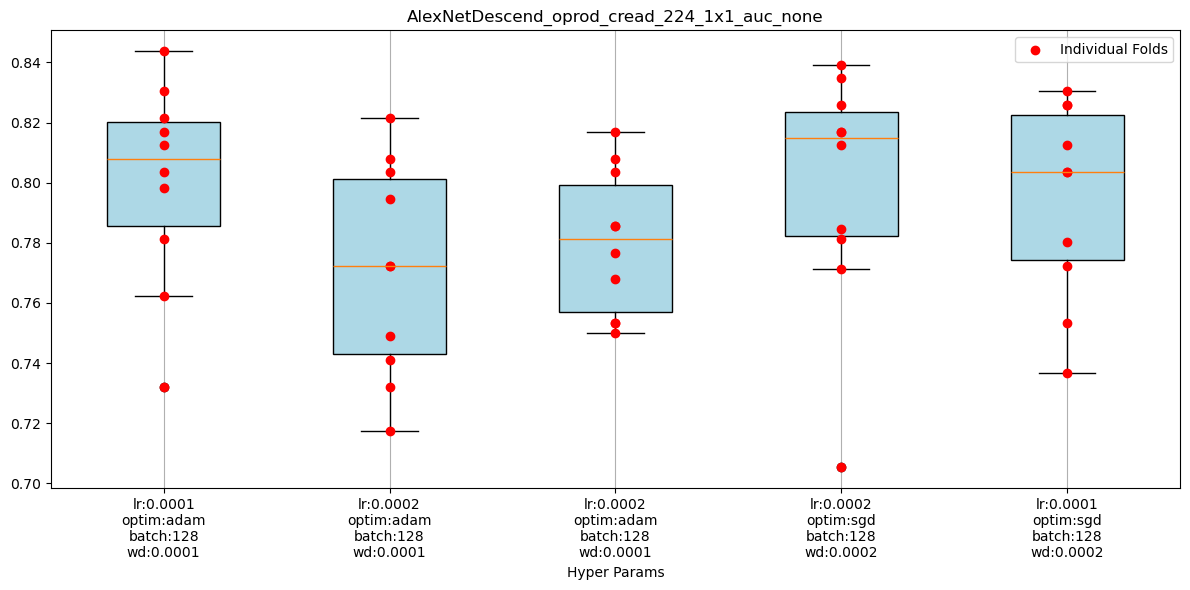

In [ ]:
all_data = []
all_labels = []

plt.figure(figsize=(12, 6))

for row, col in runs_df.iterrows():
    # print(row, col.iloc[0])

    parse = [i for i in list(col.iloc[0].keys()) if ("fold" in i and "val" in i and "acc" in i)]
    parse = [i for i in parse if "train" not in i]
    parse = [i for i in parse if i != "accuracy"]
    # print(parse)

    results = [col.iloc[0][label] for label in parse]
    all_data.append(results)
    
    # formate the hyperparameters so they don't overlap
    labels = col.iloc[2]
    labels = labels.split("_") 
    formatted_label = "\n".join(labels[1:]) # drop CNN
    
    all_labels.append(formatted_label)

plt.boxplot(all_data, vert=True, patch_artist=True,
            labels=all_labels,
            boxprops=dict(facecolor='lightblue'))
for i, y_vals in enumerate(all_data):
    plt.scatter([i + 1] * len(y_vals), y_vals, color='red', label='Individual Folds' if i == 0 else "", zorder=2) # individual points
plt.xlabel("Hyper Params")
plt.title(f'{project}')
plt.legend()
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()

In [54]:
projects = api.projects(entity="megdecoding")

In [59]:
save_dir = os.path.join(os.getcwd(), '/Users/ciprianbangu/Cogmaster/M2 Internship/BCI code/results_plots')

No valid data to plot
Skippin 0 - no valid accuracy keys found
Skippin 1 - no valid accuracy keys found
Skippin 2 - no valid accuracy keys found
Skippin 3 - no valid accuracy keys found
Skippin 4 - no valid accuracy keys found
Skippin 5 - no valid accuracy keys found
Skippin 6 - no valid accuracy keys found
Skippin 7 - no valid accuracy keys found
Skippin 8 - no valid accuracy keys found
Skippin 9 - no valid accuracy keys found
Skippin 10 - no valid accuracy keys found
Skippin 11 - no valid accuracy keys found
No valid data to plot


/var/folders/f1/tvmmnqs17399g3n7wyy0pq0c0000gn/T/ipykernel_39976/388434717.py:25: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(12, 6))


Skippin 0 - no valid accuracy keys found
Skippin 1 - no valid accuracy keys found
Skippin 2 - no valid accuracy keys found
Skippin 0 - no valid accuracy keys found
Skippin 1 - no valid accuracy keys found
Skippin 2 - no valid accuracy keys found
Skippin 0 - no valid accuracy keys found
Skippin 1 - no valid accuracy keys found
Skippin 2 - no valid accuracy keys found
Skippin 0 - no valid accuracy keys found
Skippin 1 - no valid accuracy keys found
Skippin 2 - no valid accuracy keys found
Skippin 0 - no valid accuracy keys found
Skippin 1 - no valid accuracy keys found
Skippin 2 - no valid accuracy keys found
Skippin 3 - no valid accuracy keys found
Skippin 4 - no valid accuracy keys found
Skippin 5 - no valid accuracy keys found
Skippin 0 - no valid accuracy keys found
Skippin 1 - no valid accuracy keys found
Skippin 2 - no valid accuracy keys found
Skippin 3 - no valid accuracy keys found
Skippin 4 - no valid accuracy keys found
Skippin 5 - no valid accuracy keys found
Skippin 0 - no v

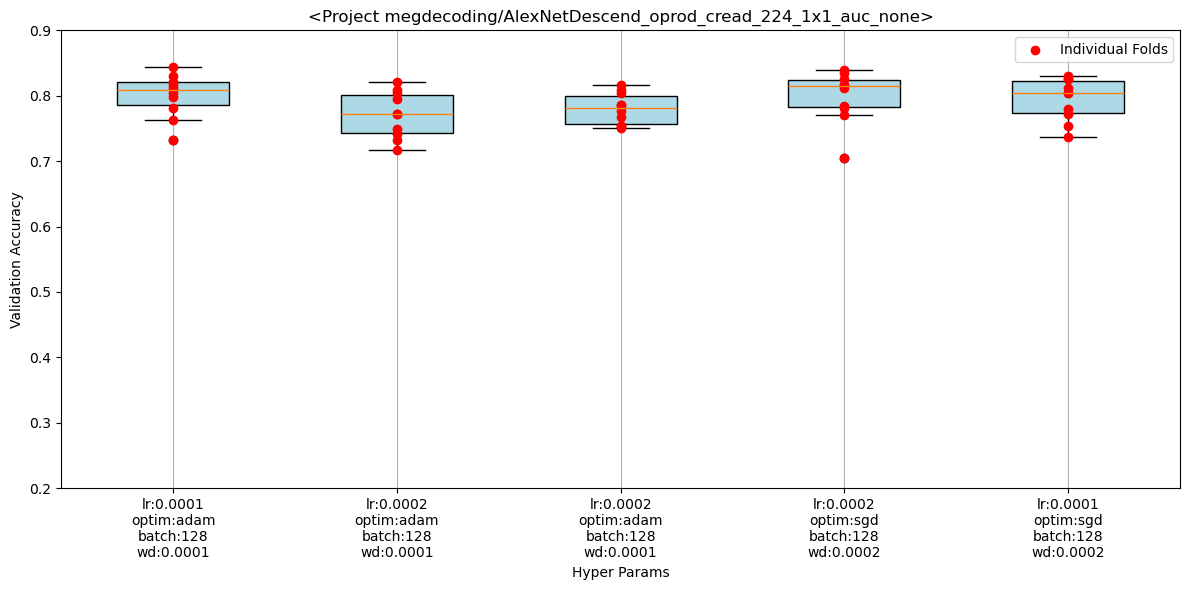

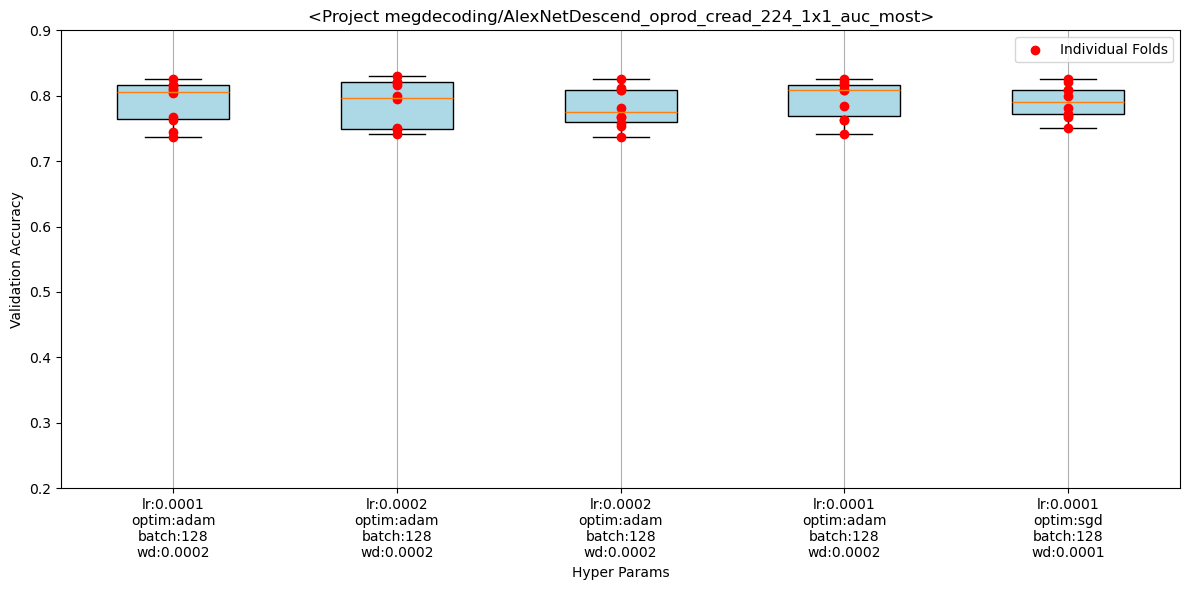

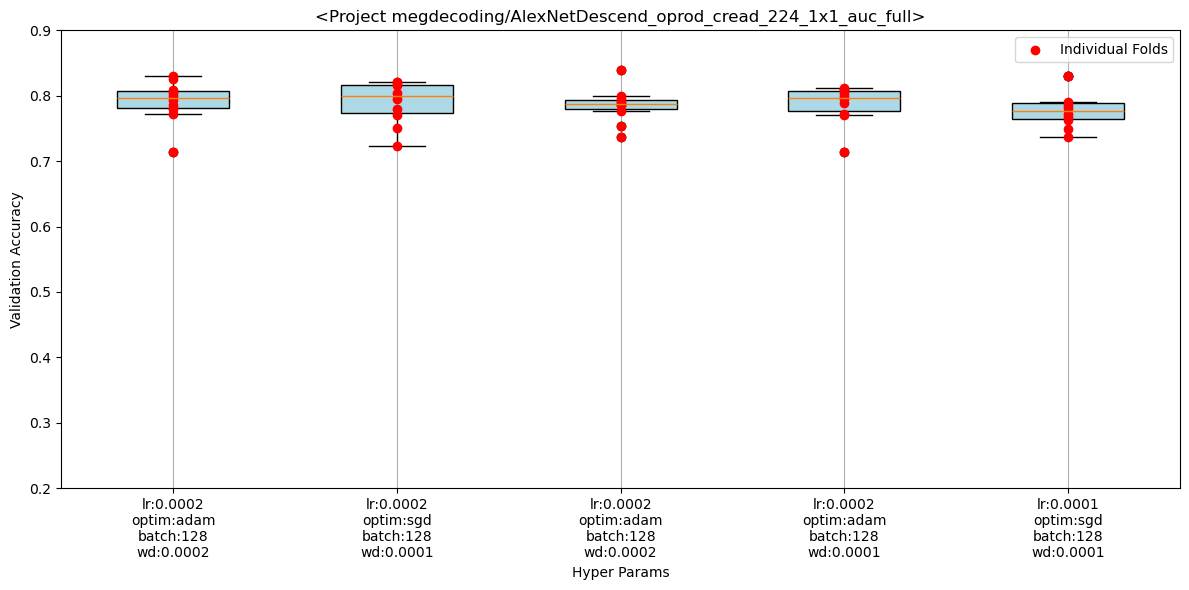

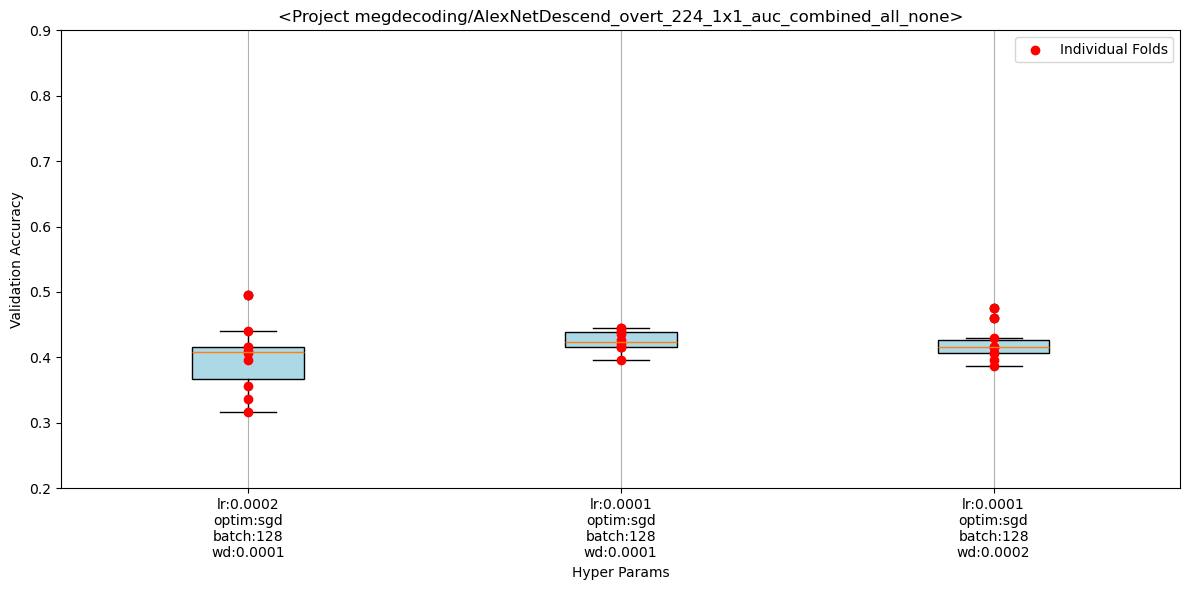

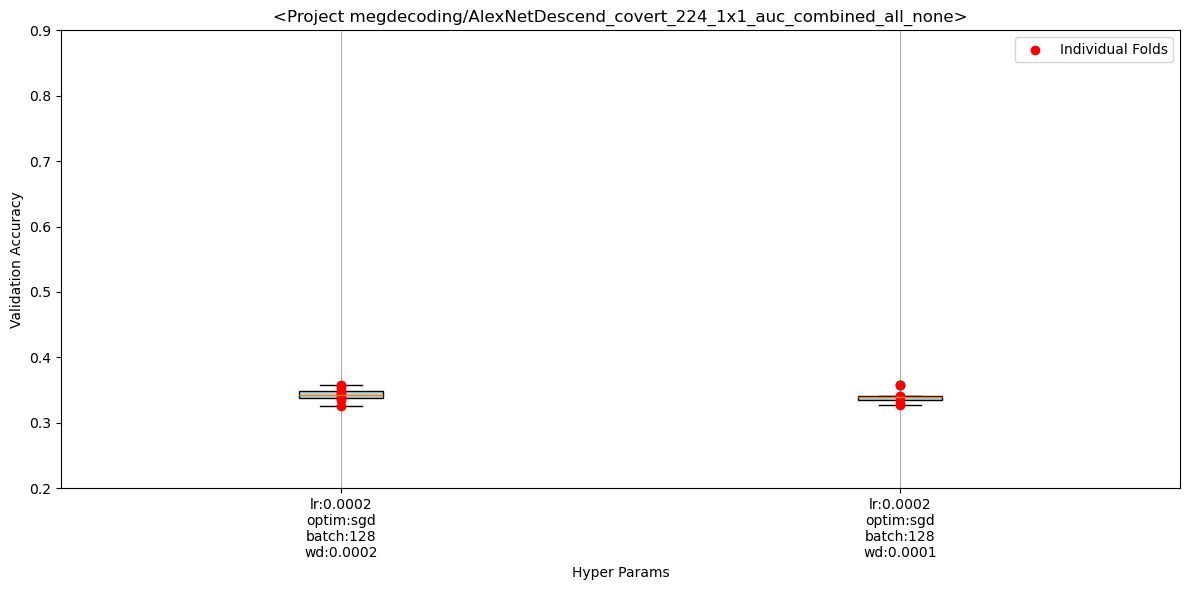

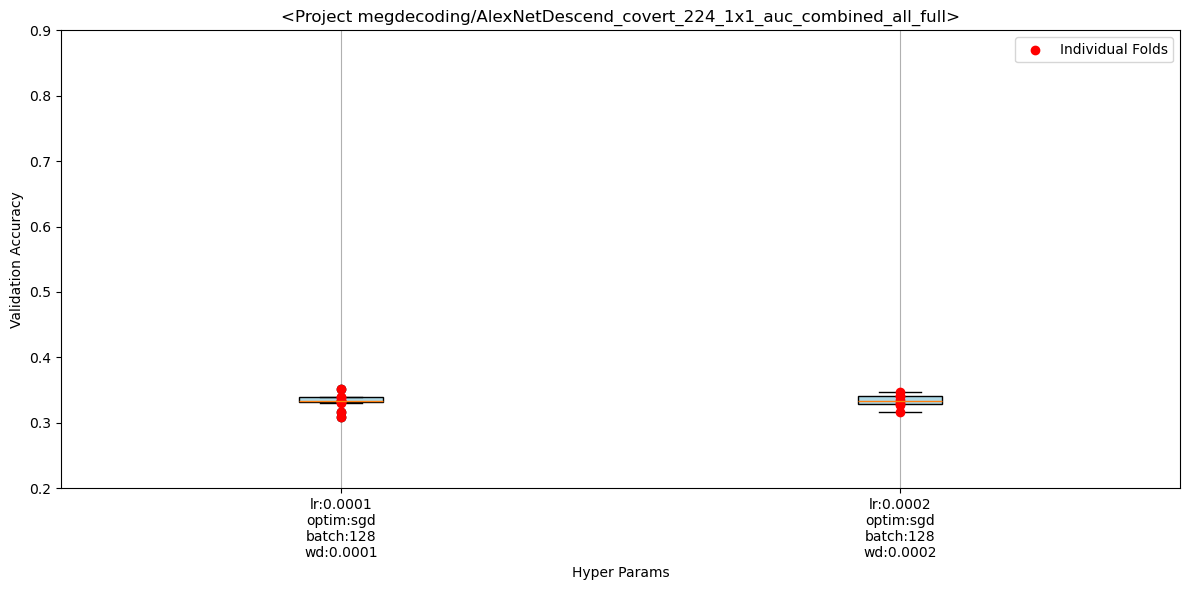

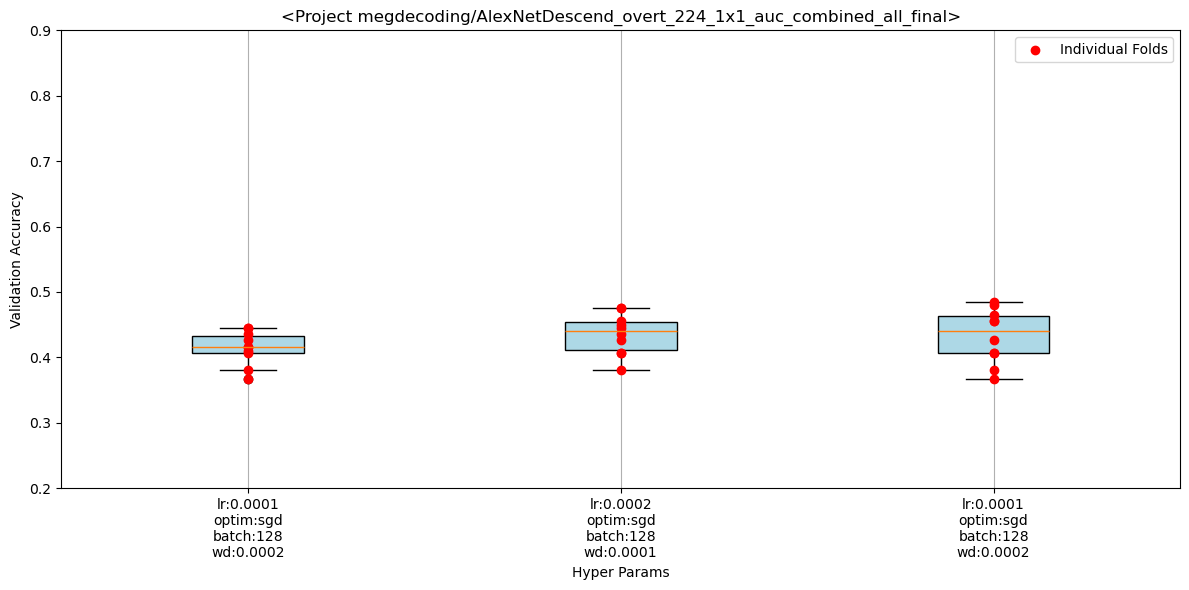

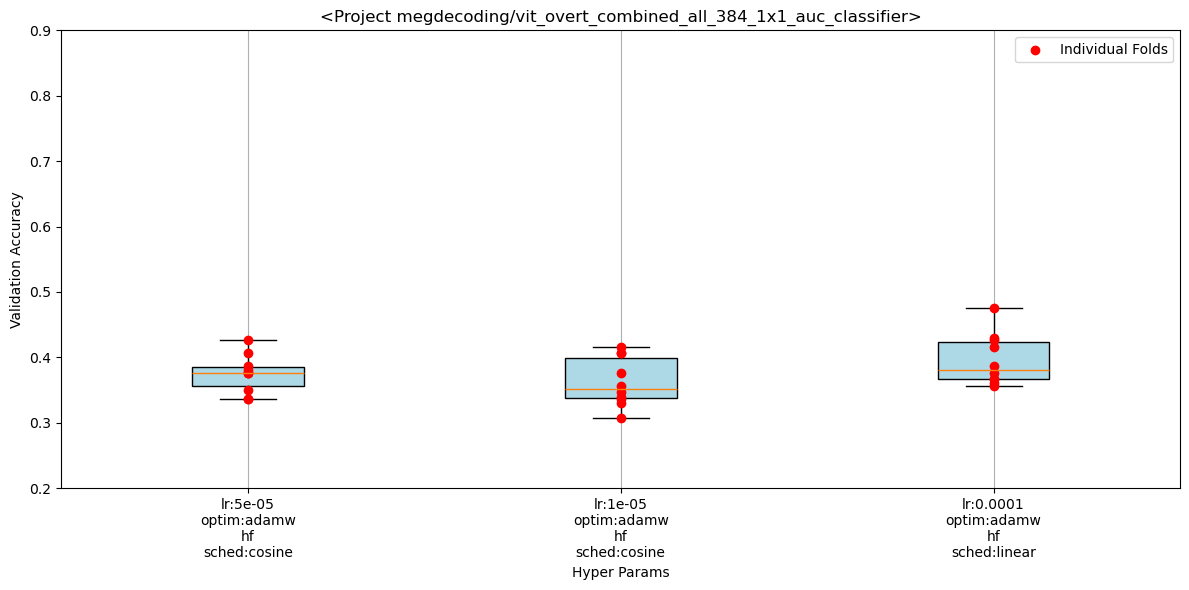

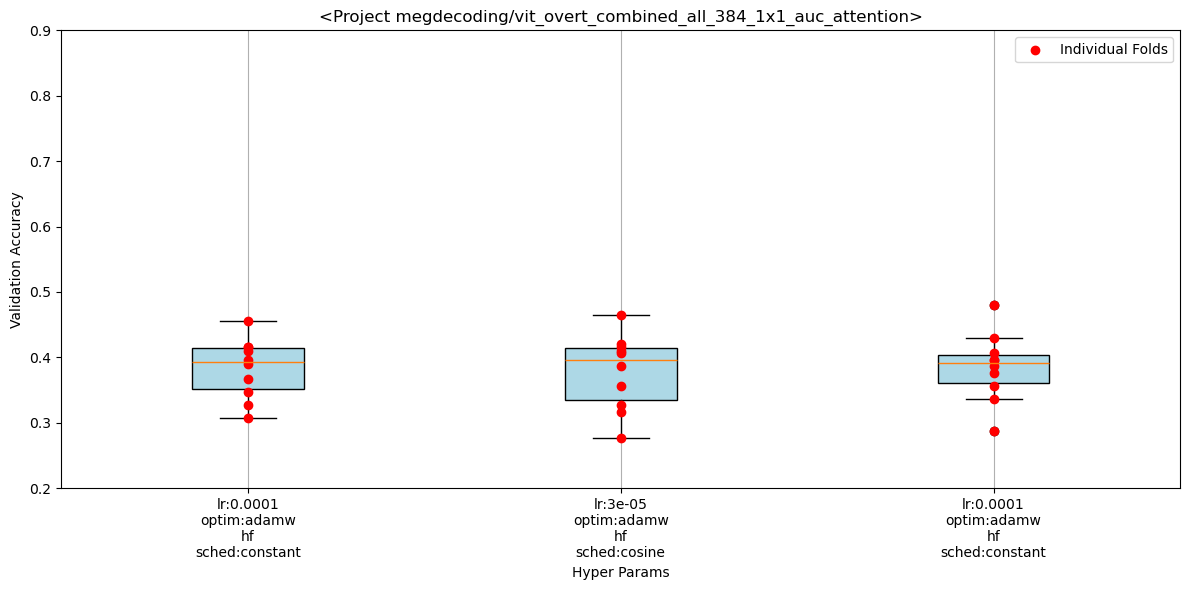

<Figure size 1200x600 with 0 Axes>

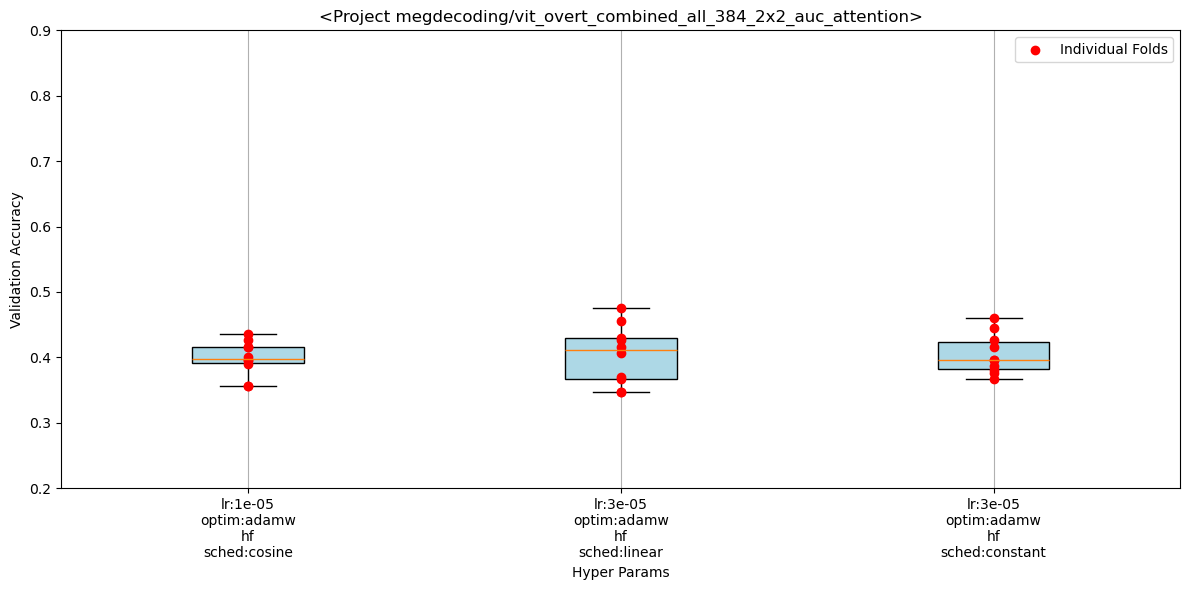

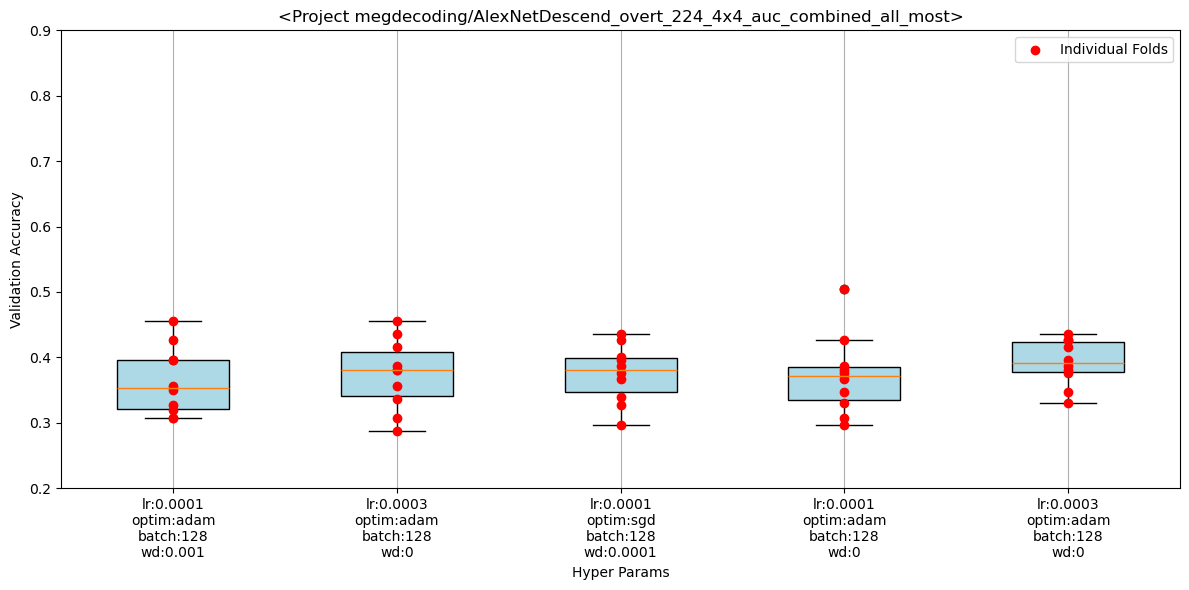

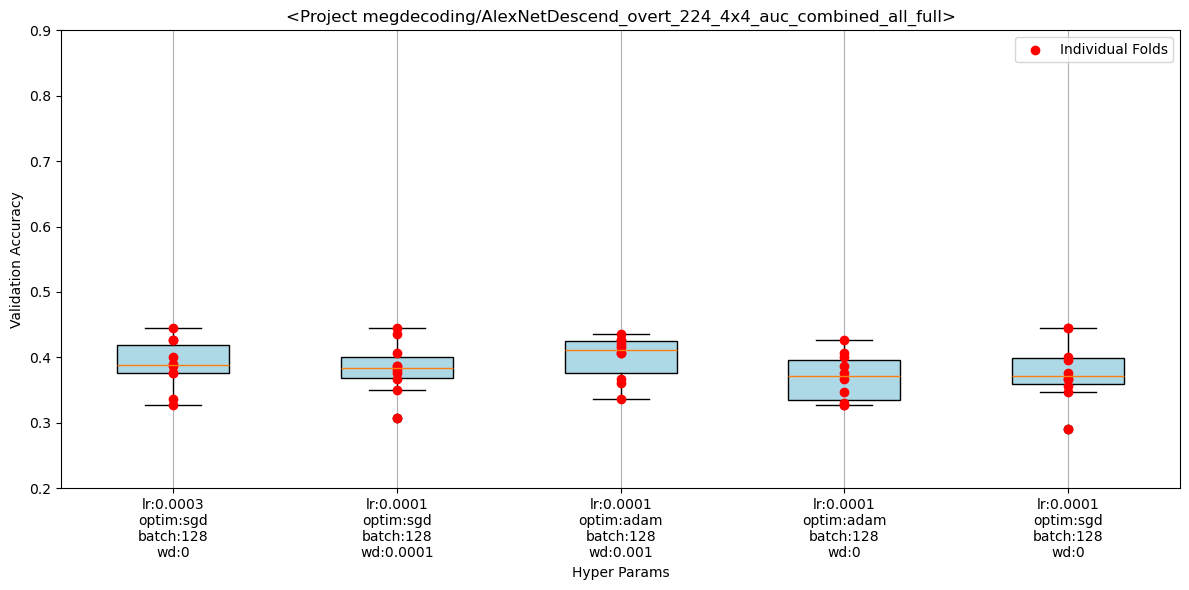

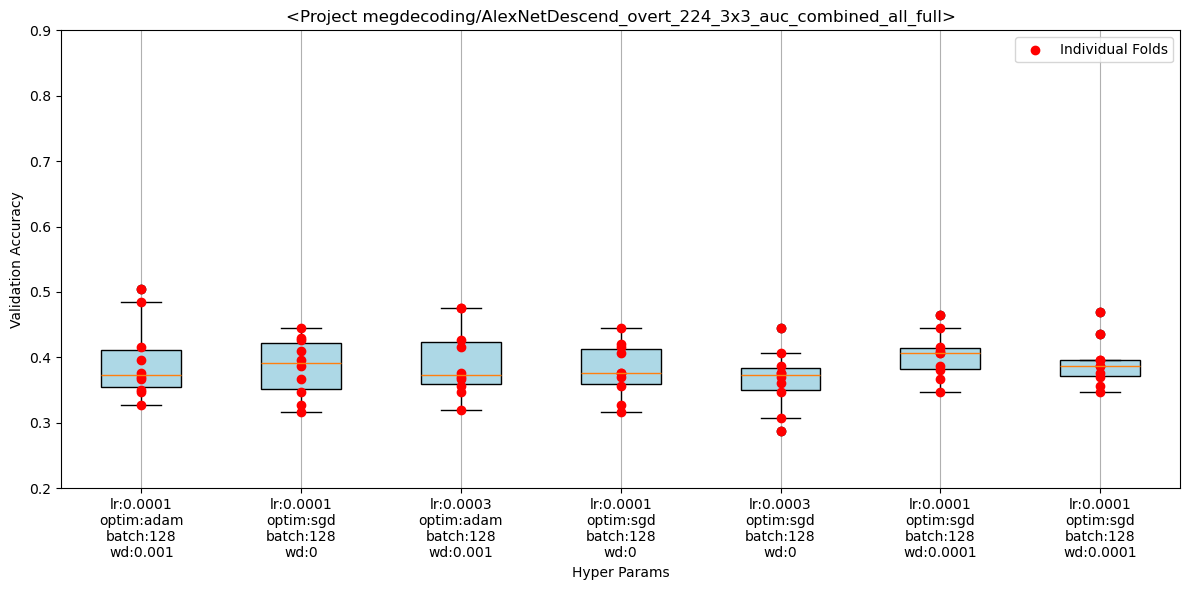

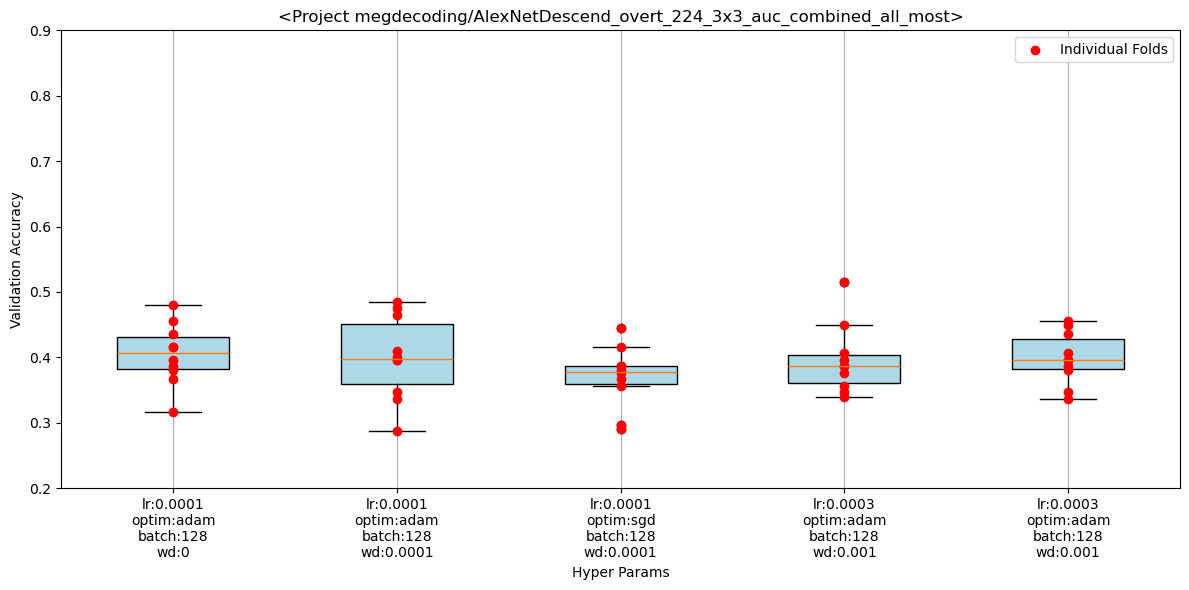

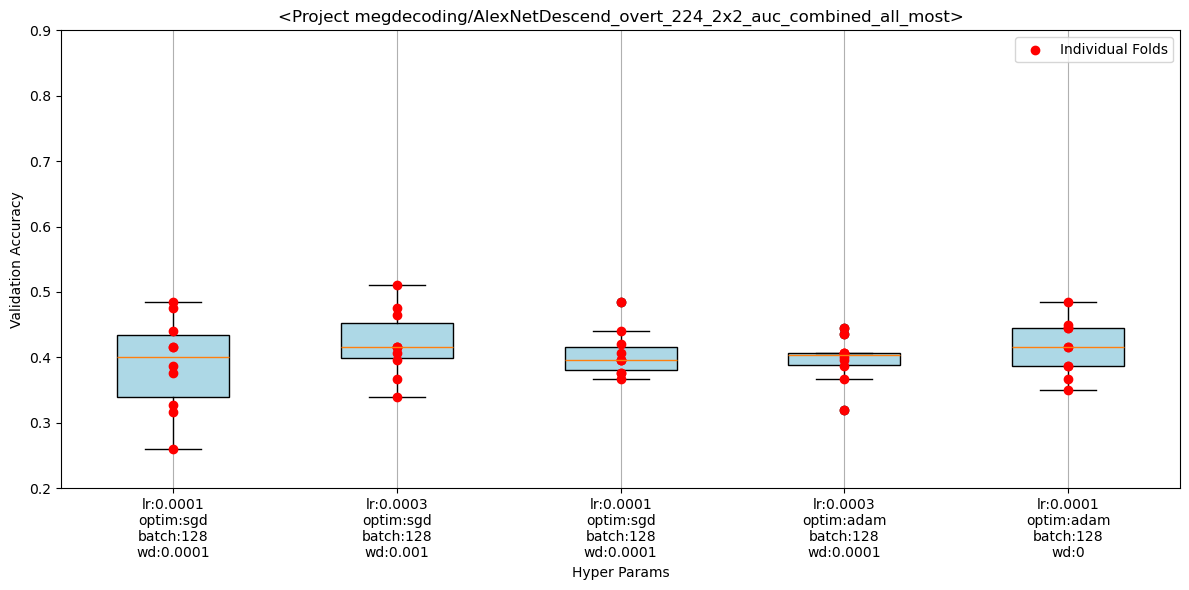

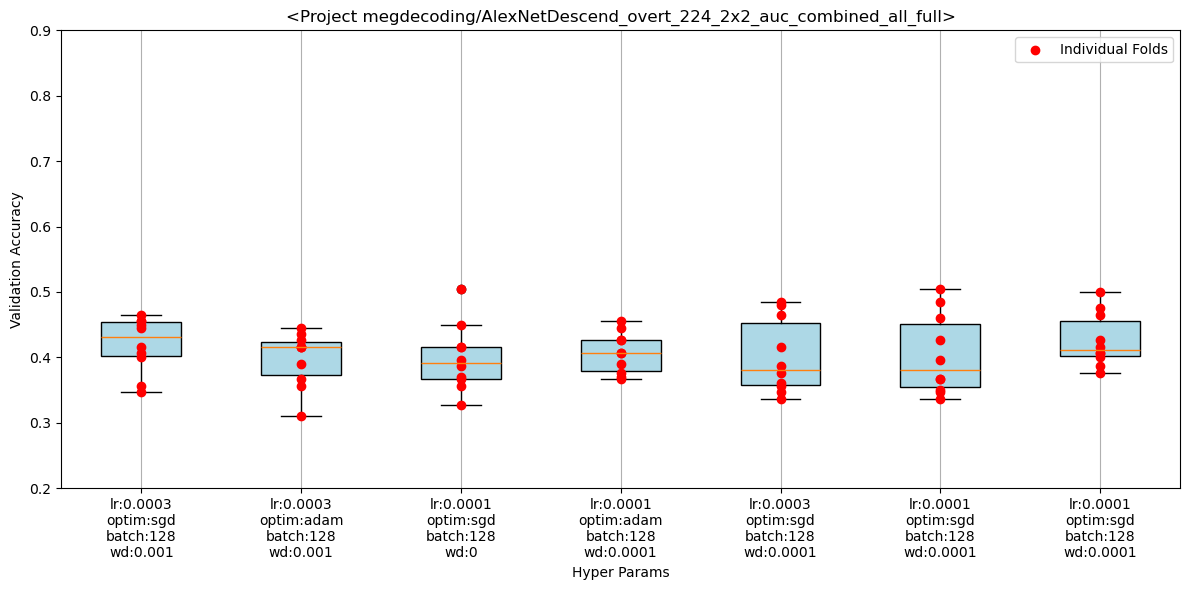

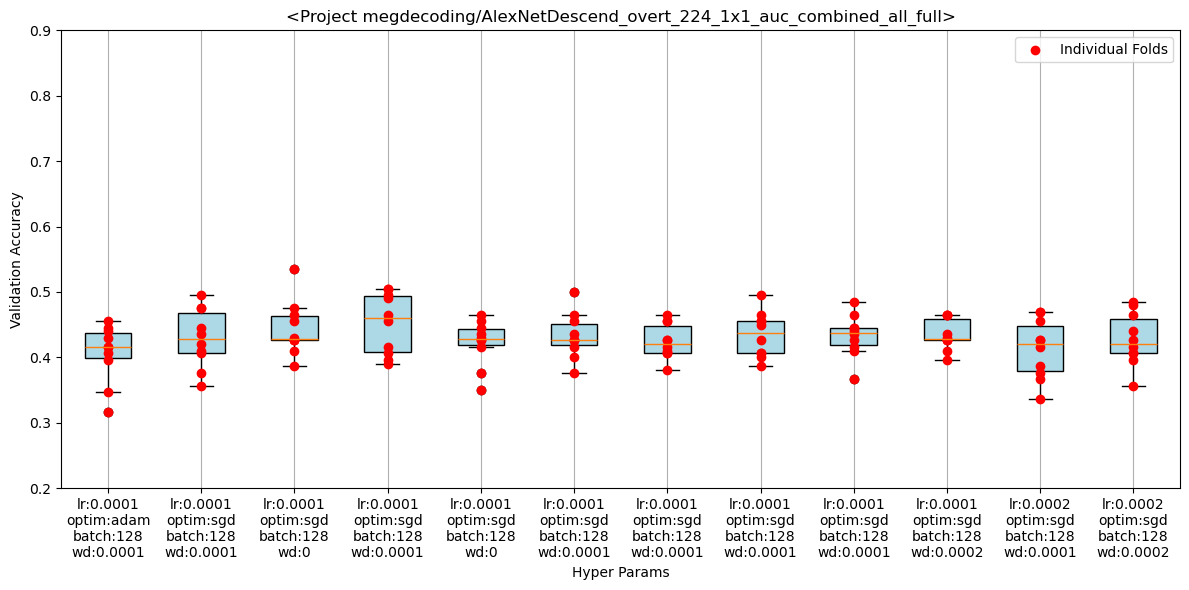

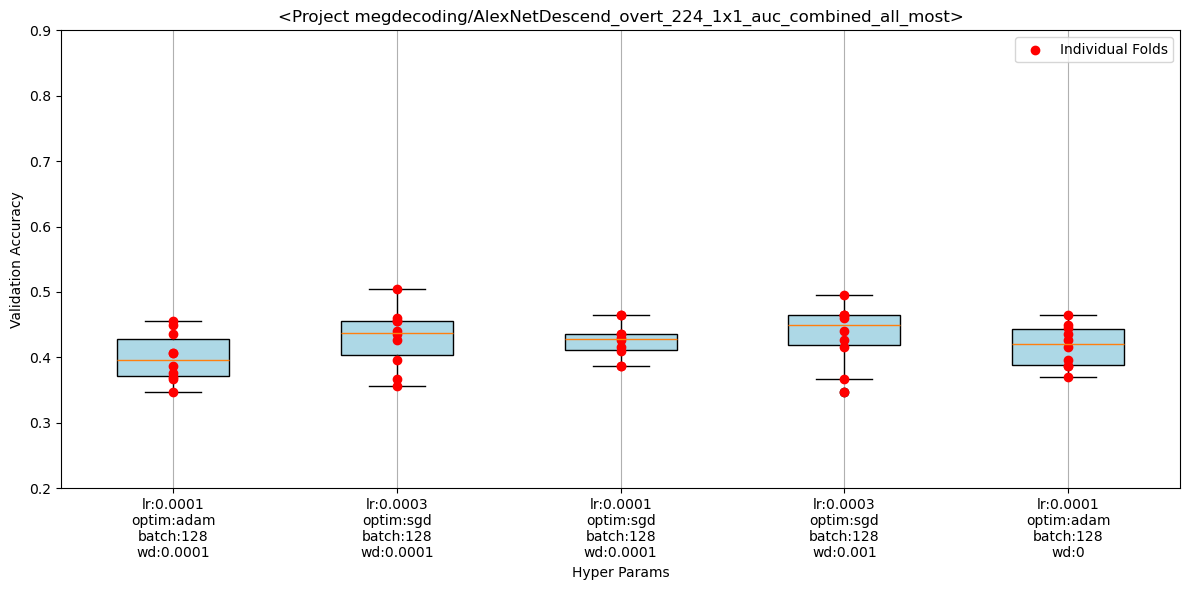

<Figure size 1200x600 with 0 Axes>

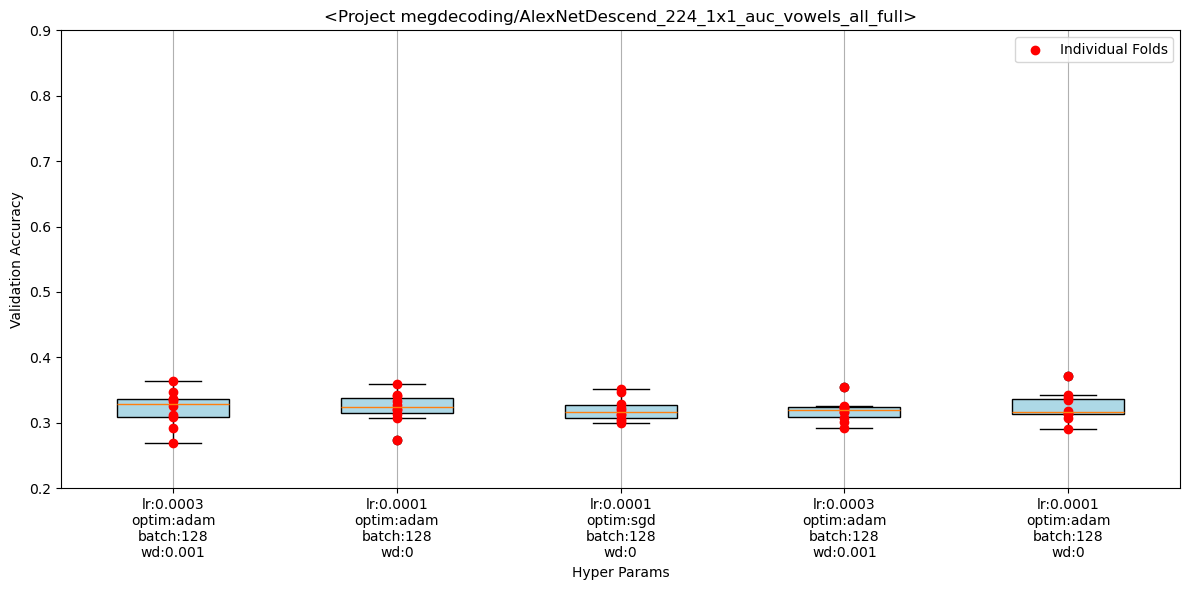

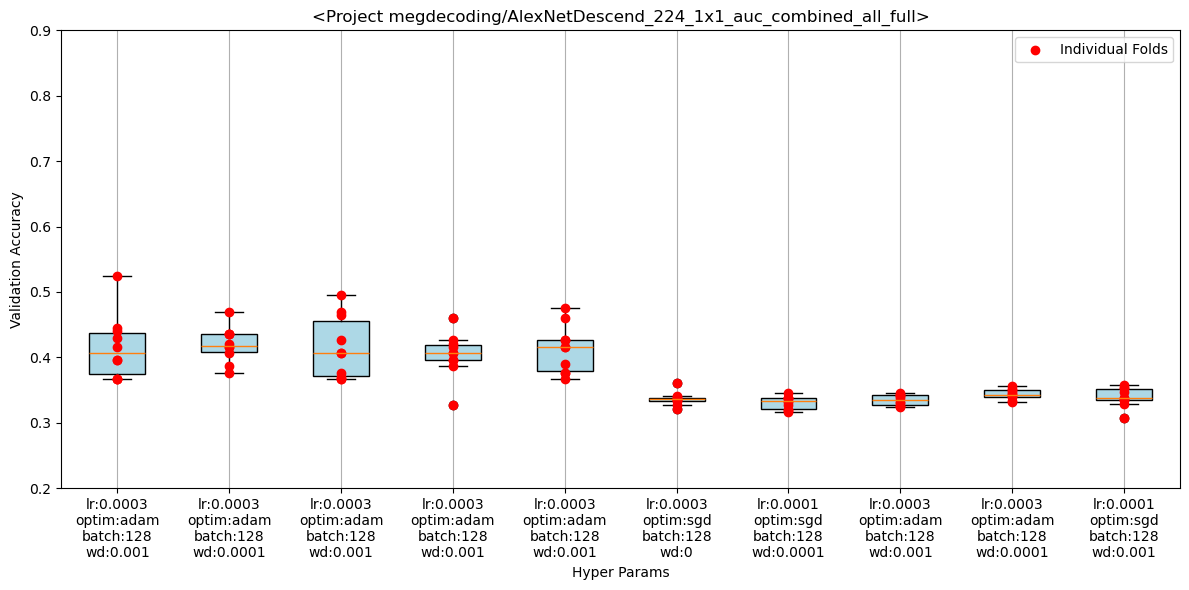

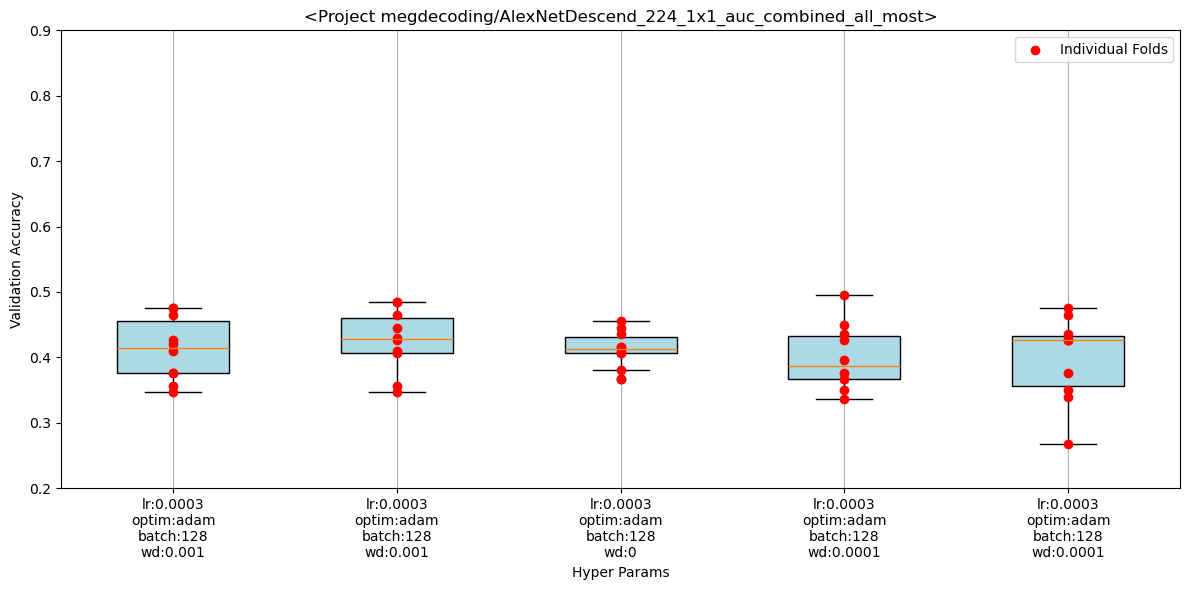

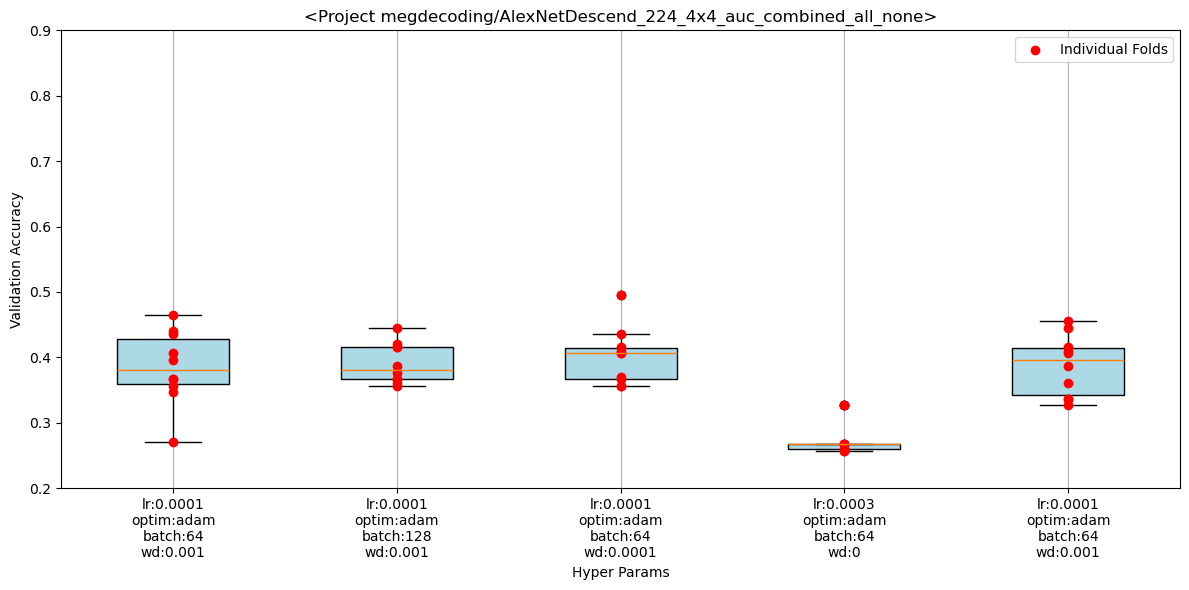

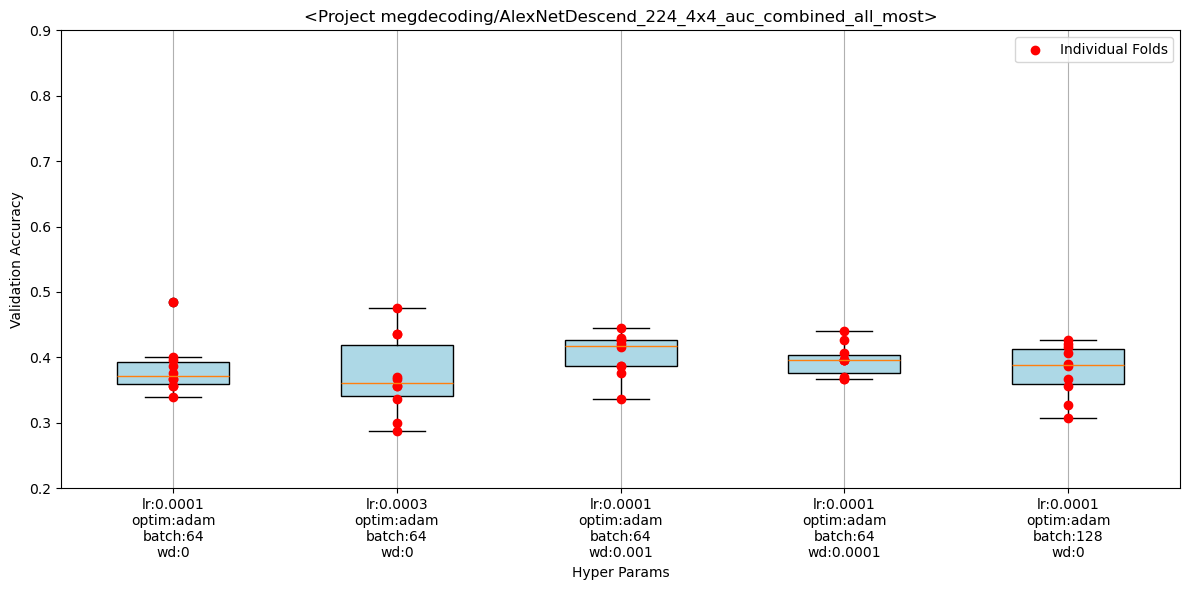

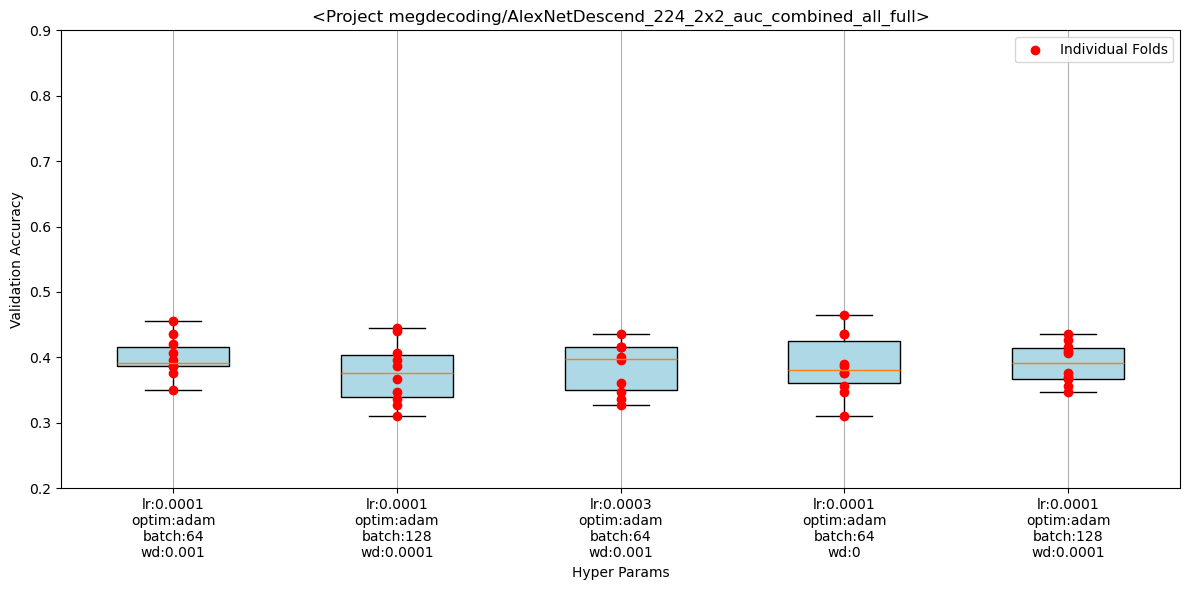

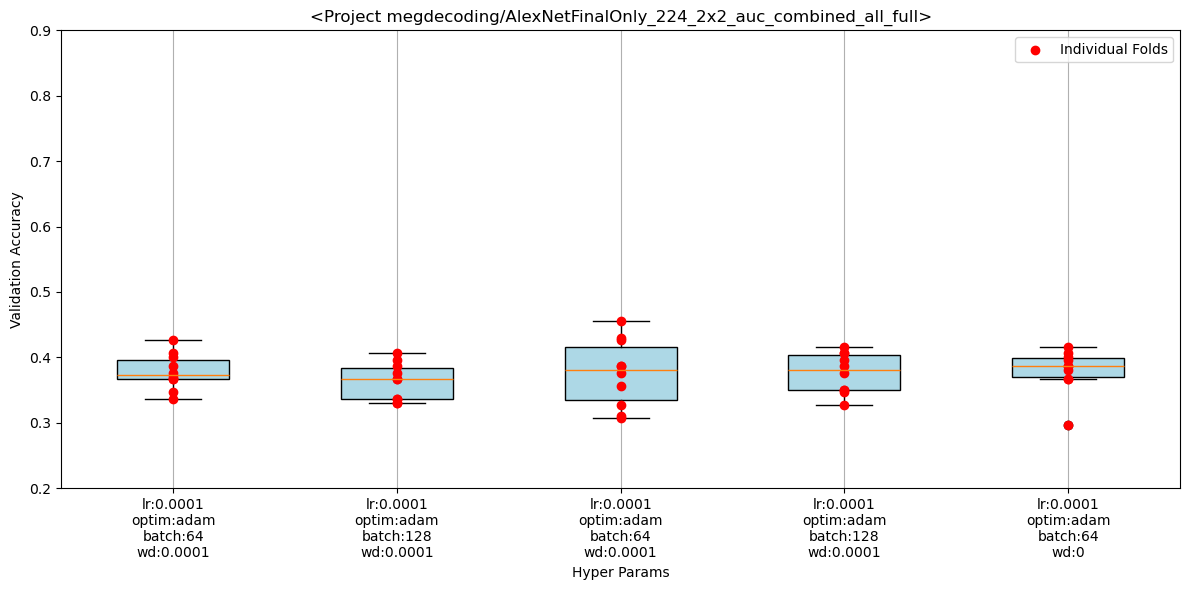

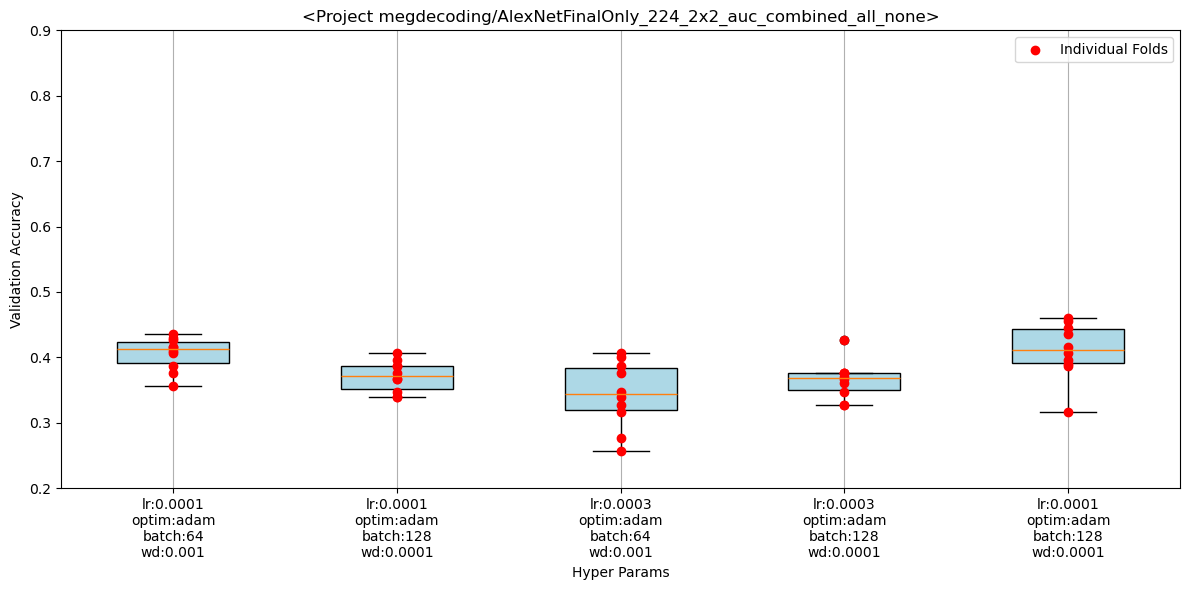

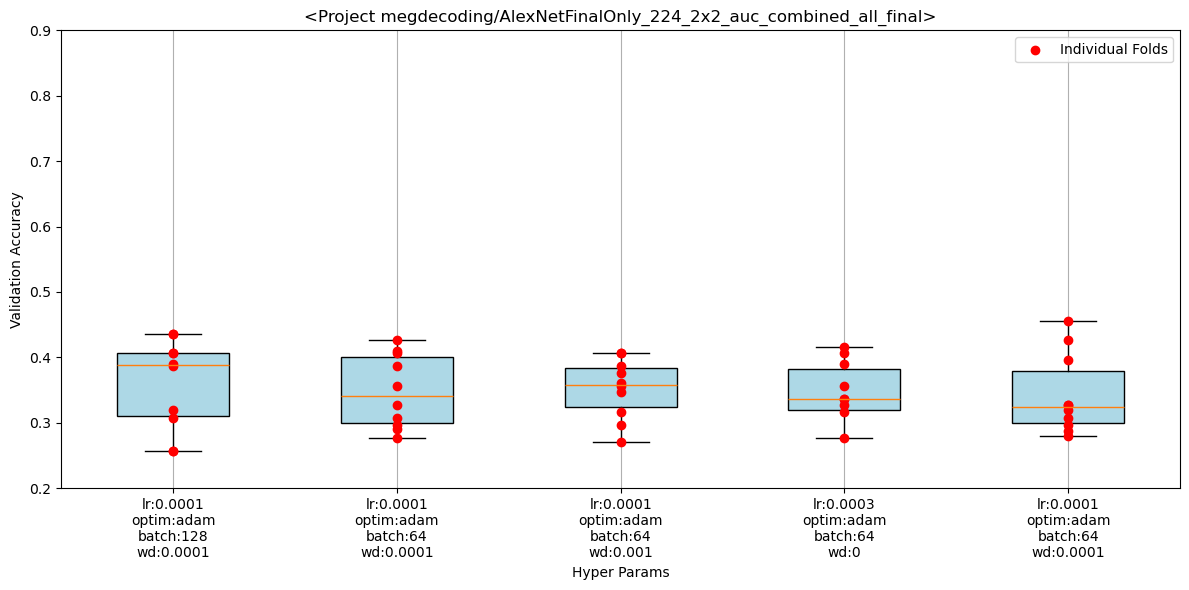

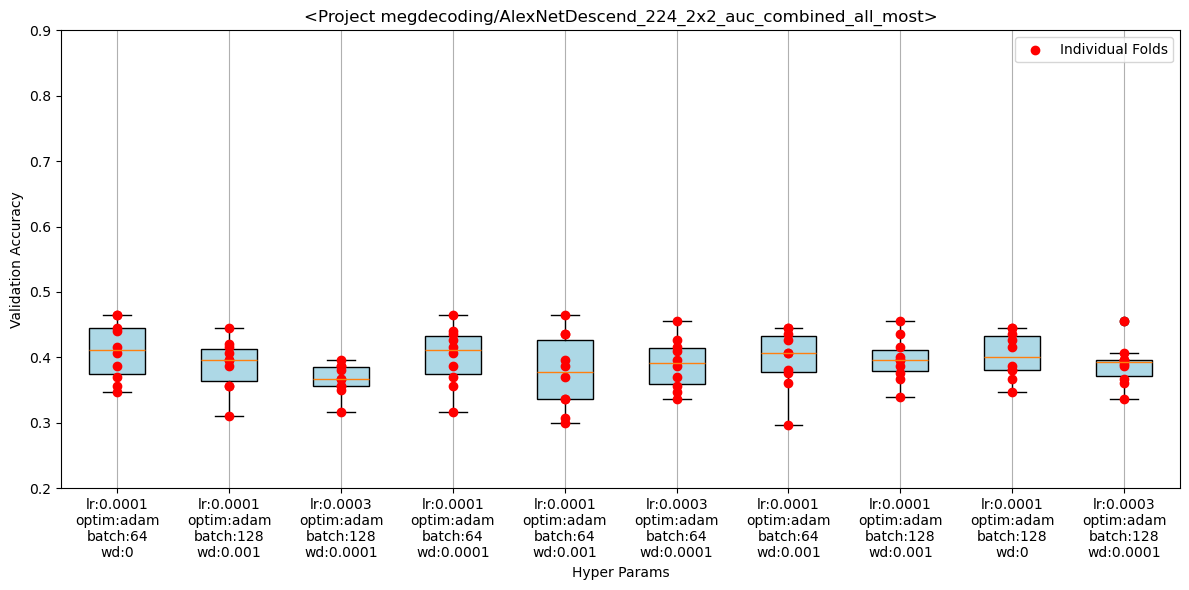

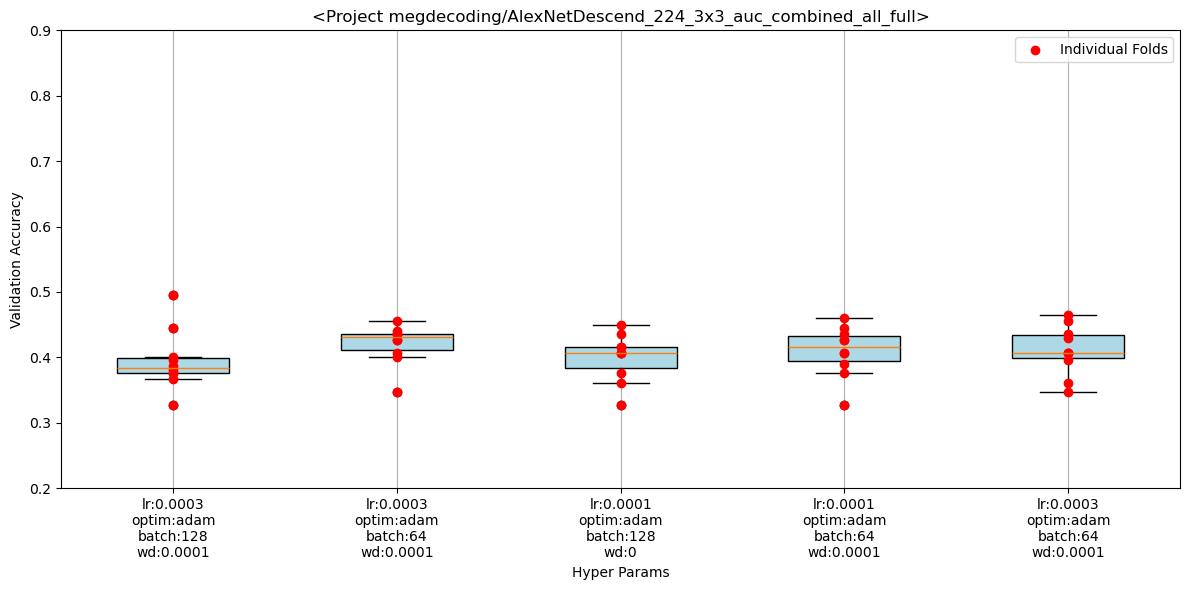

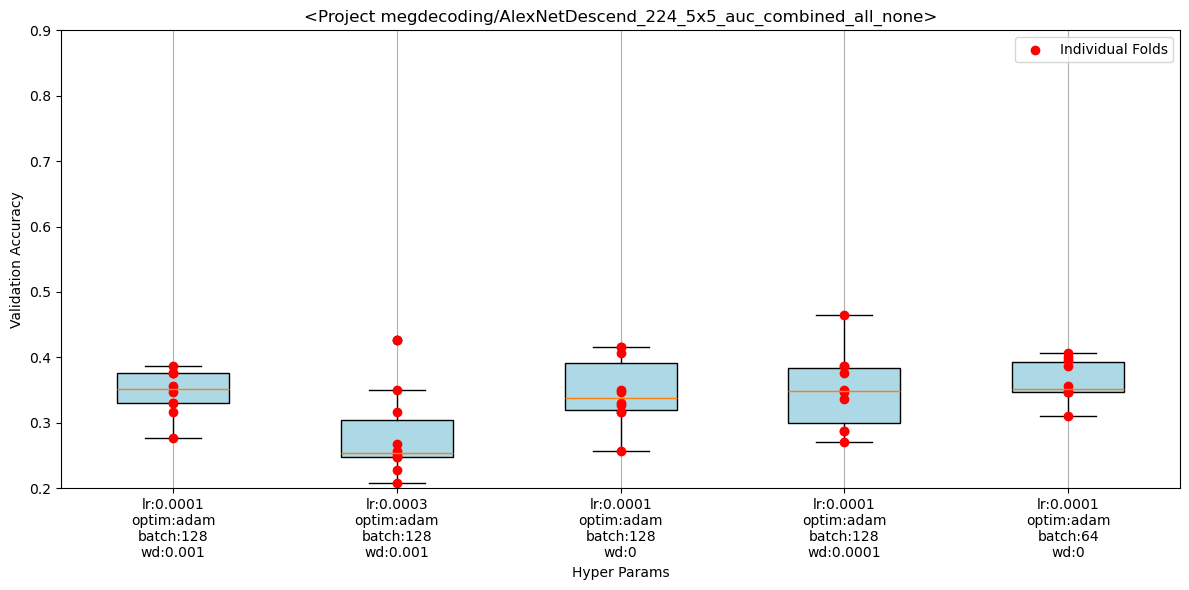

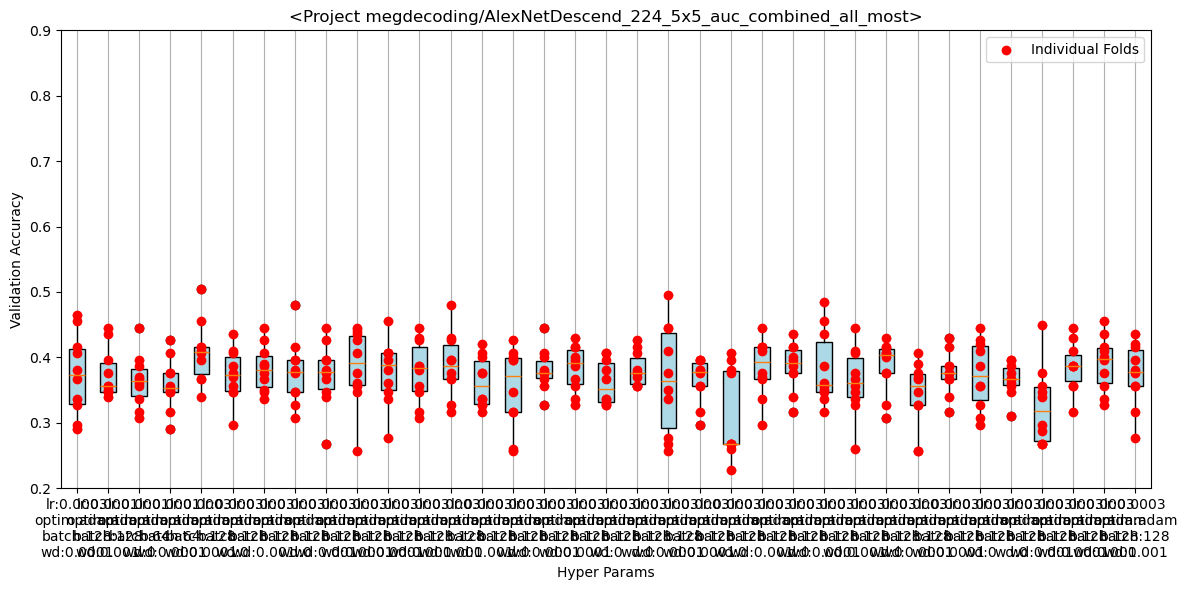

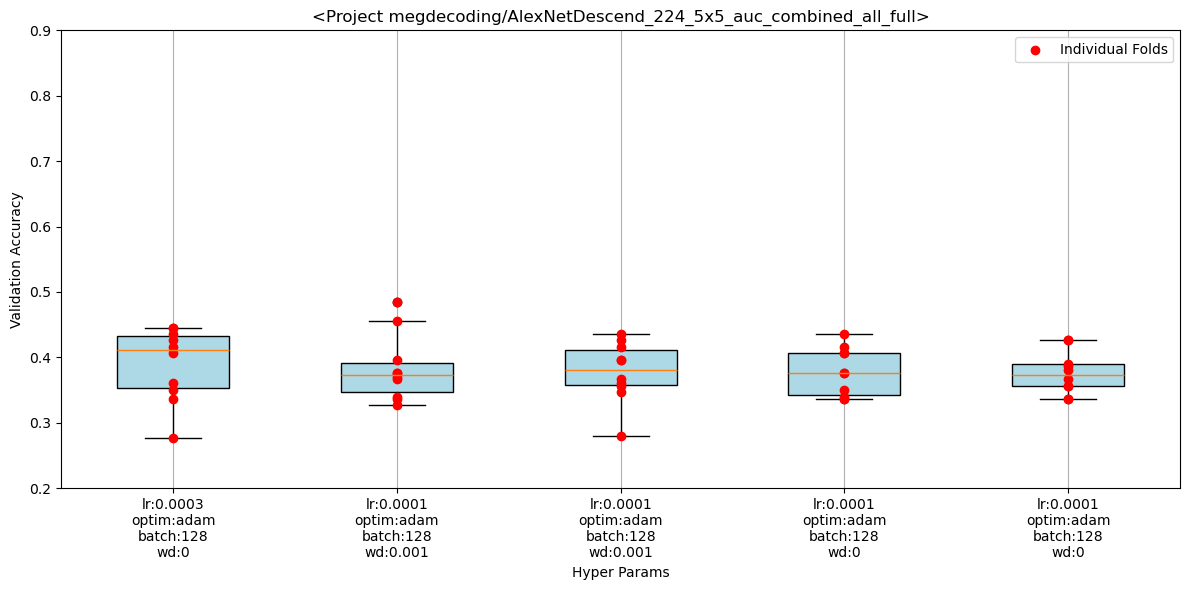

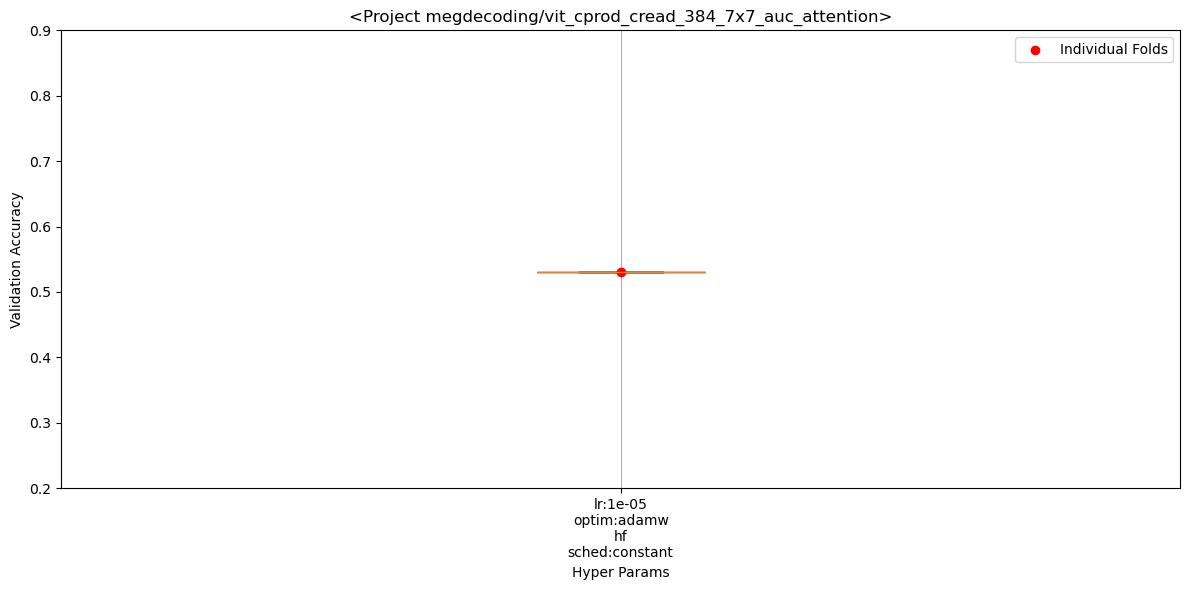

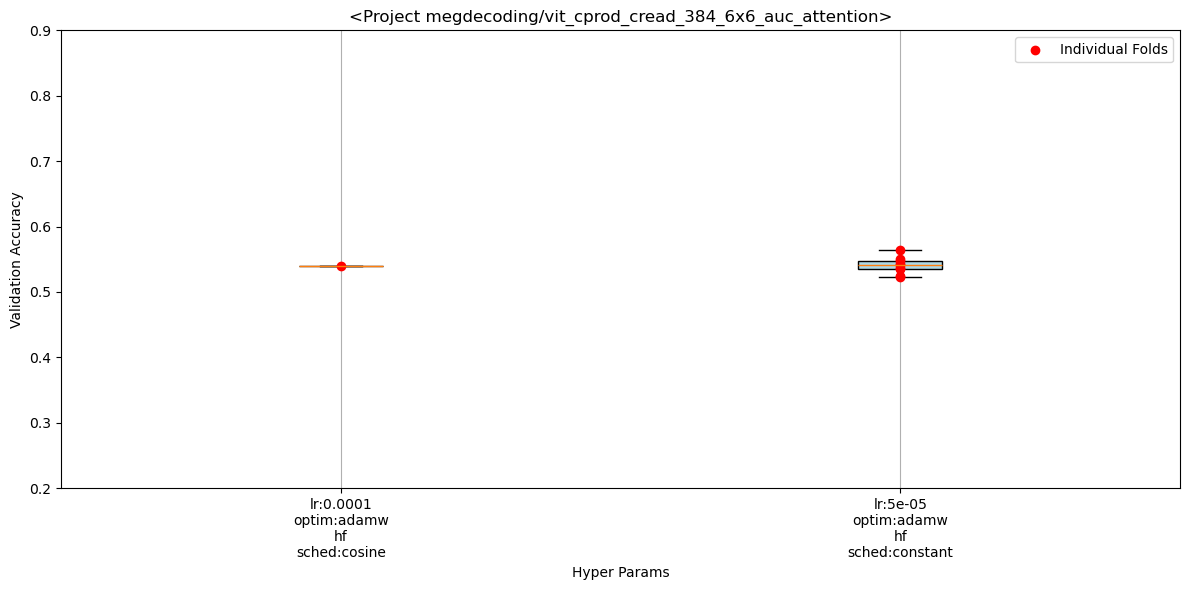

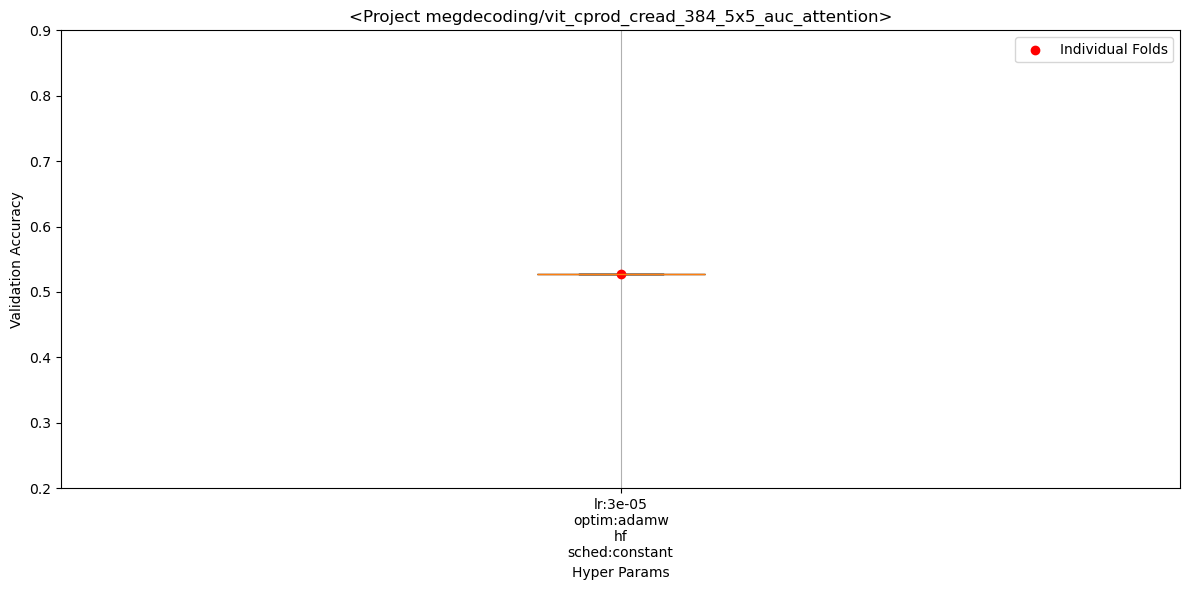

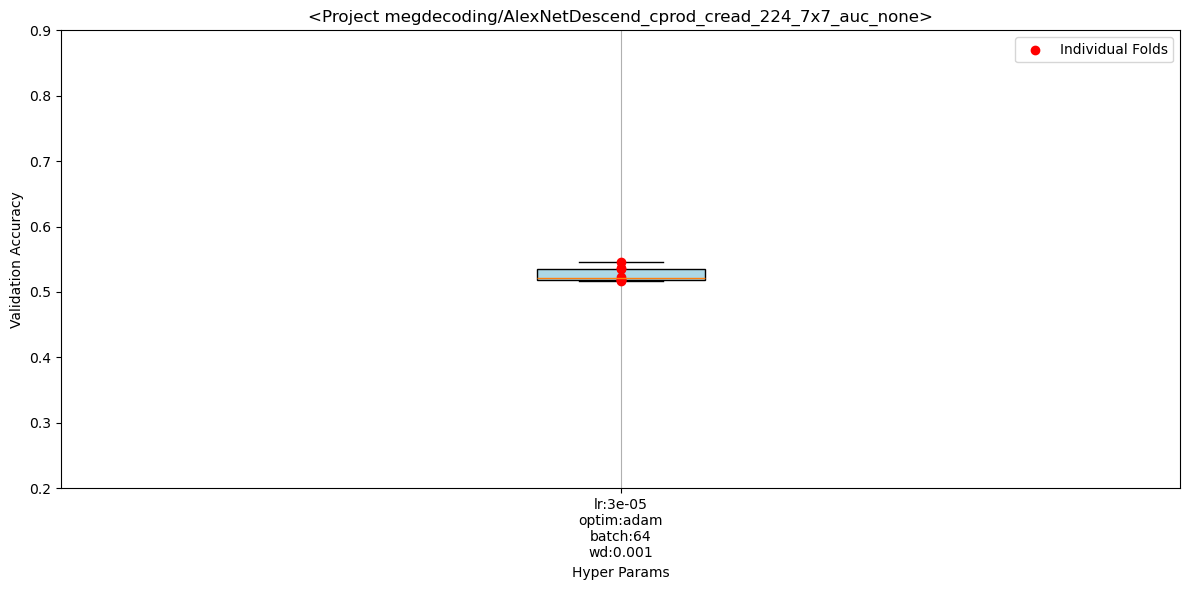

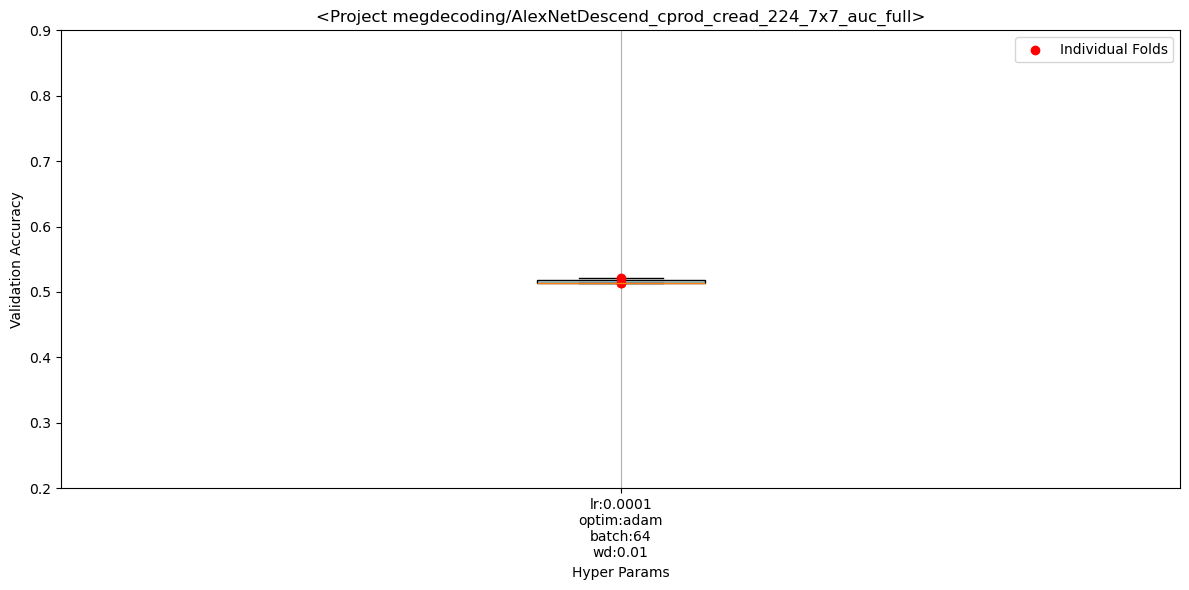

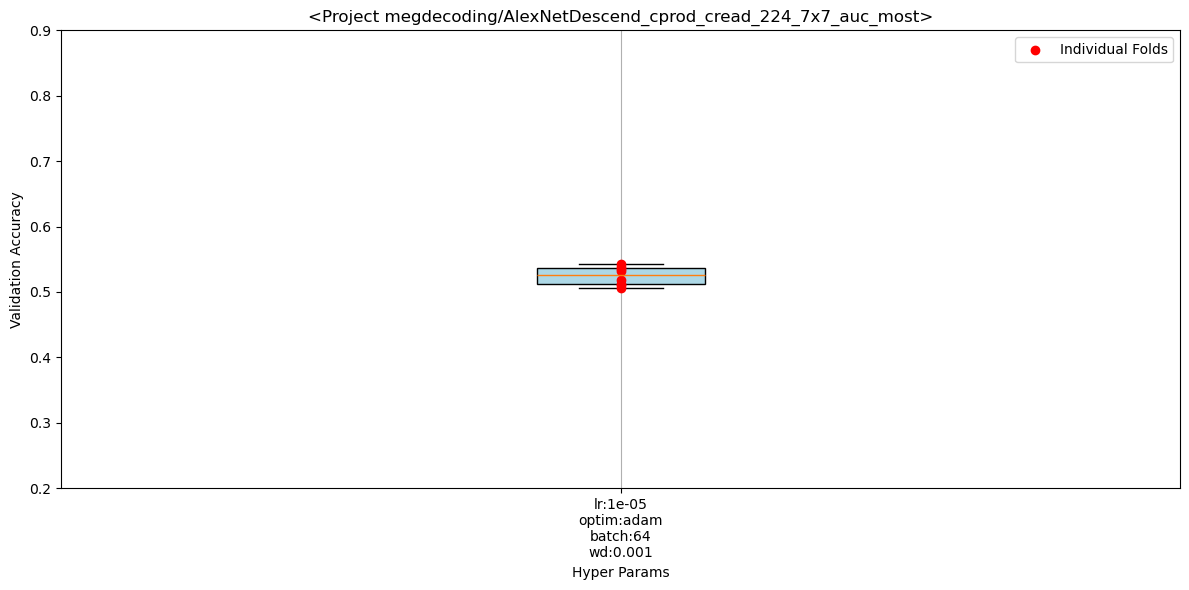

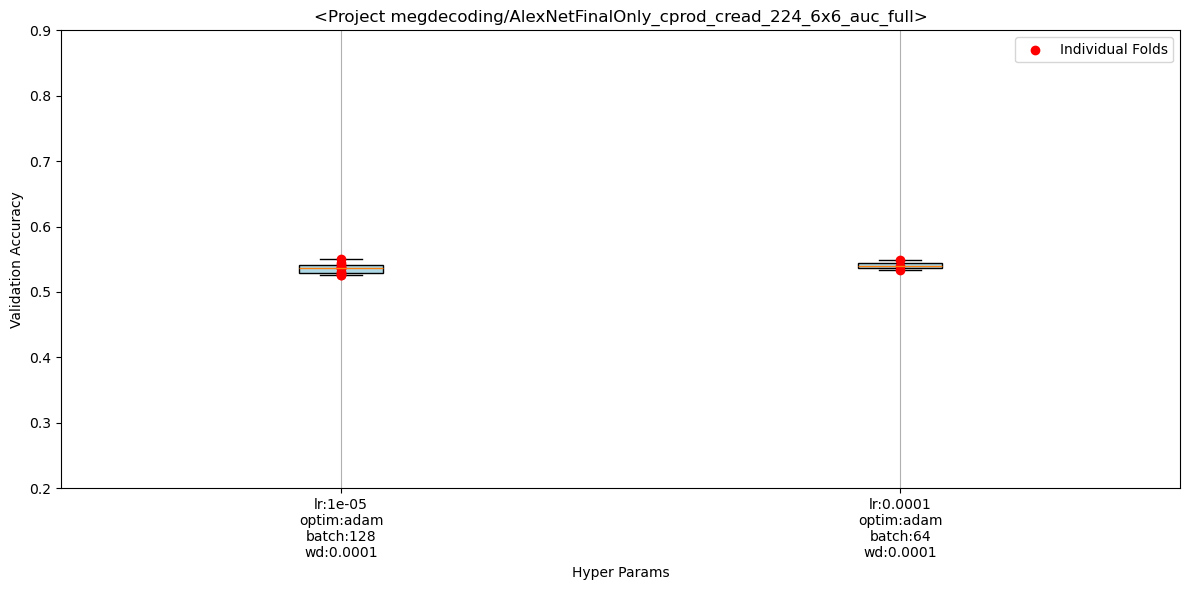

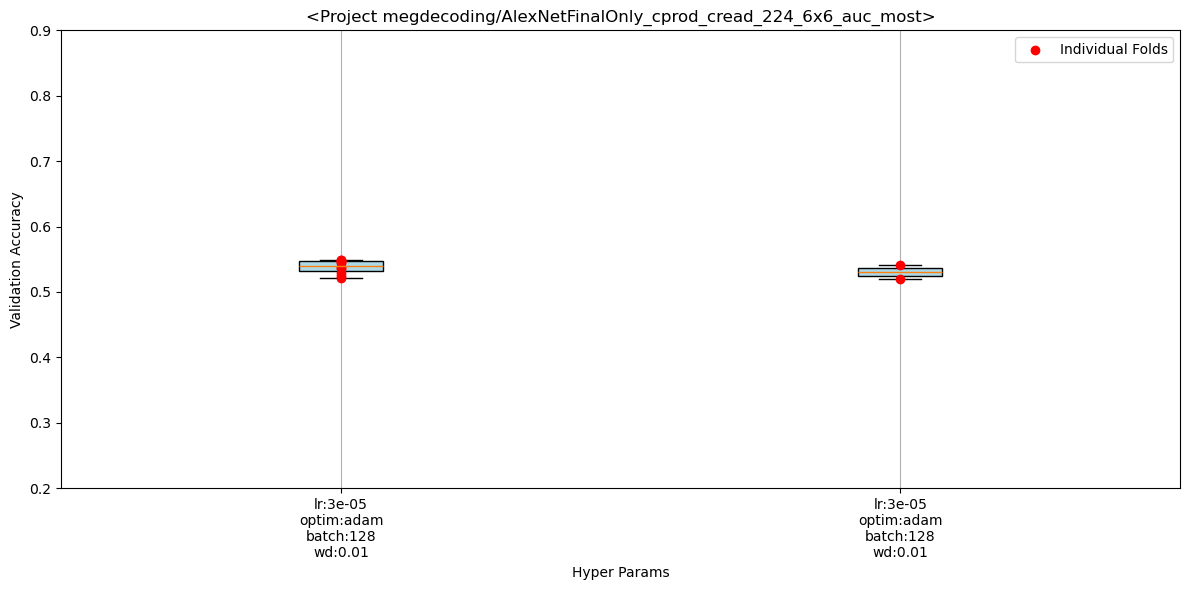

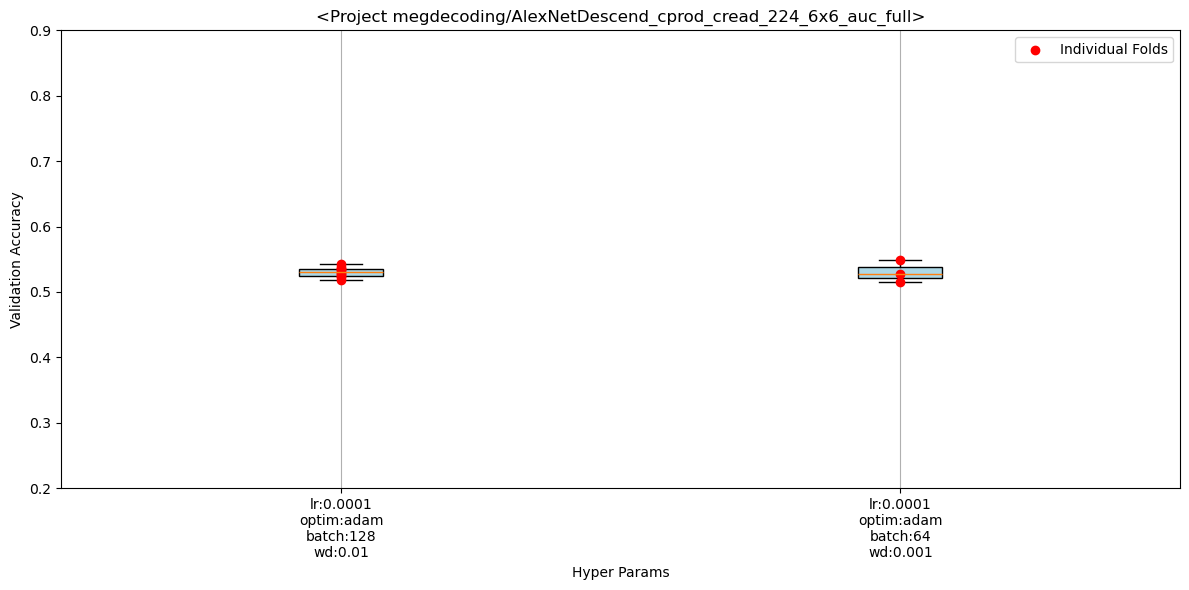

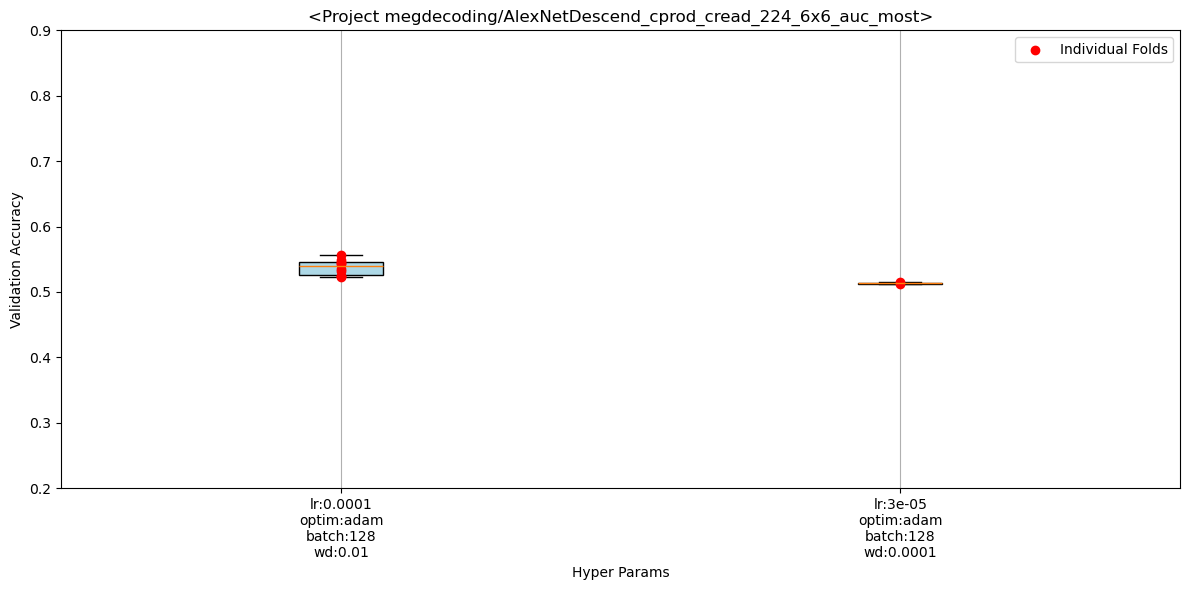

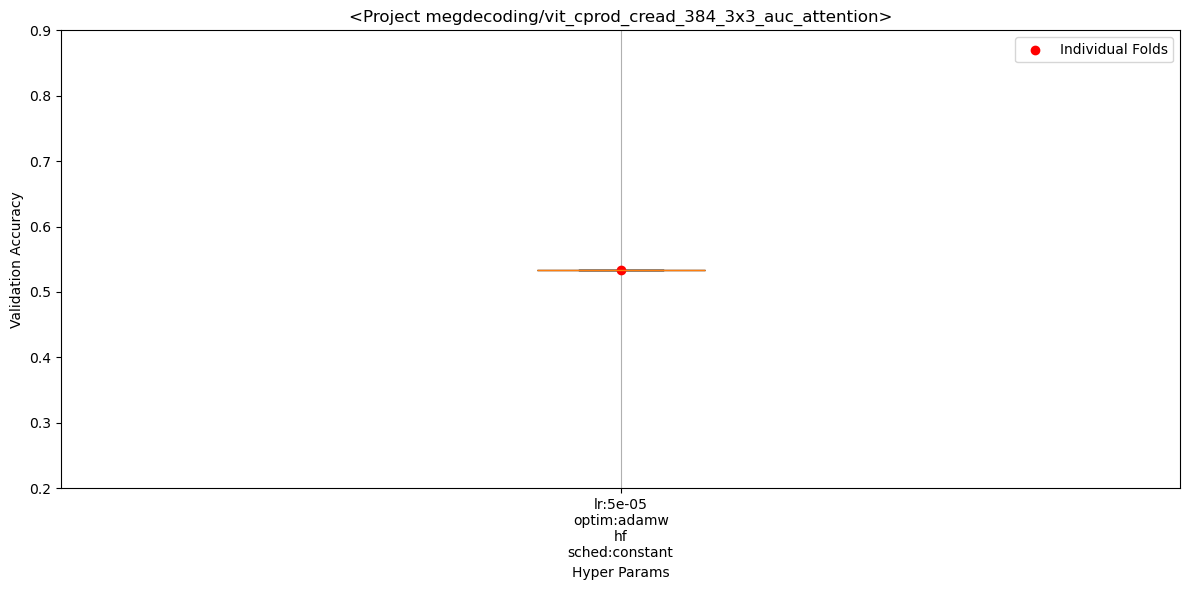

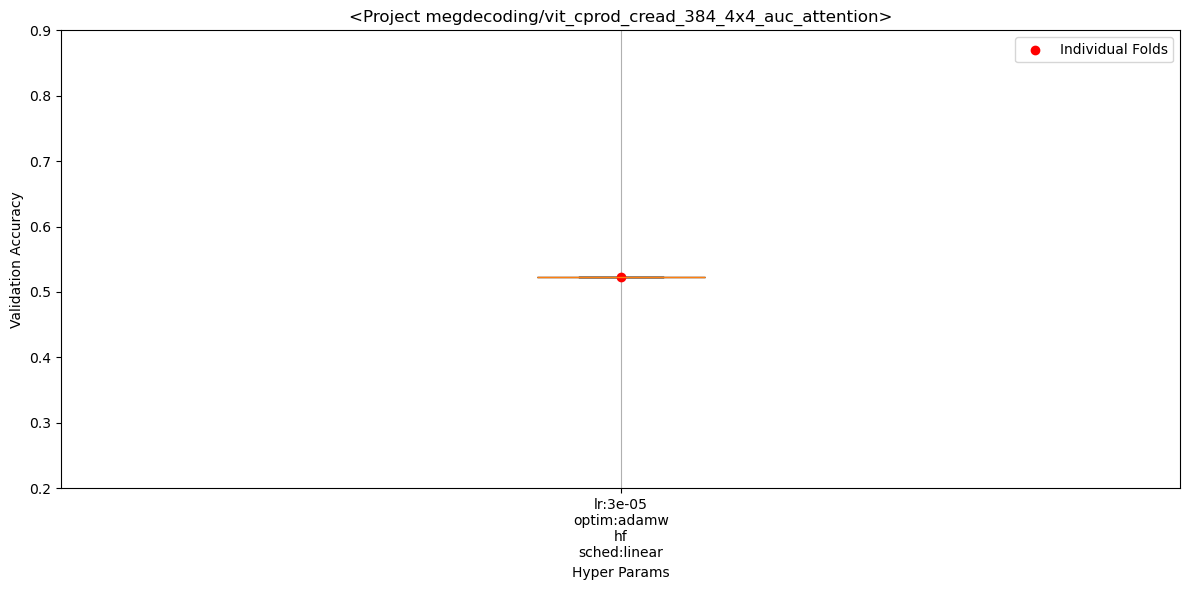

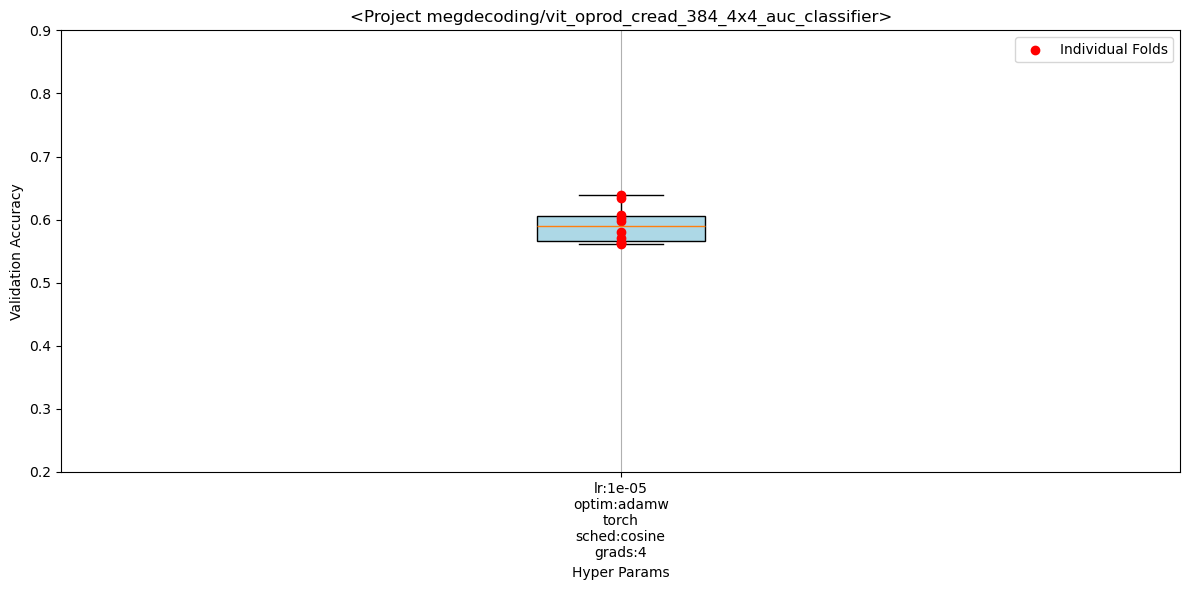

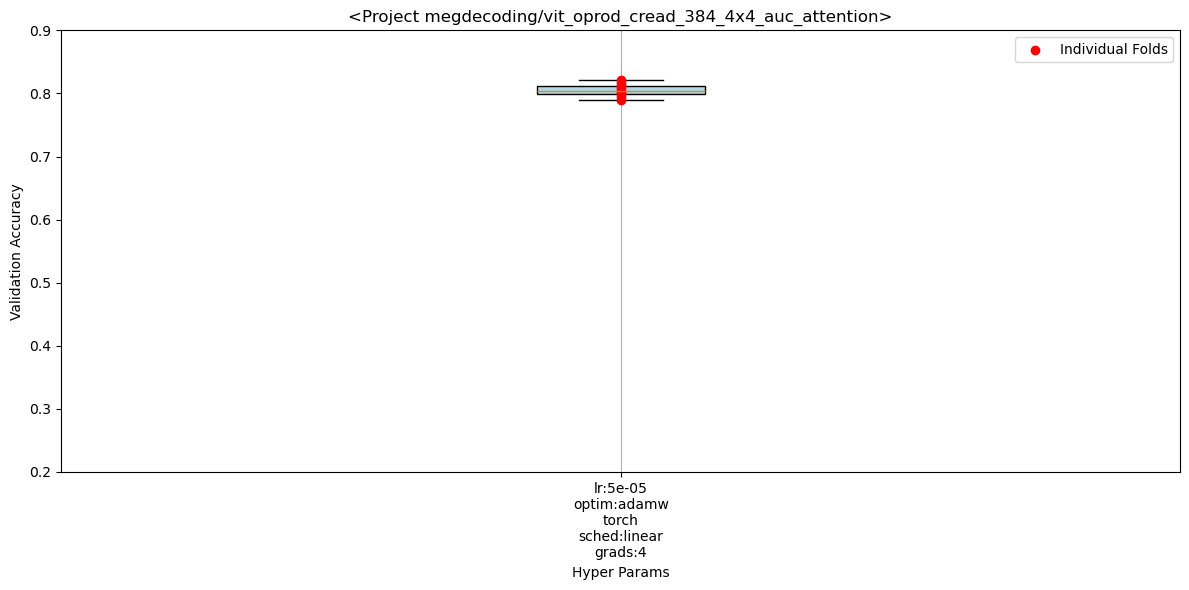

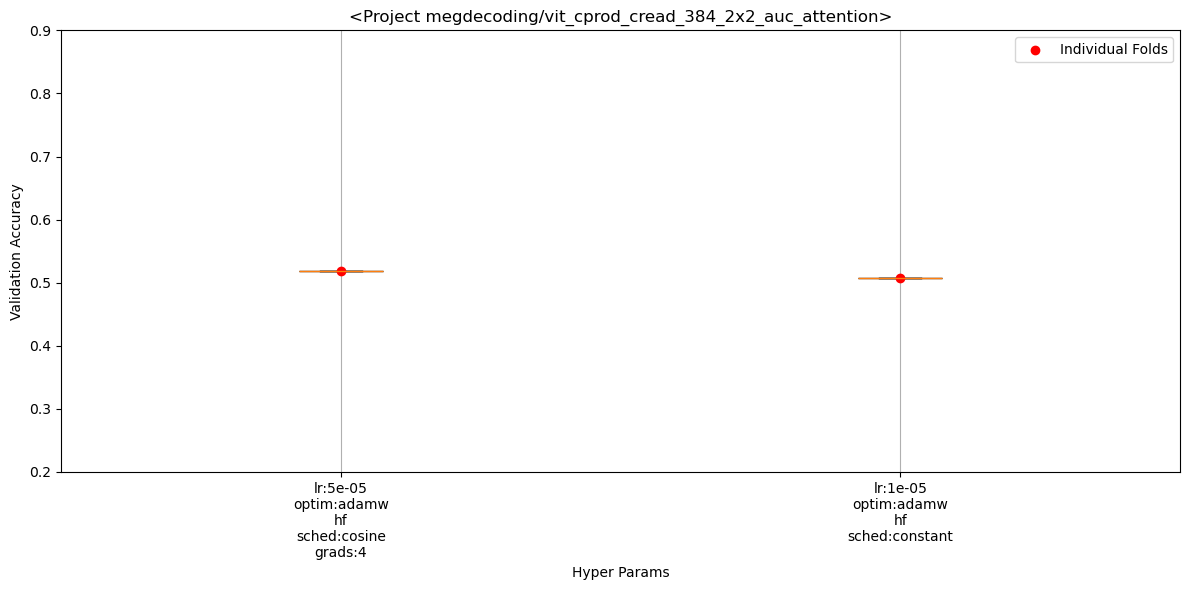

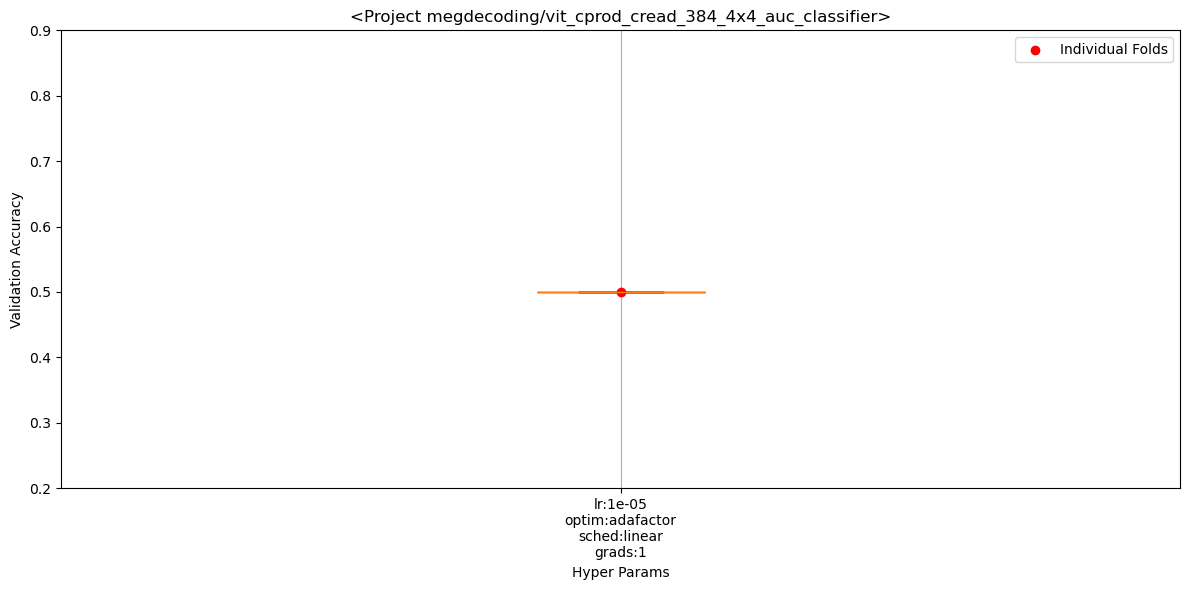

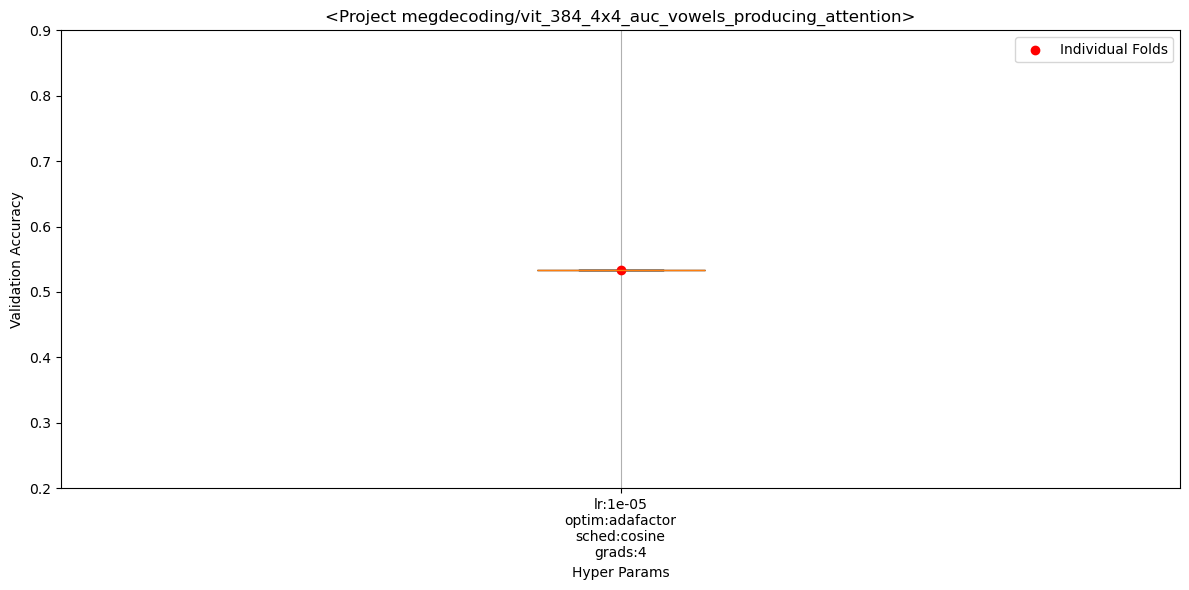

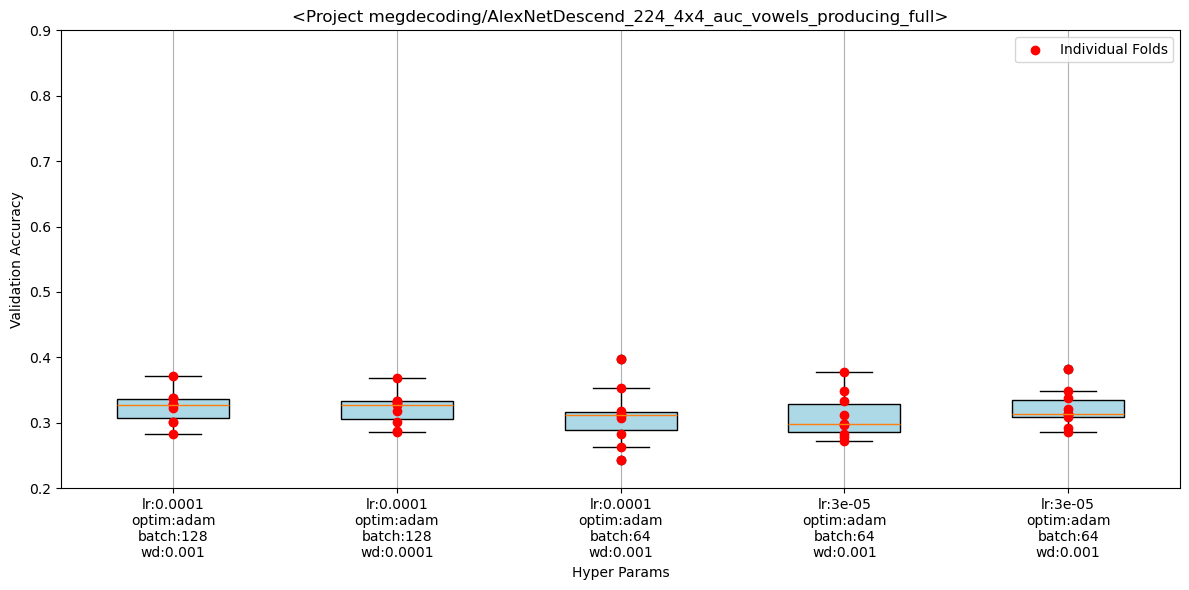

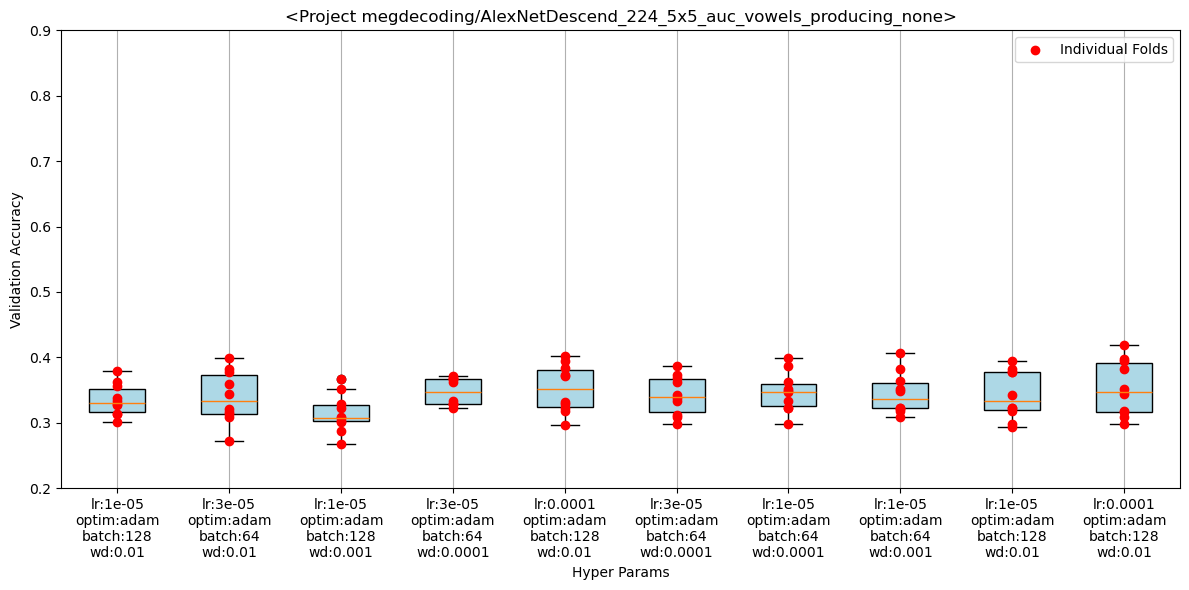

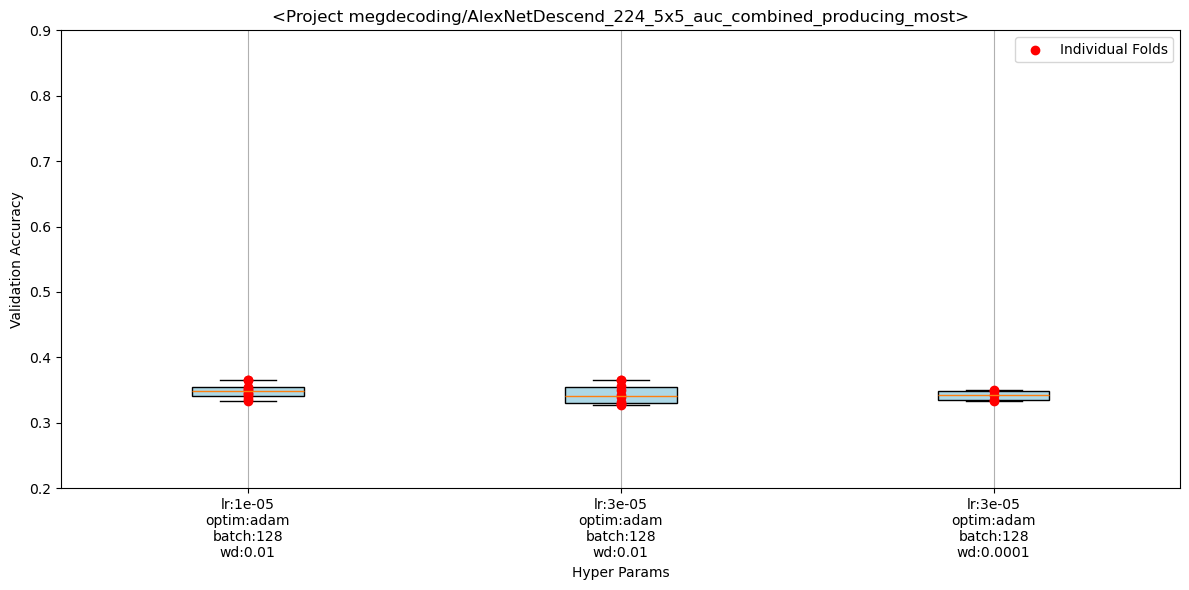

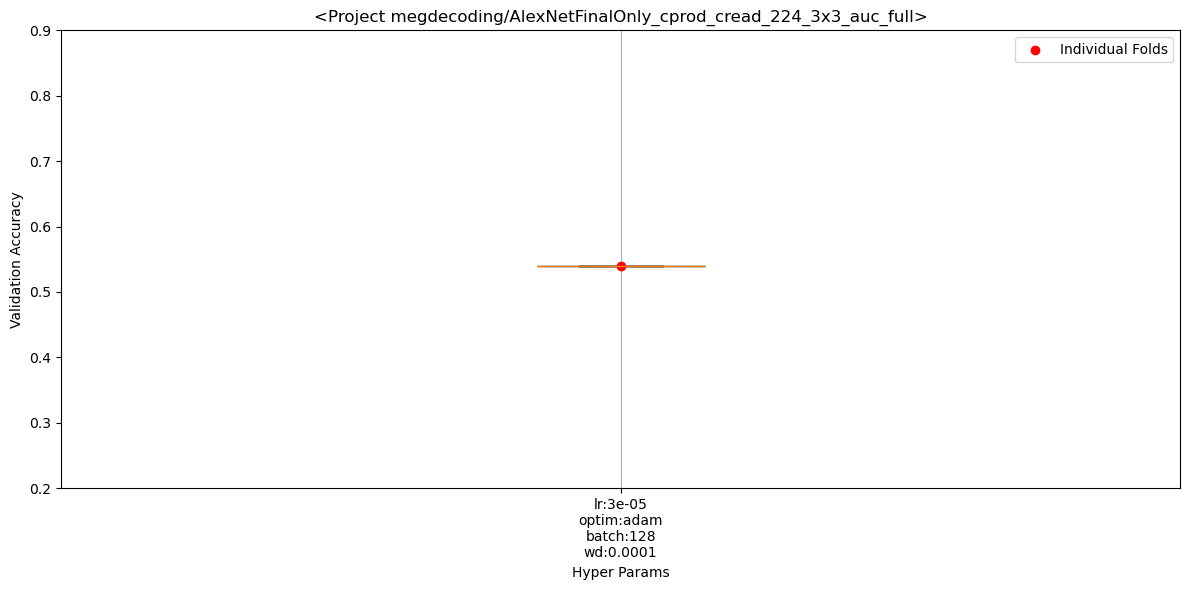

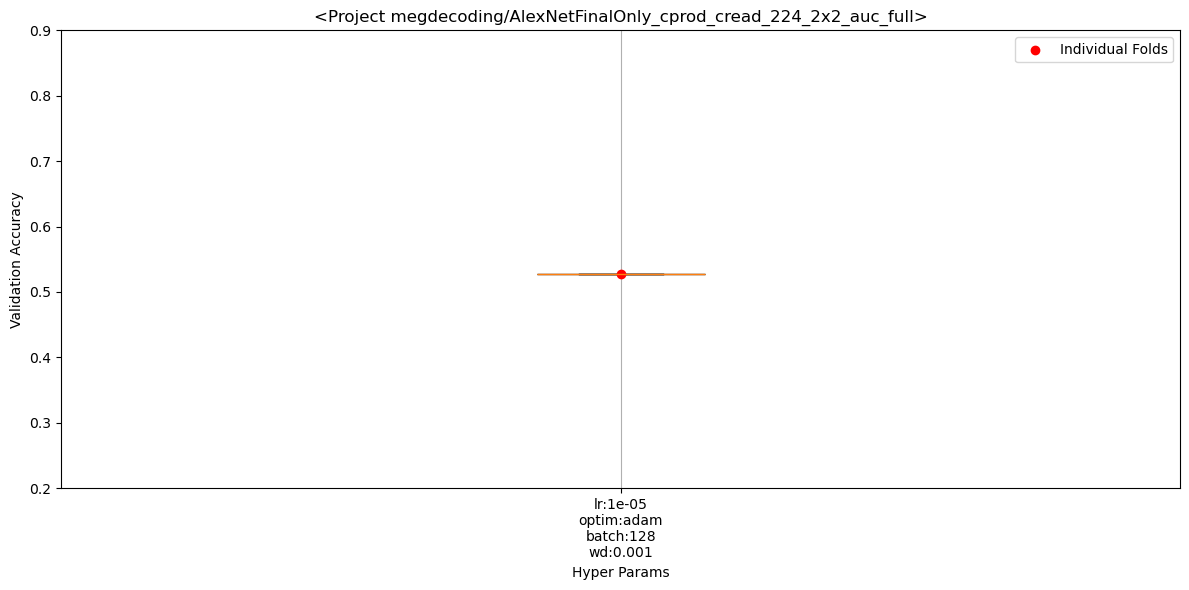

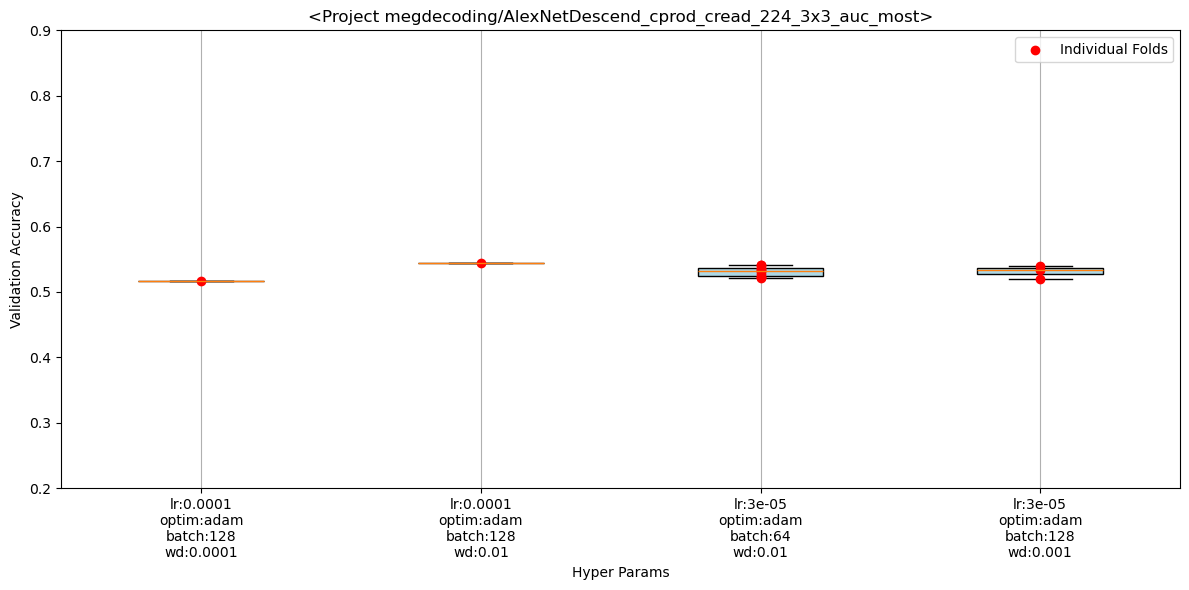

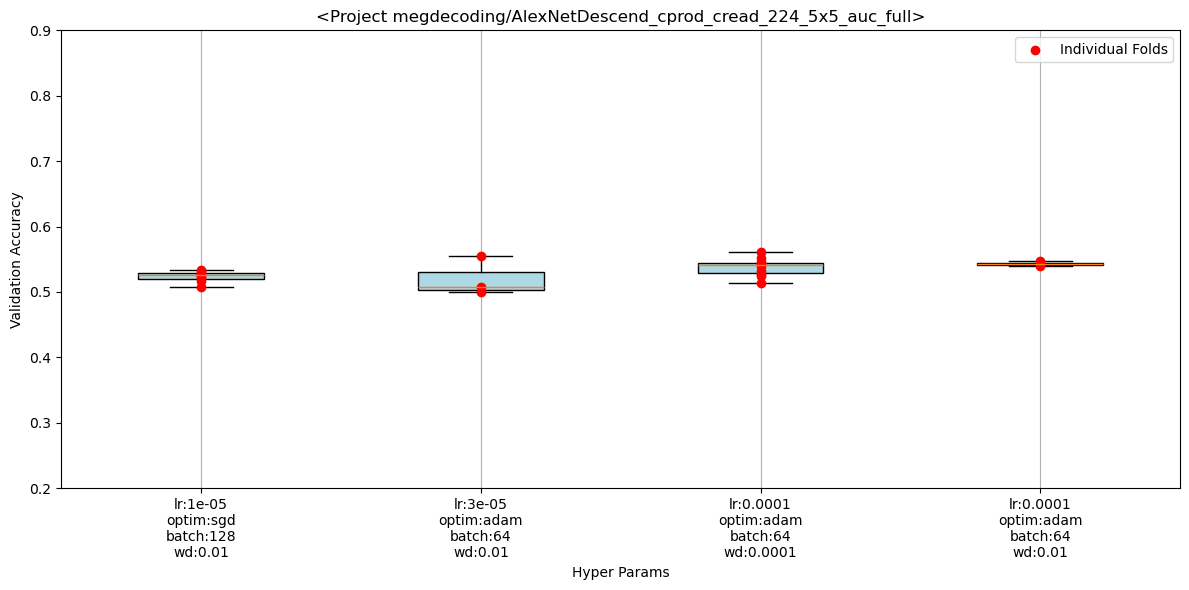

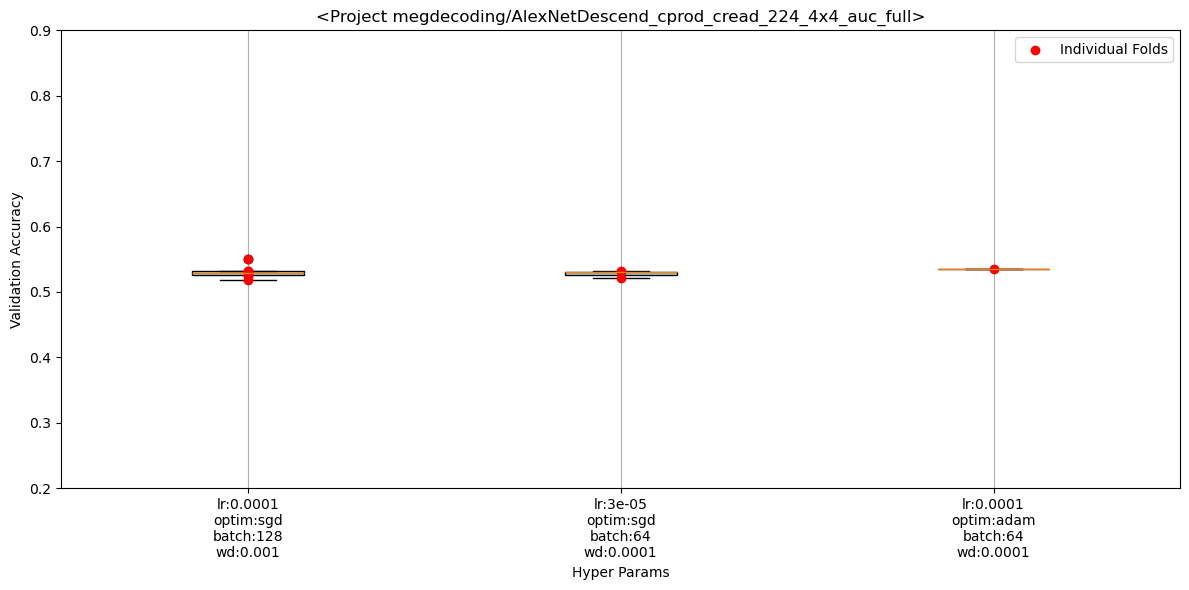

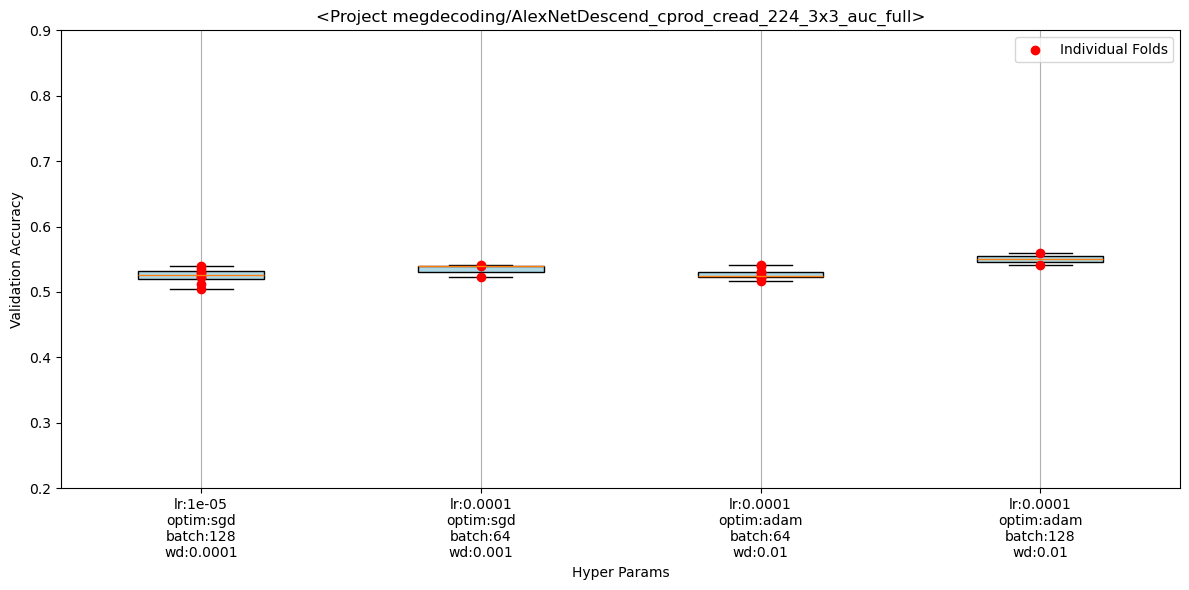

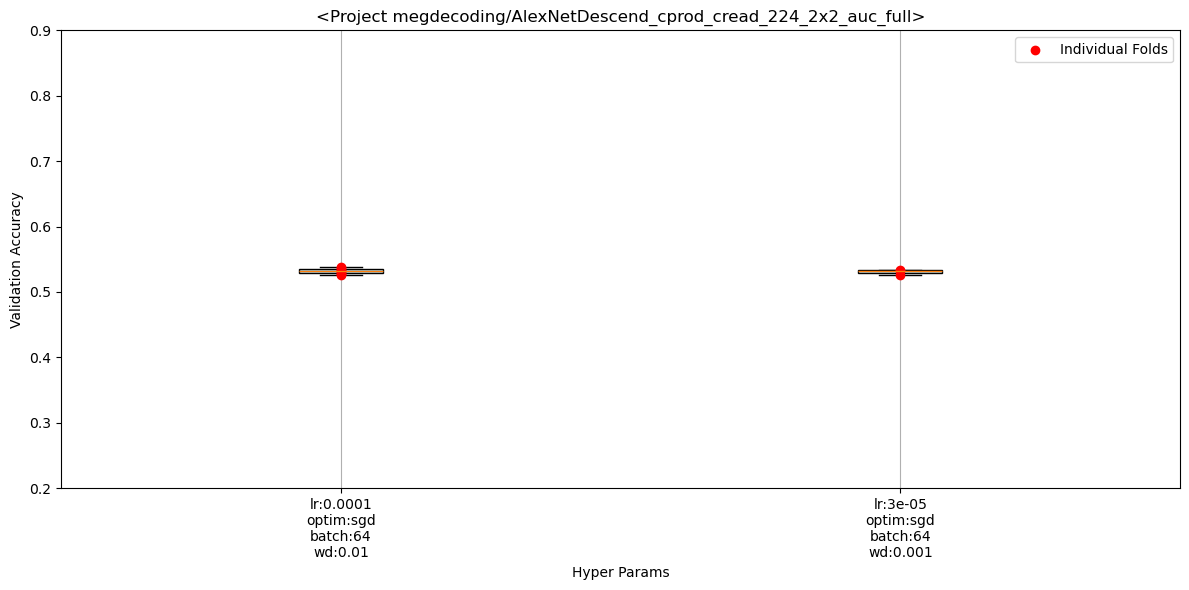

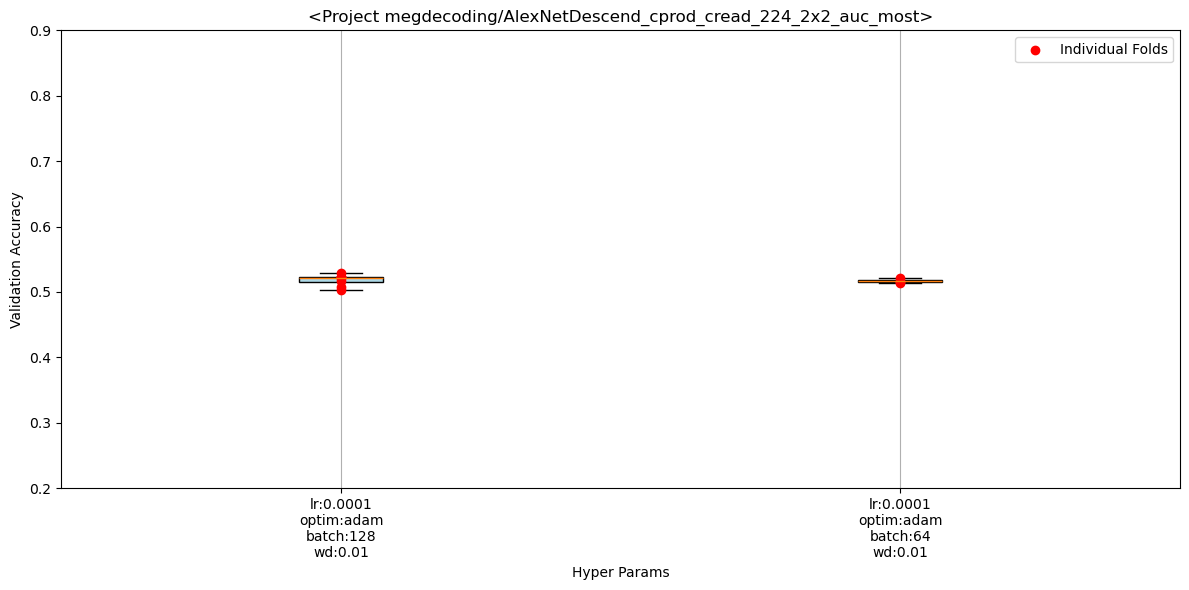

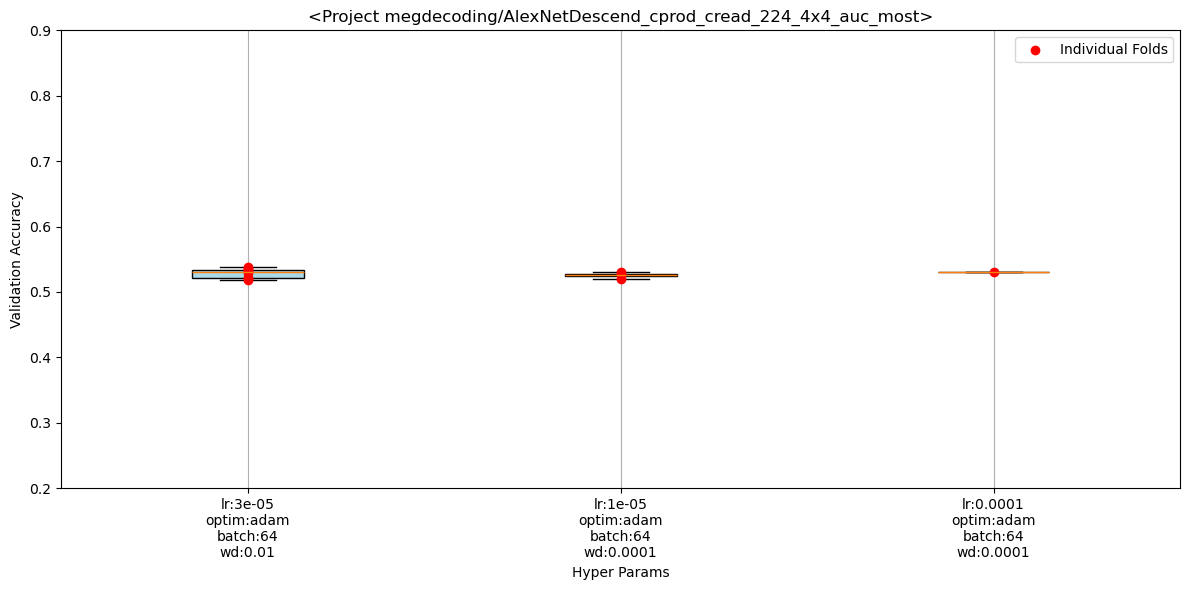

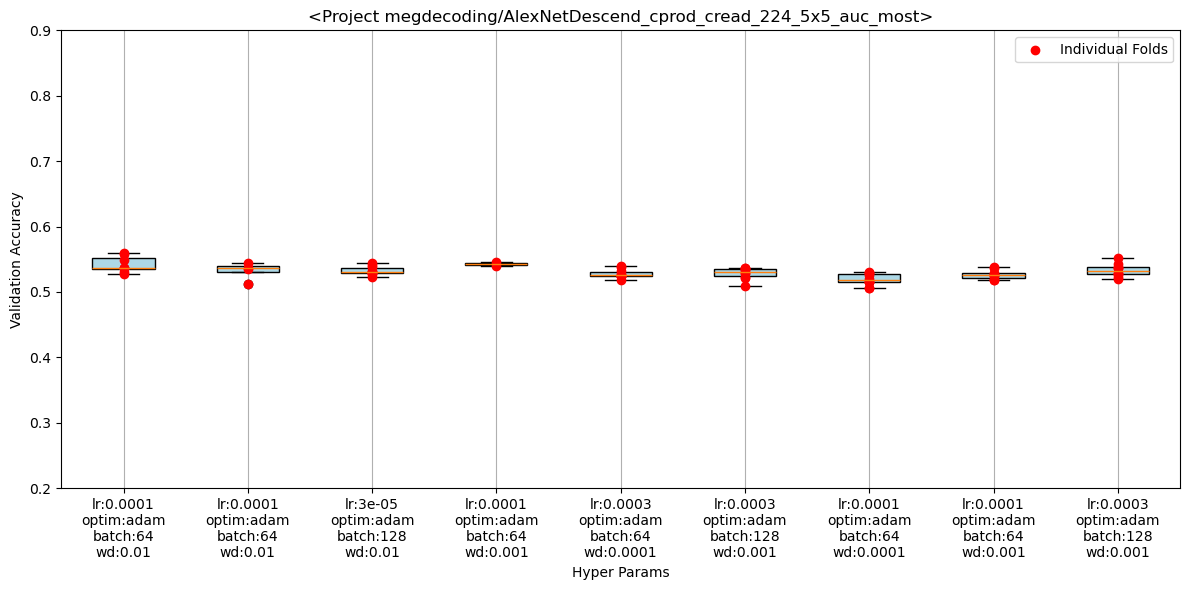

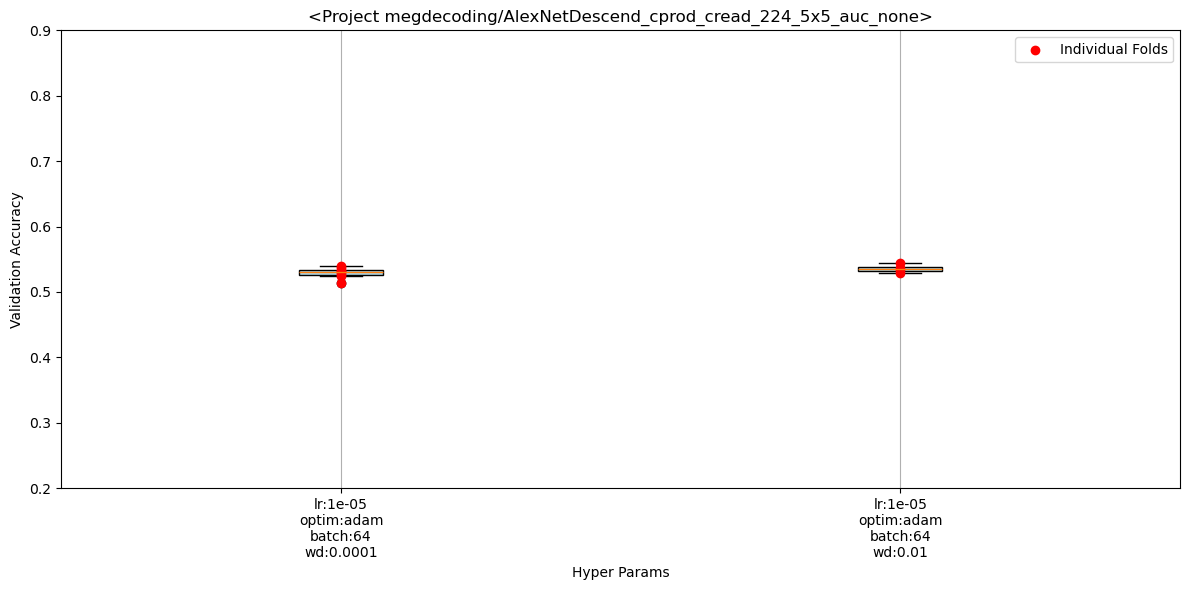

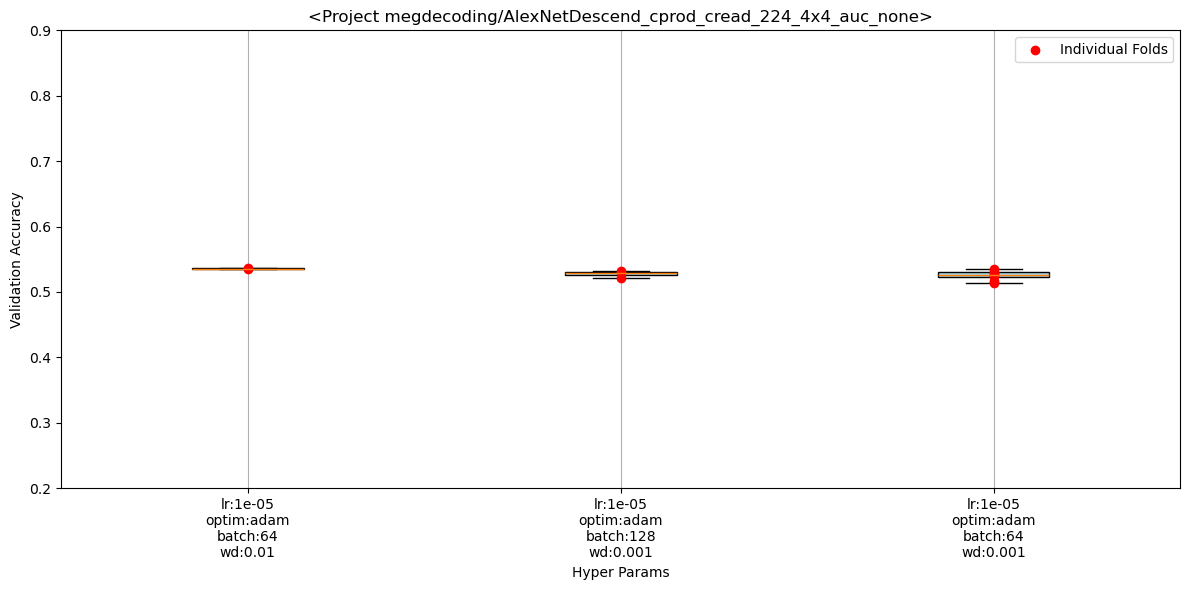

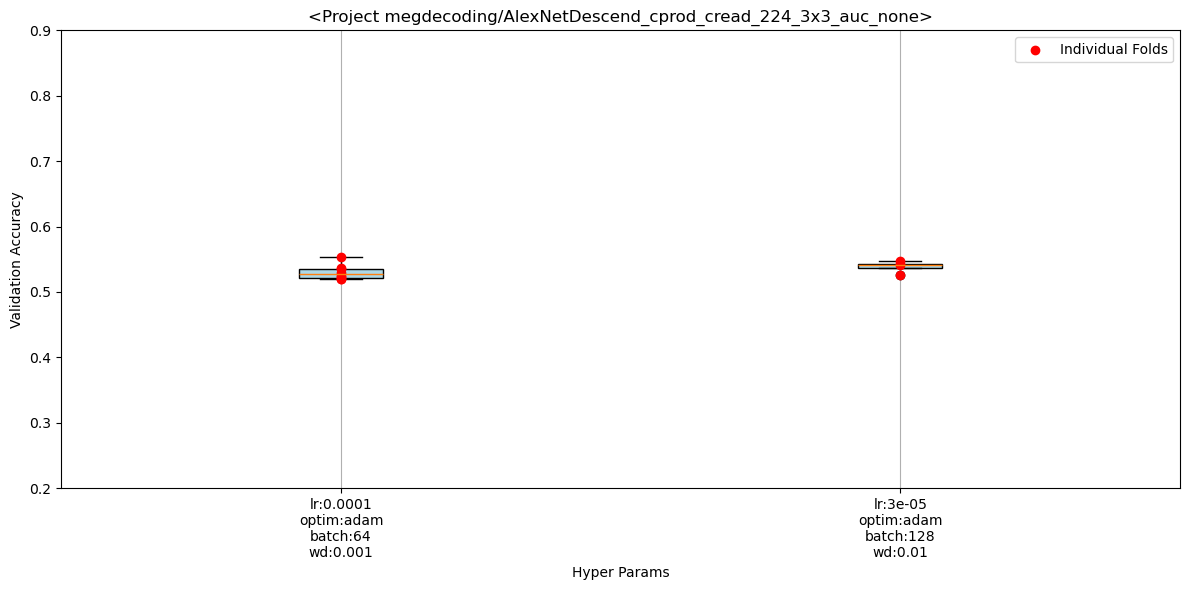

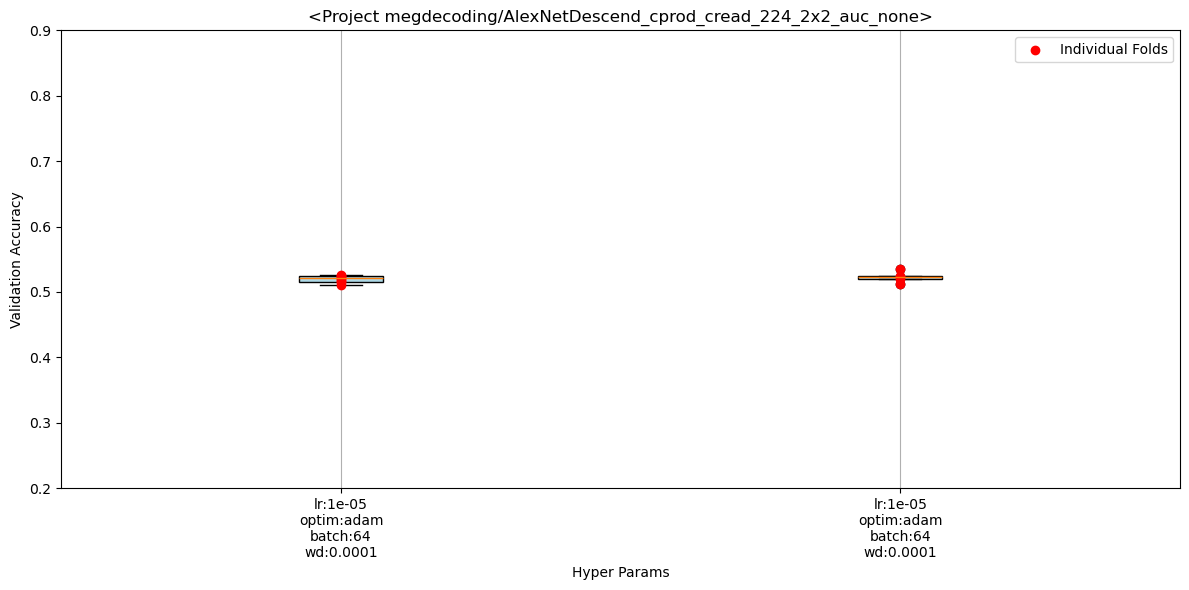

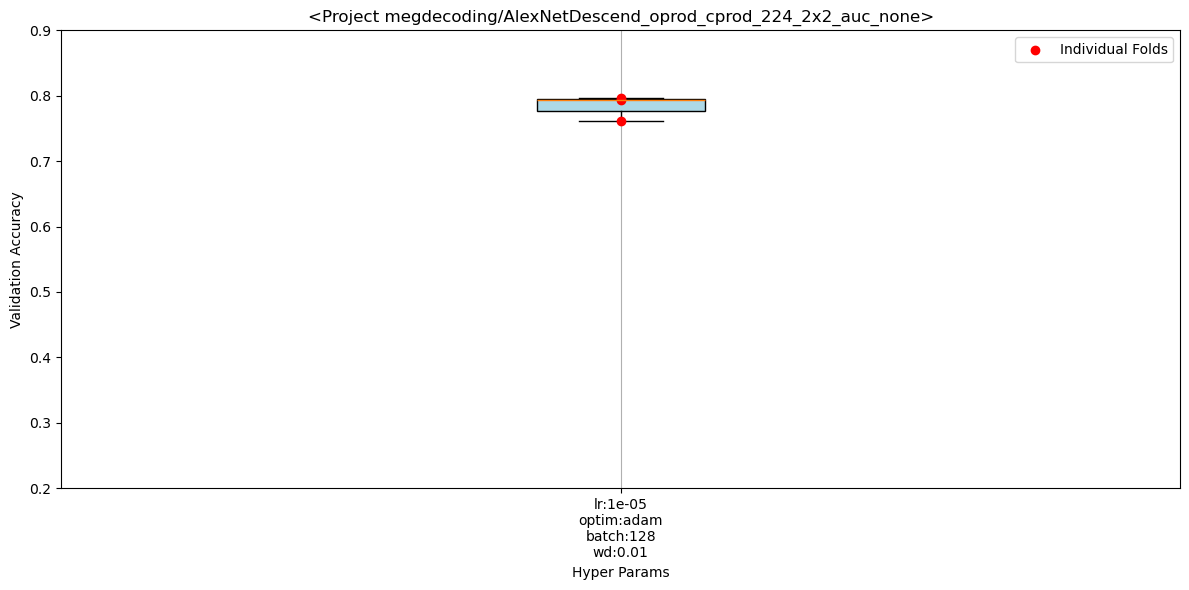

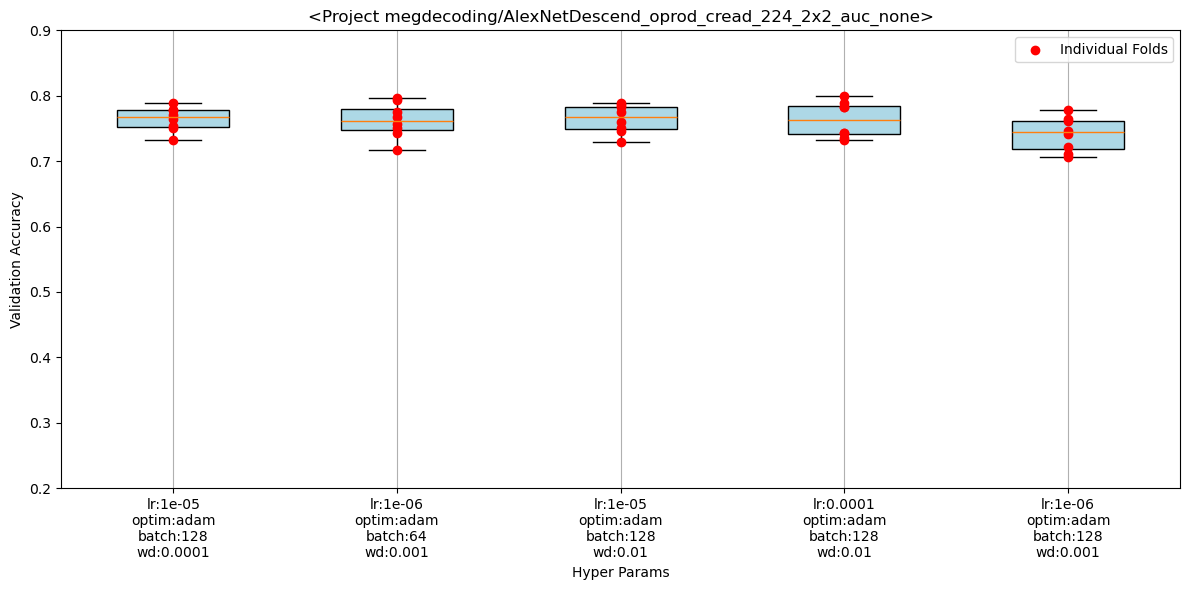

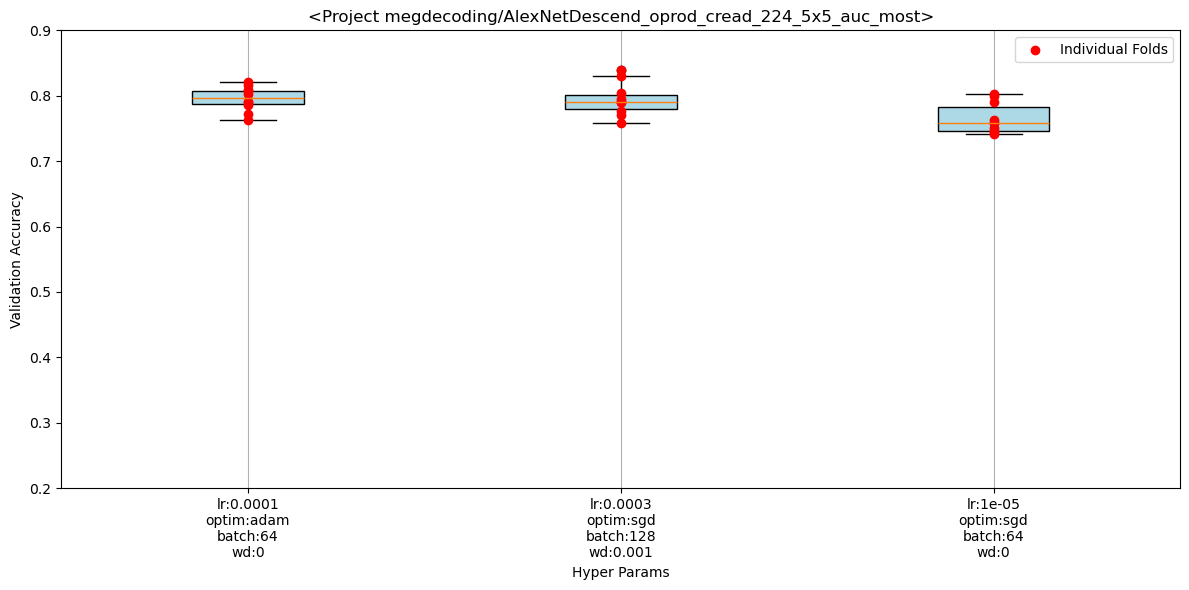

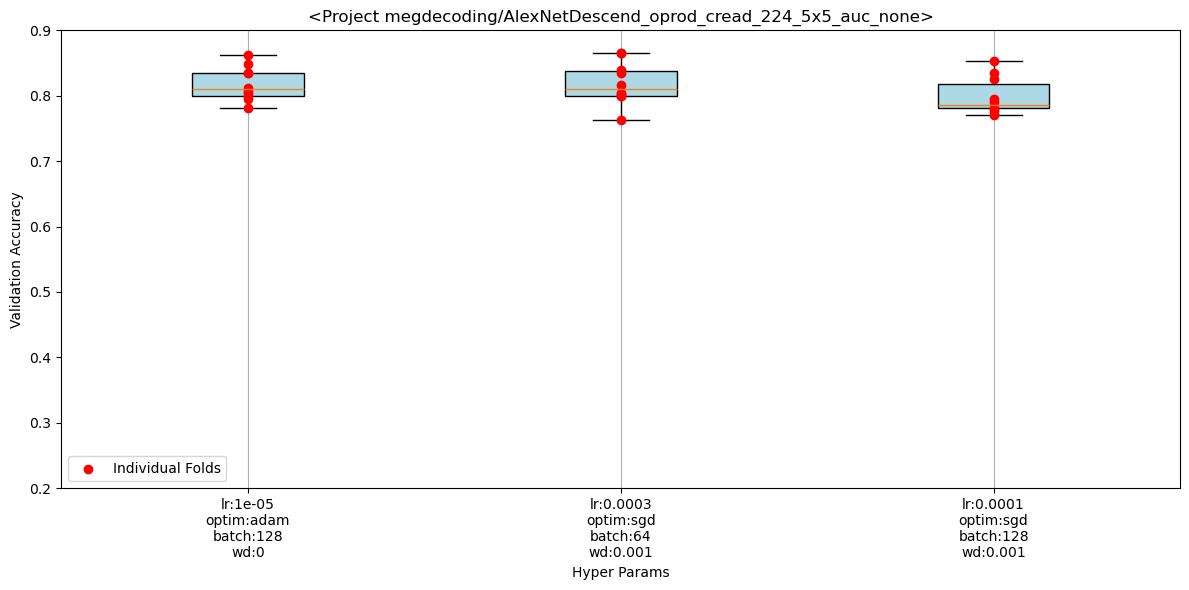

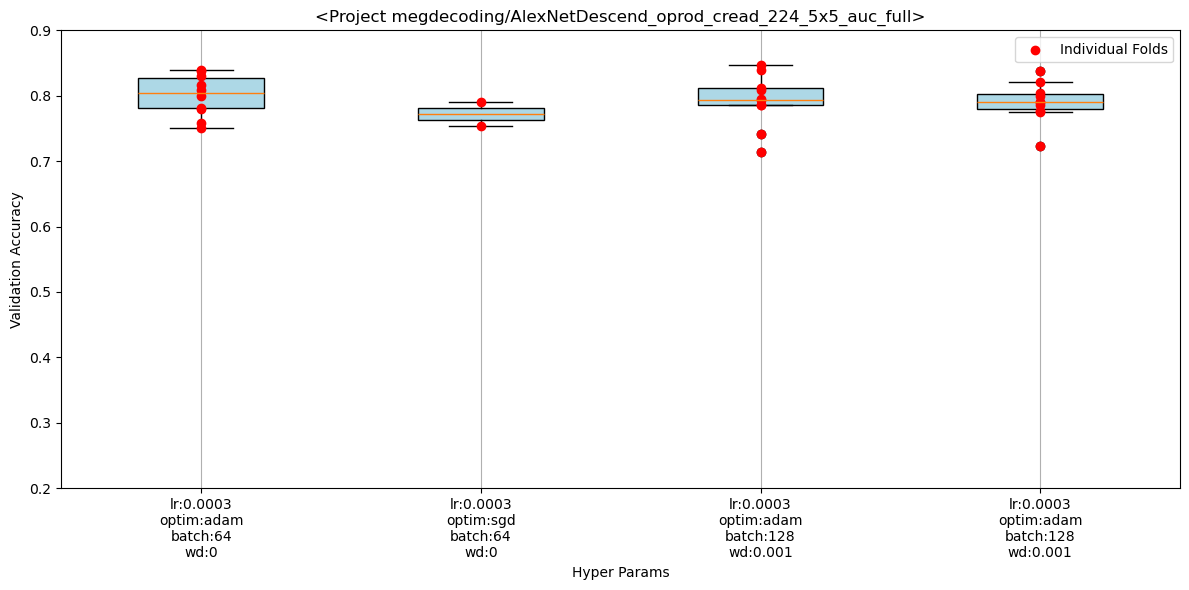

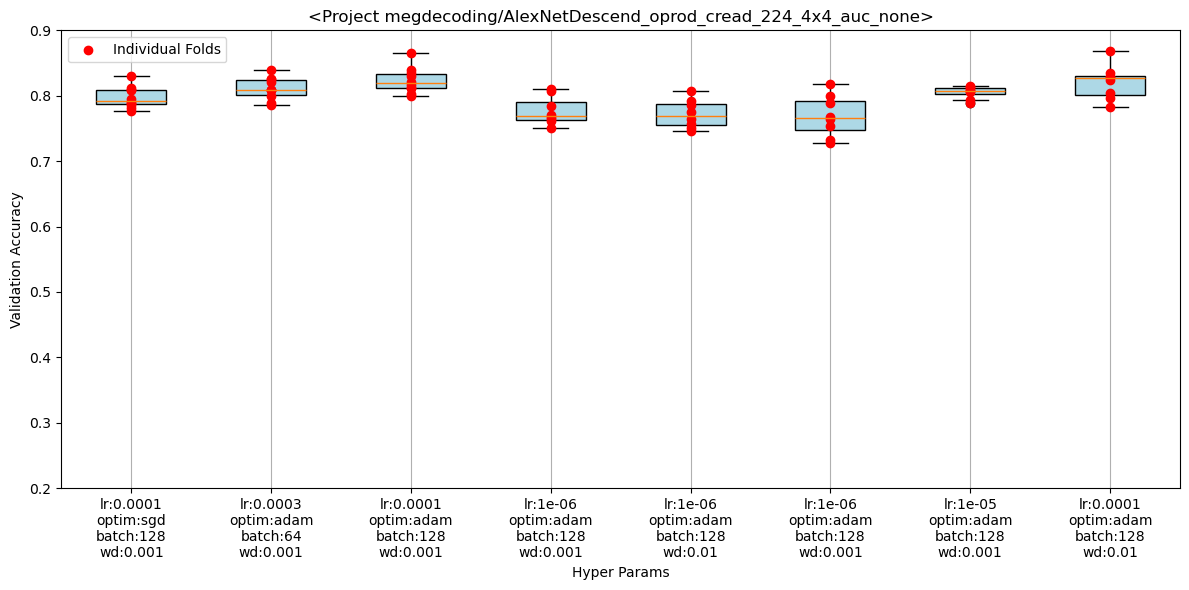

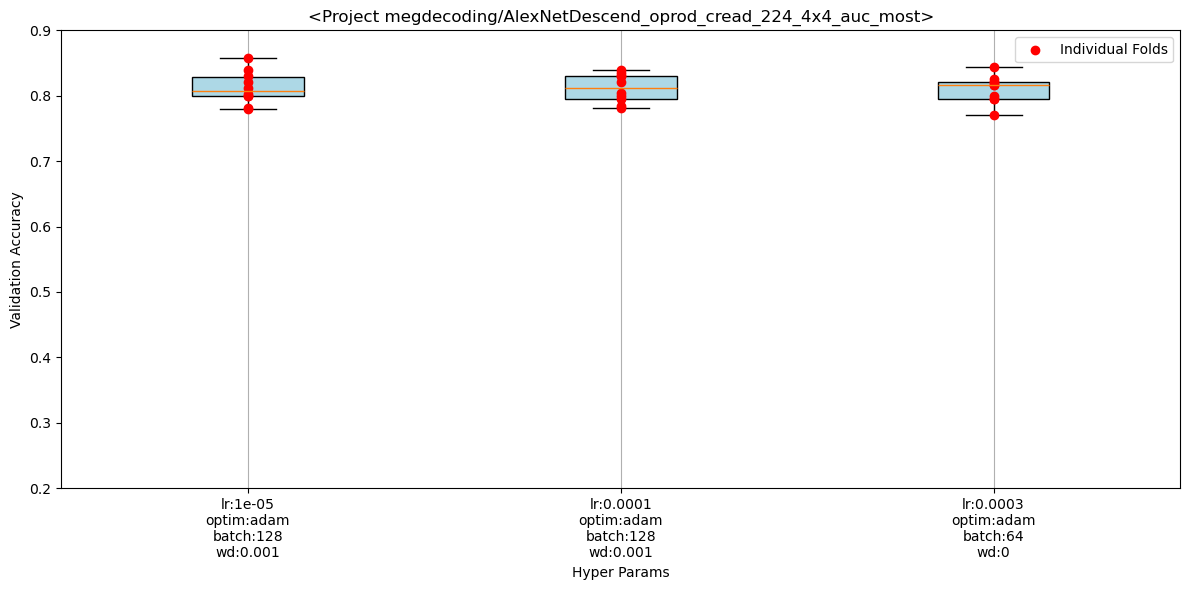

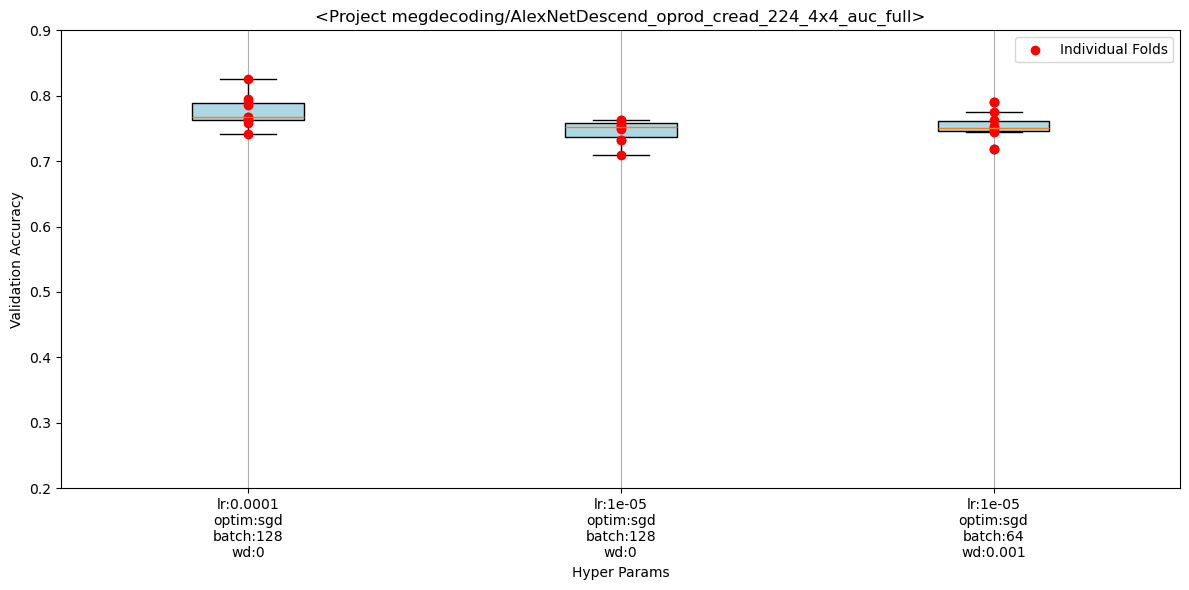

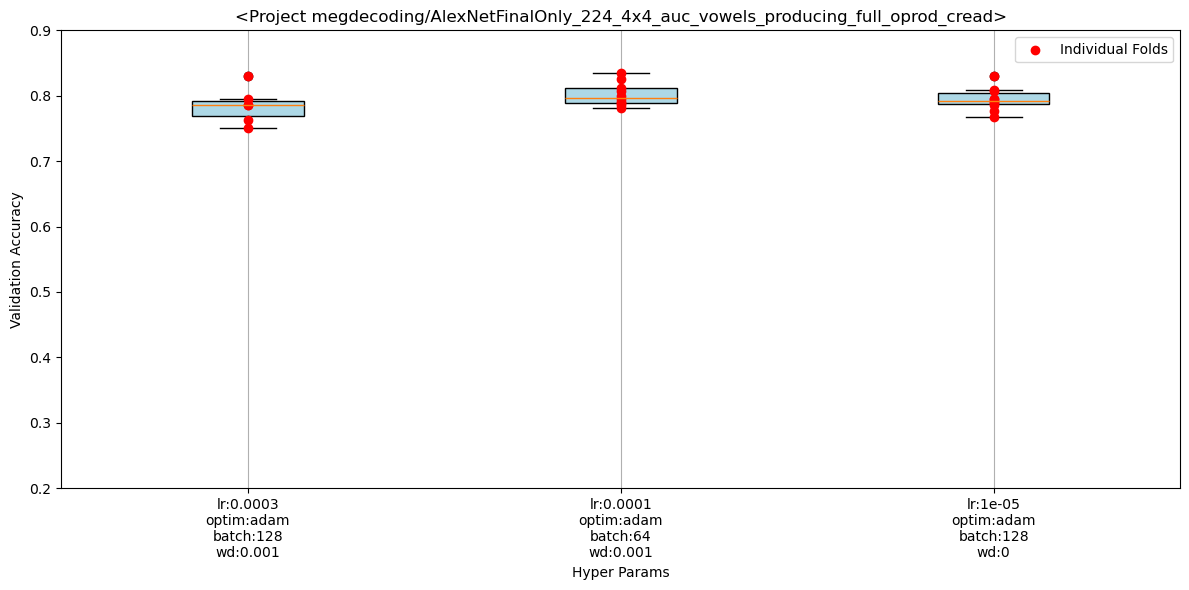

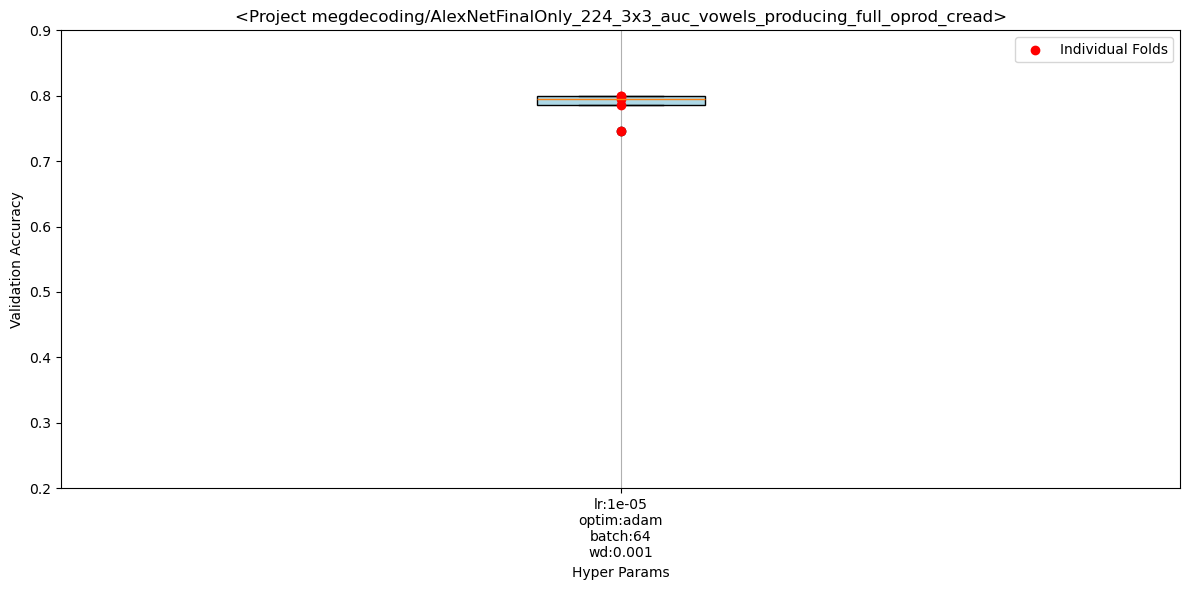

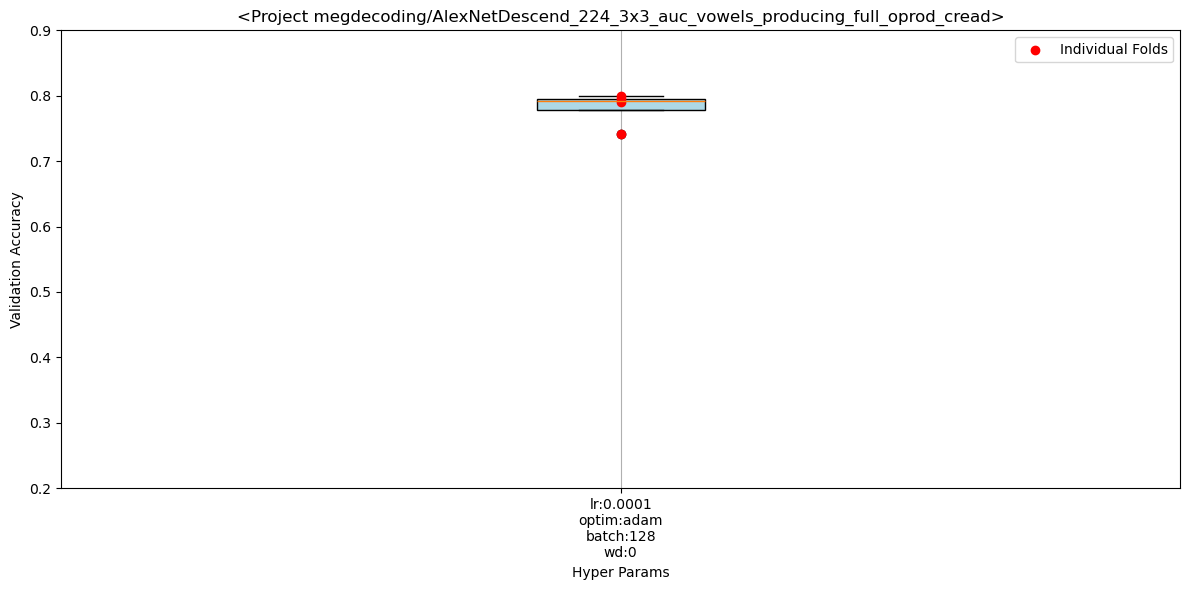

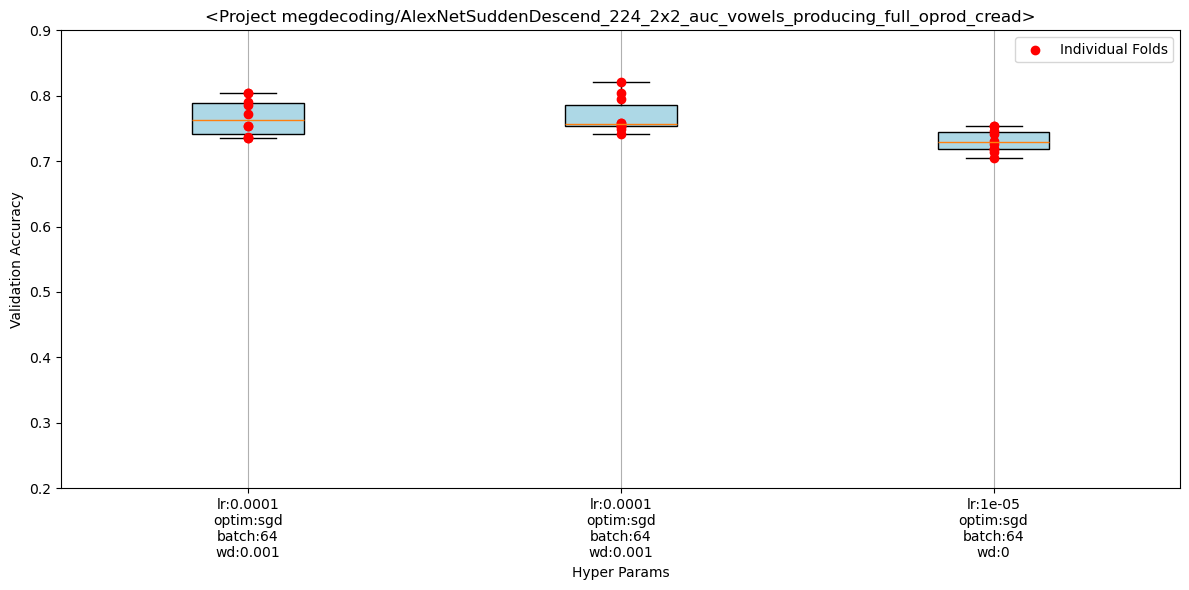

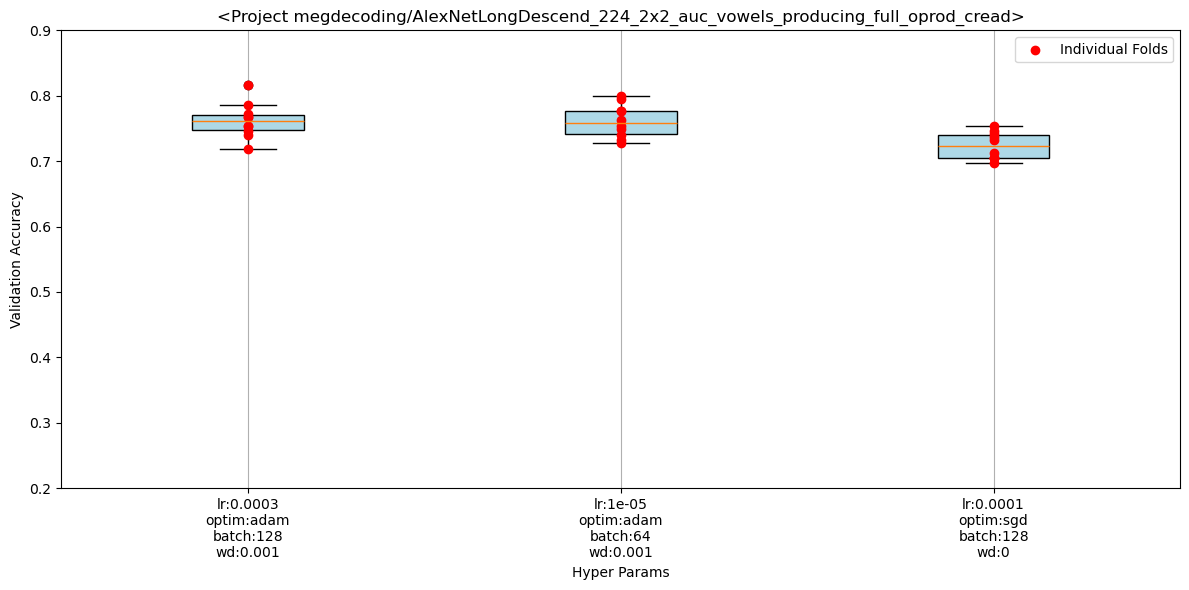

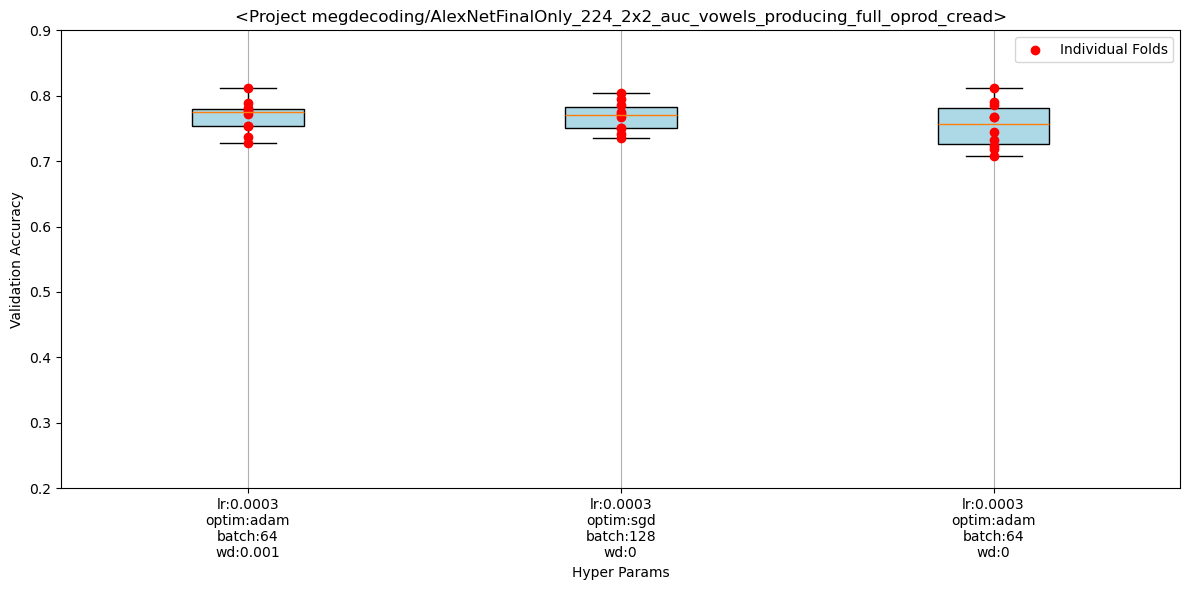

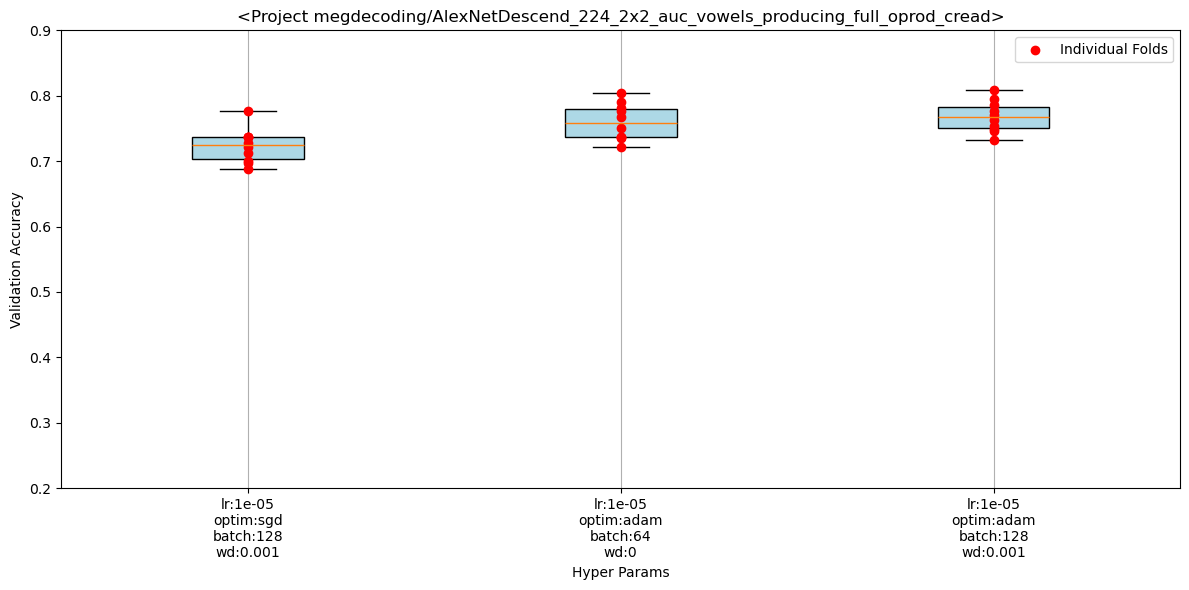

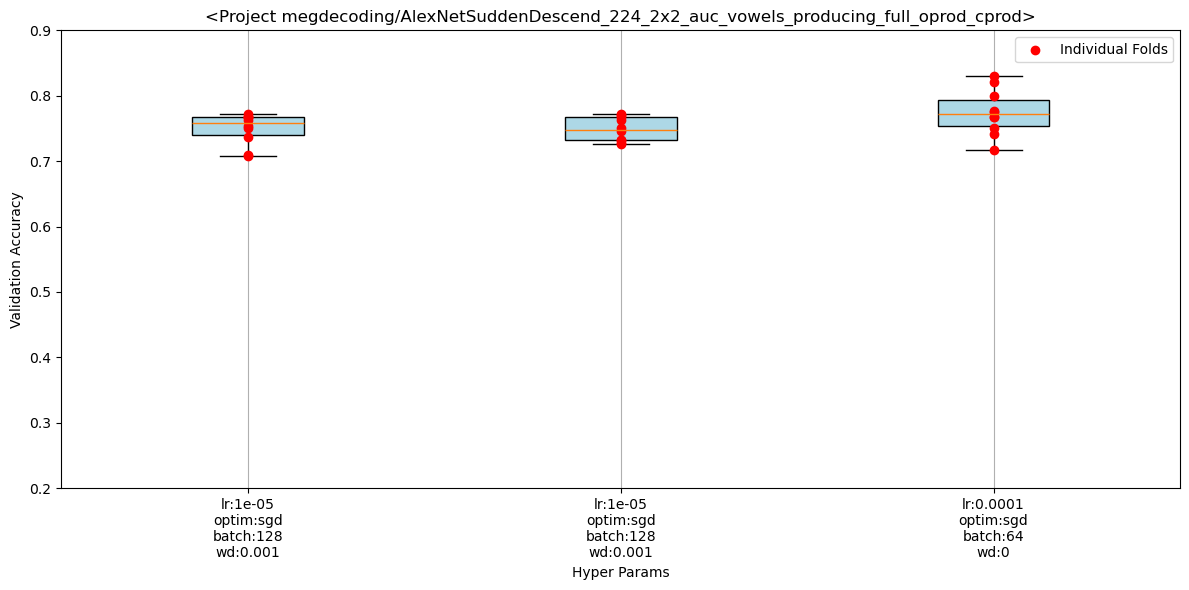

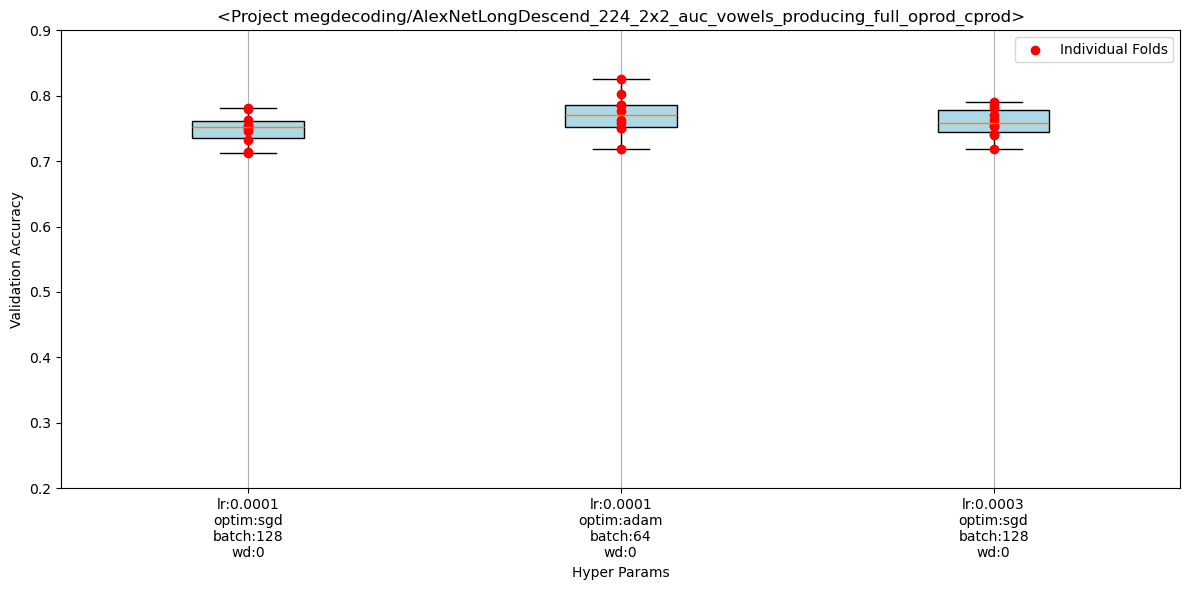

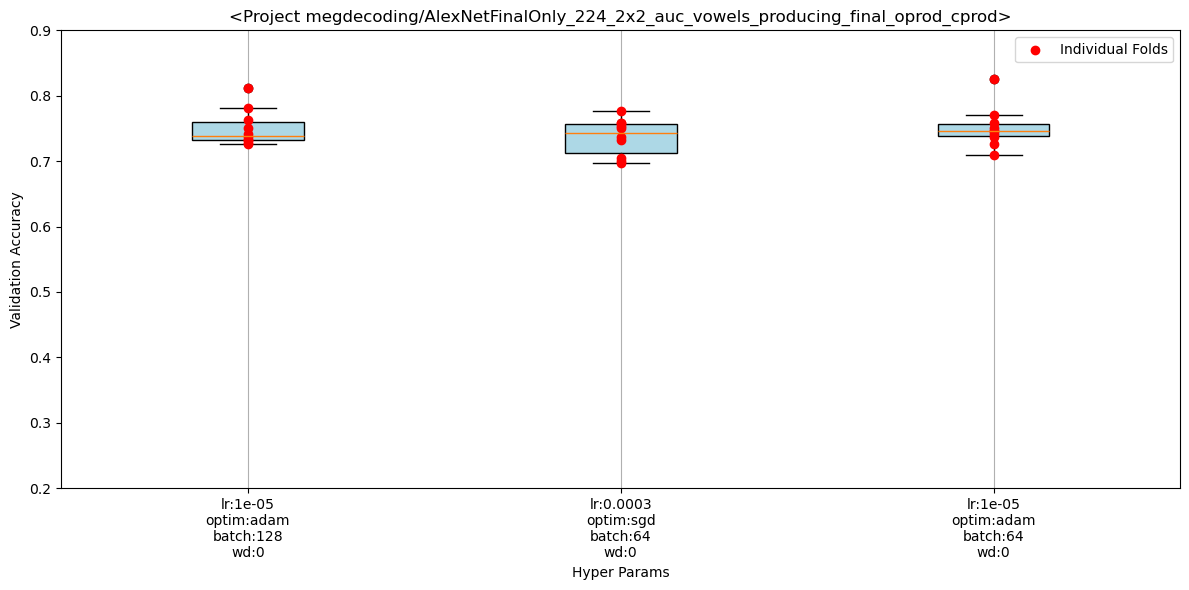

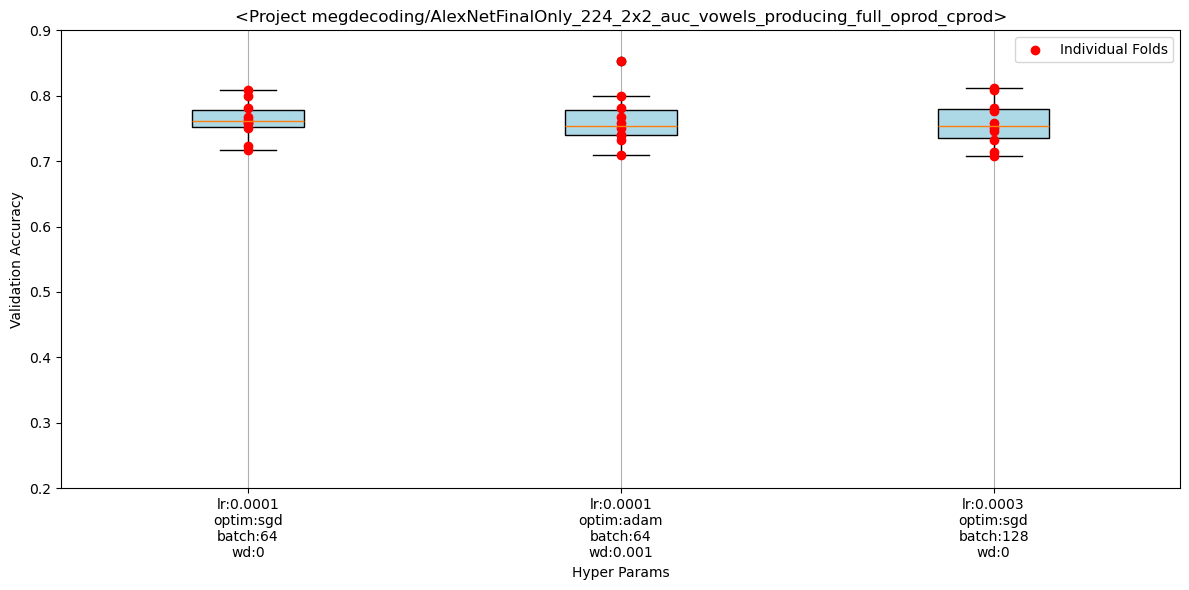

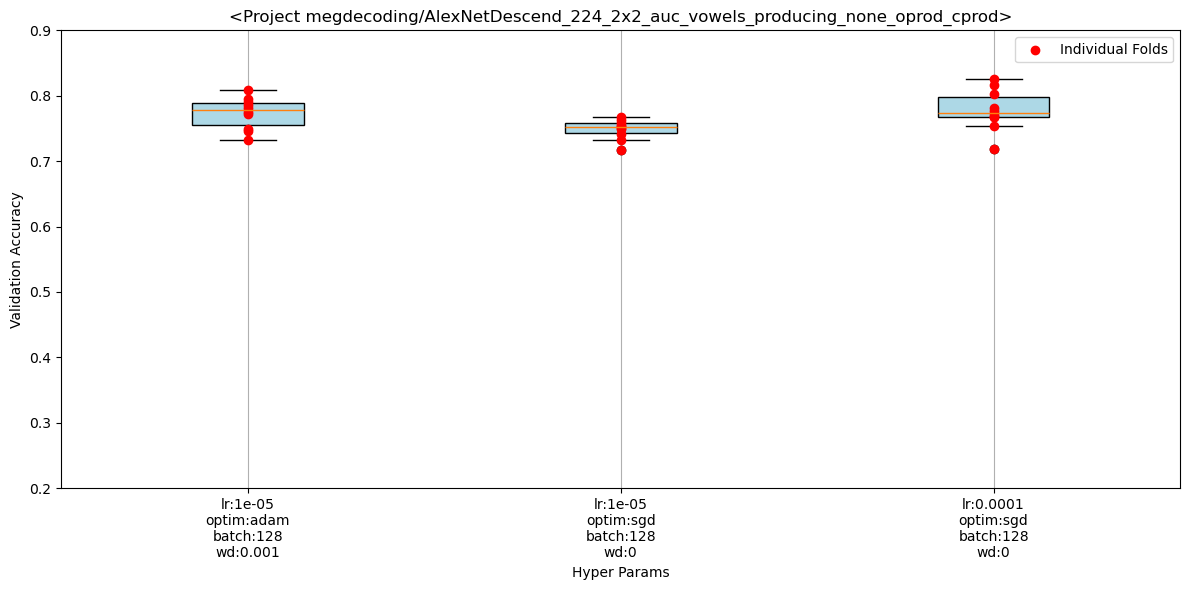

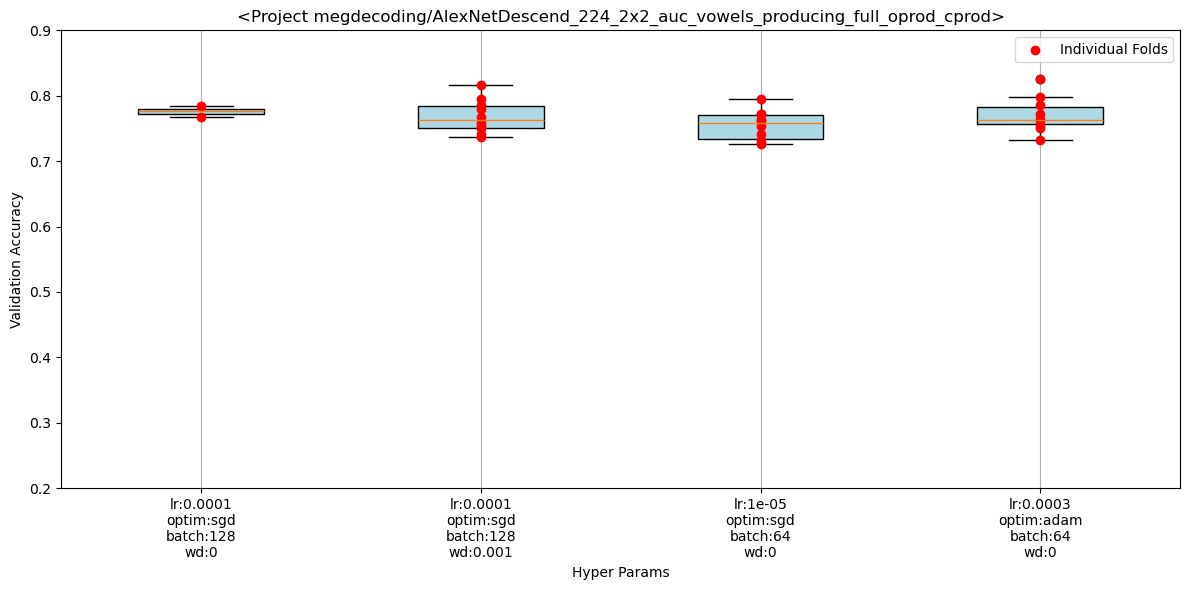

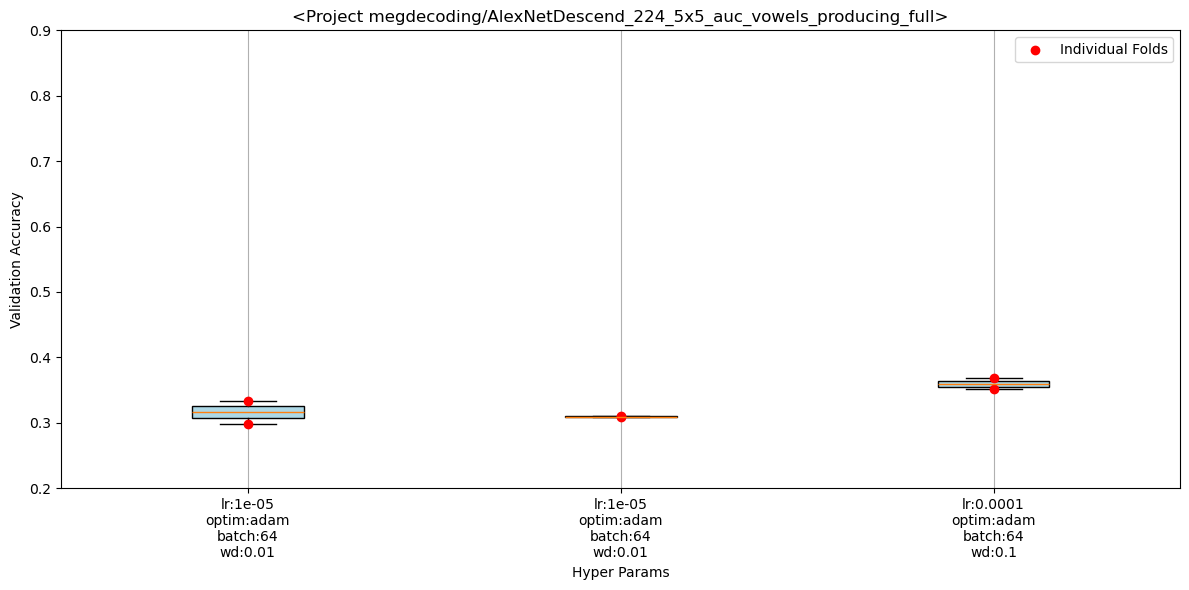

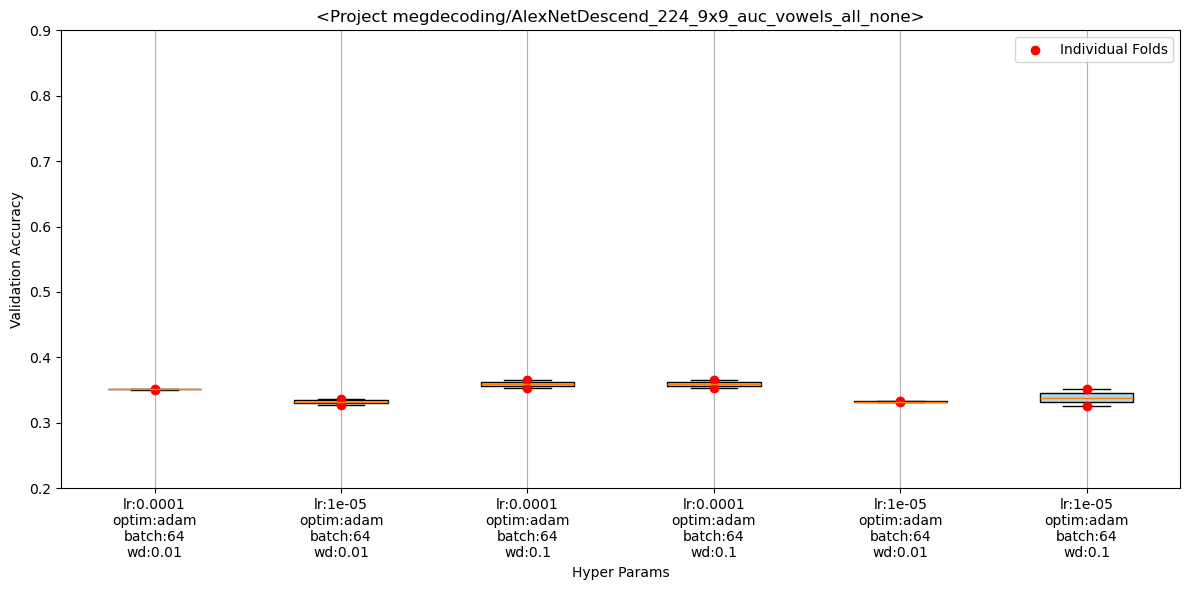

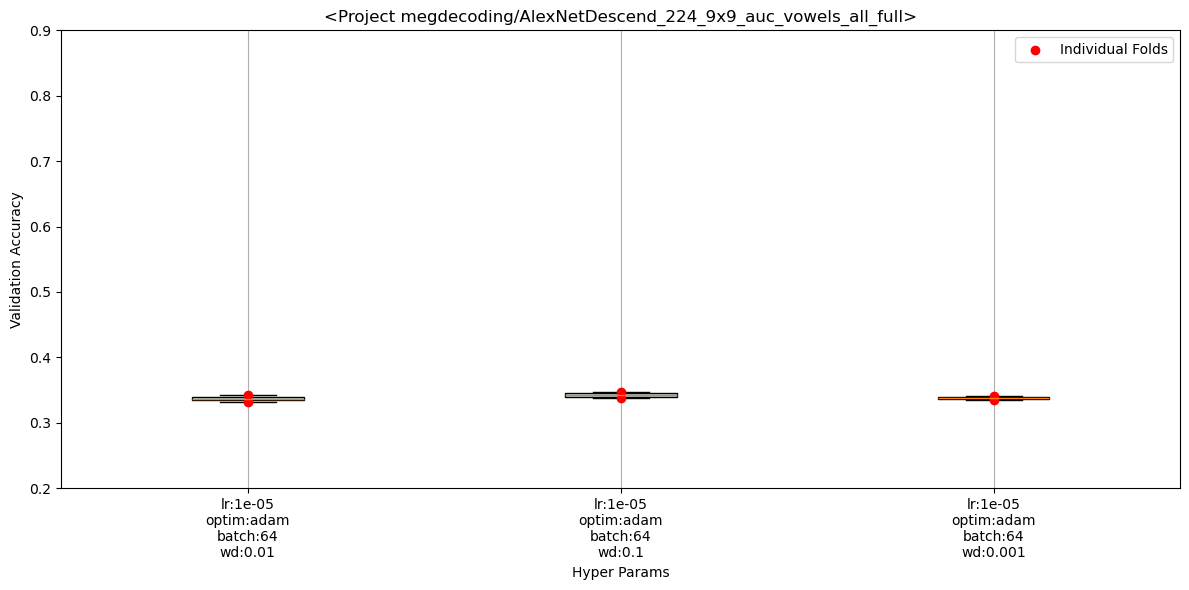

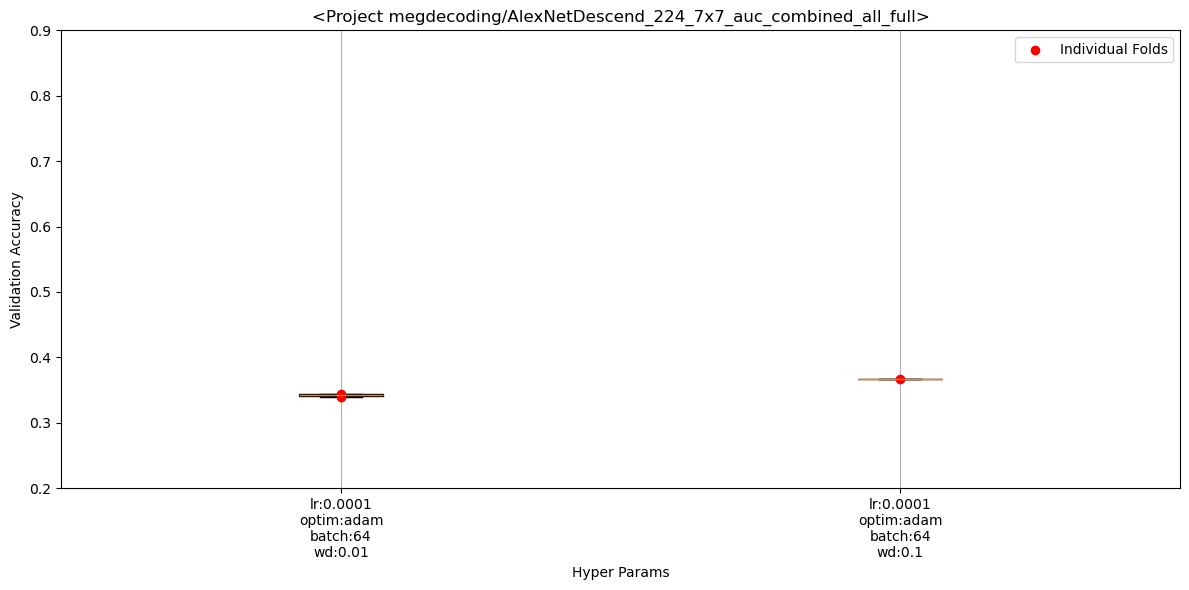

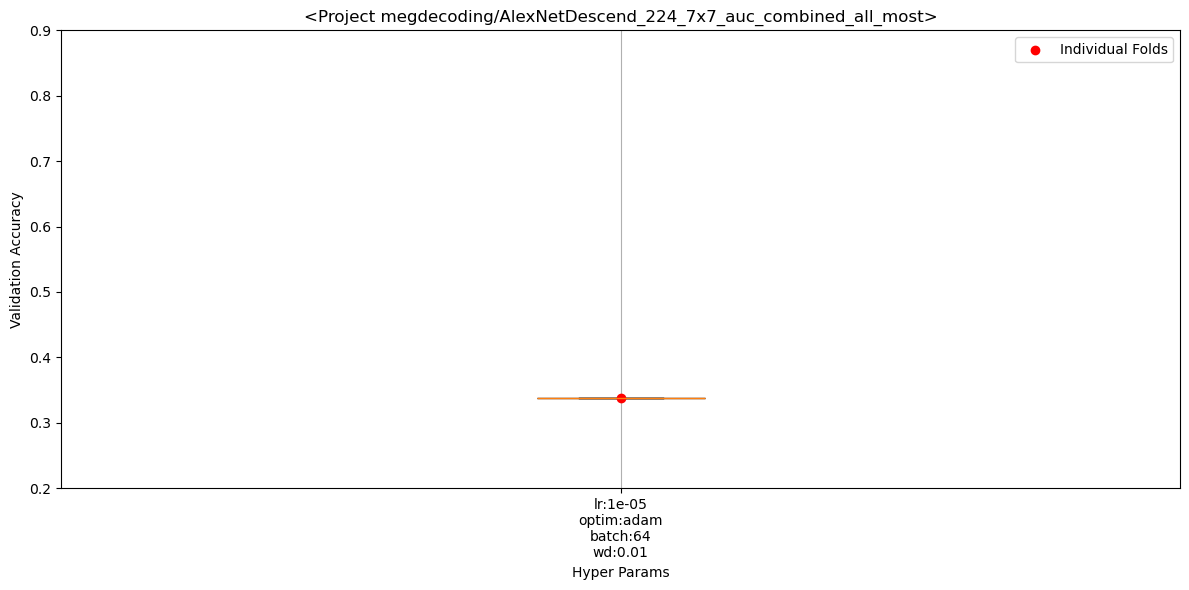

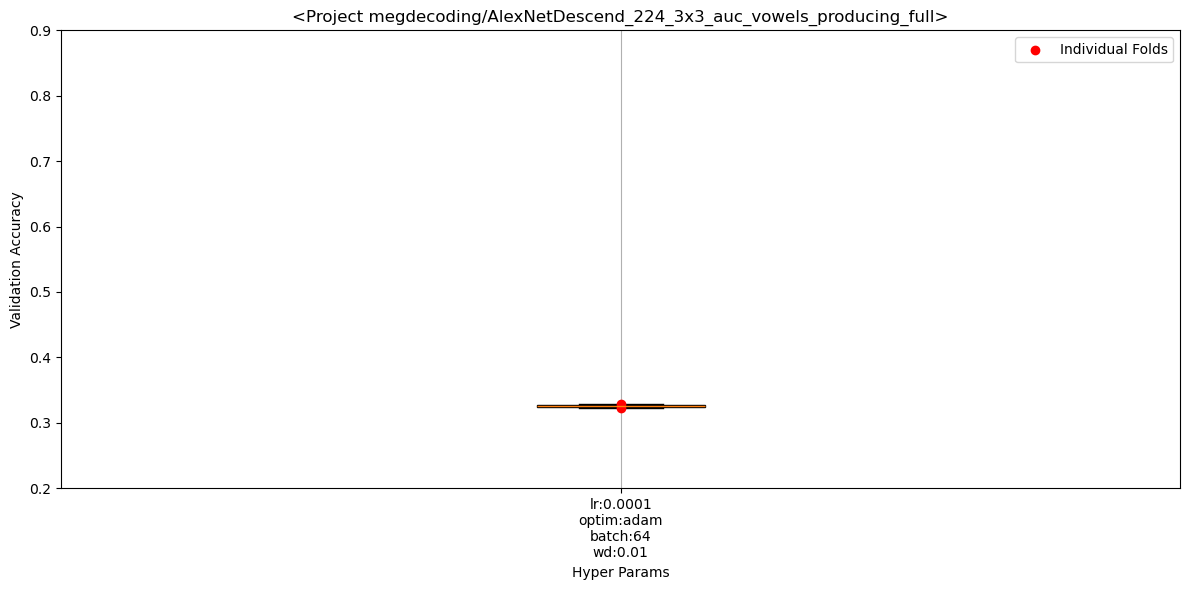

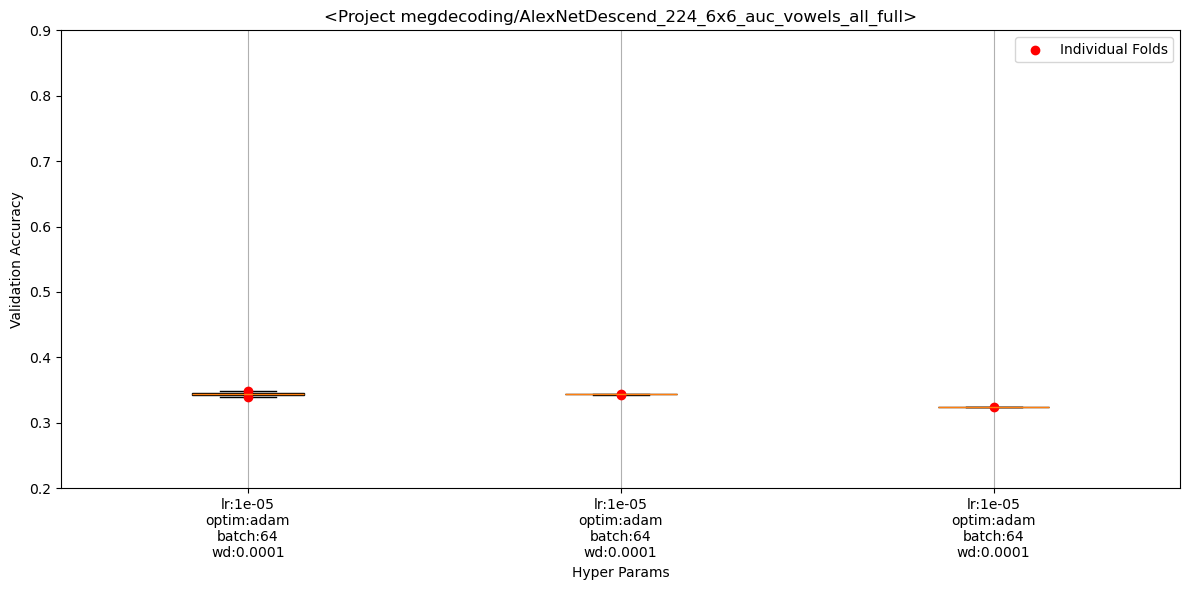

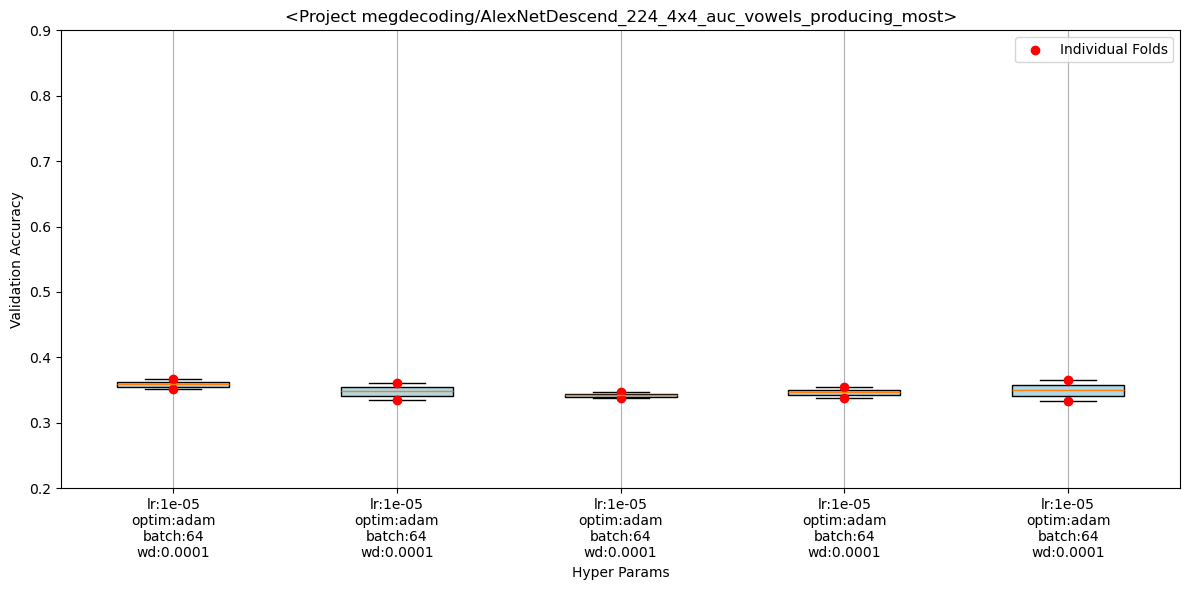

<Figure size 1200x600 with 0 Axes>

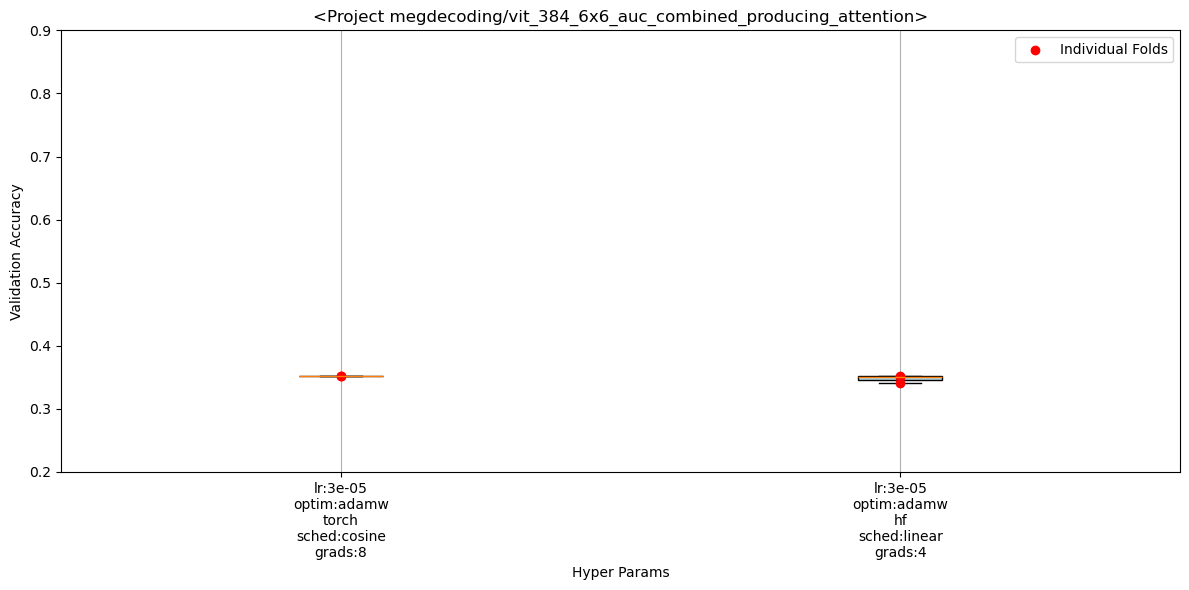

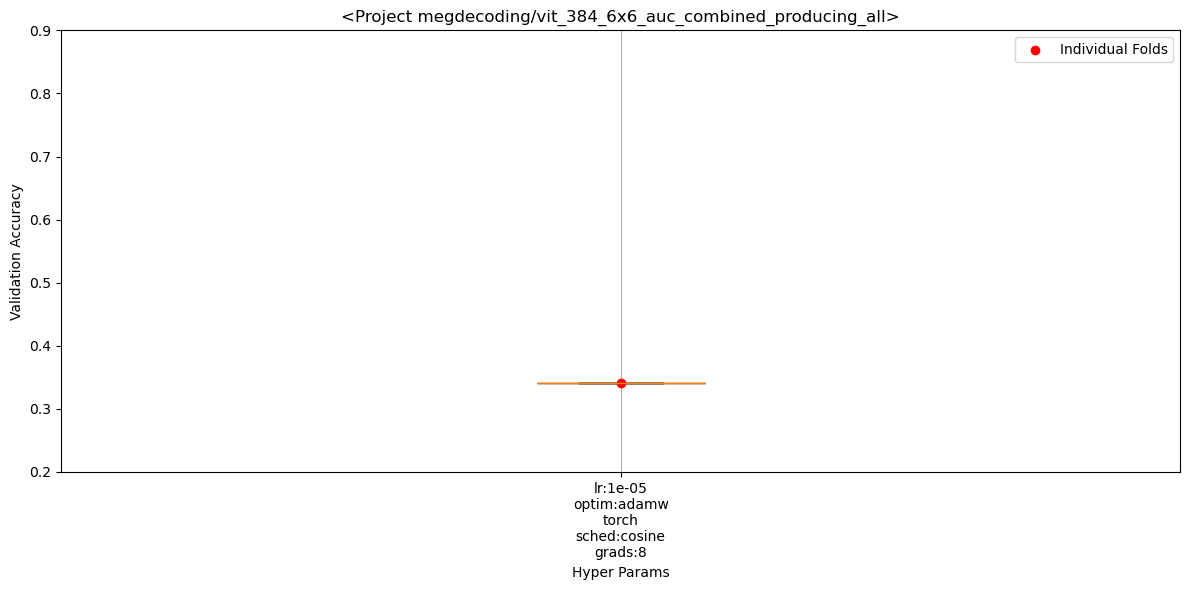

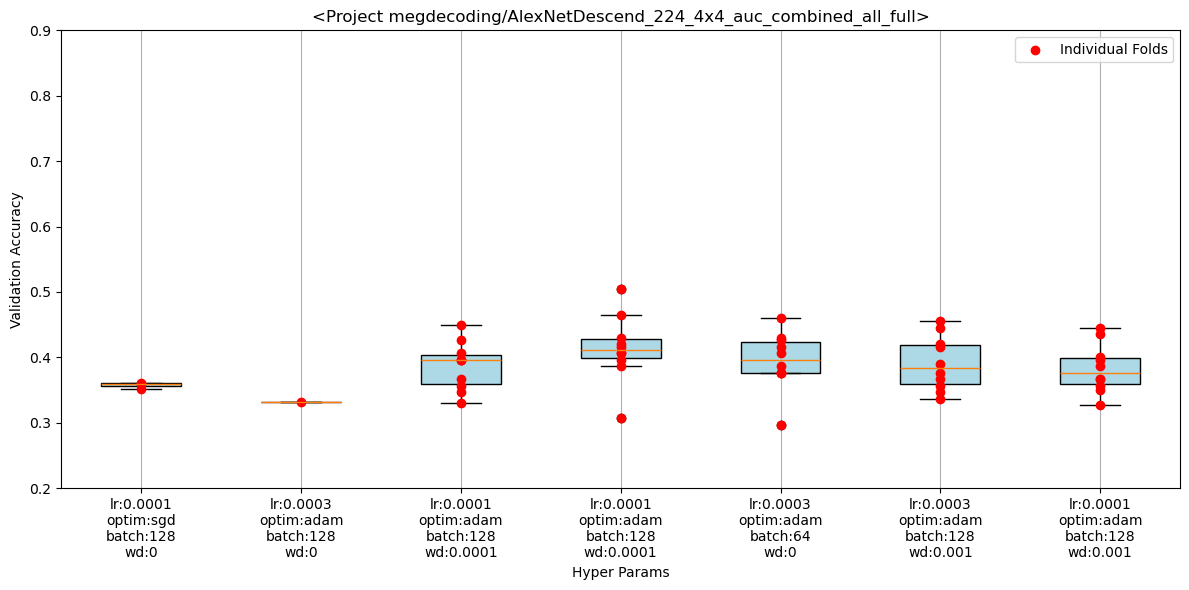

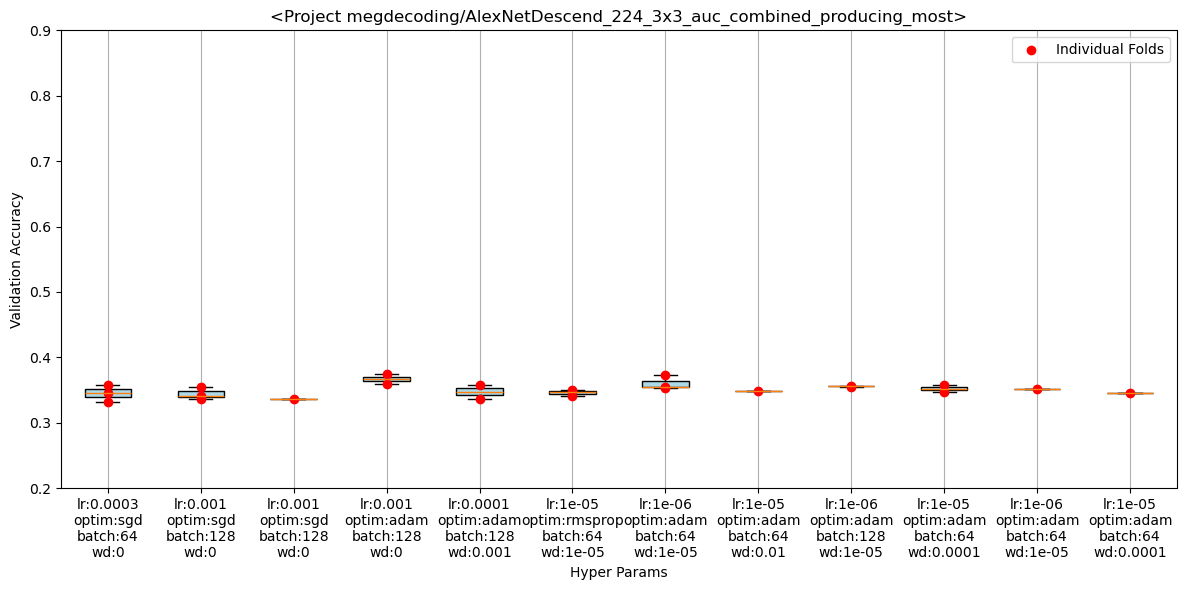

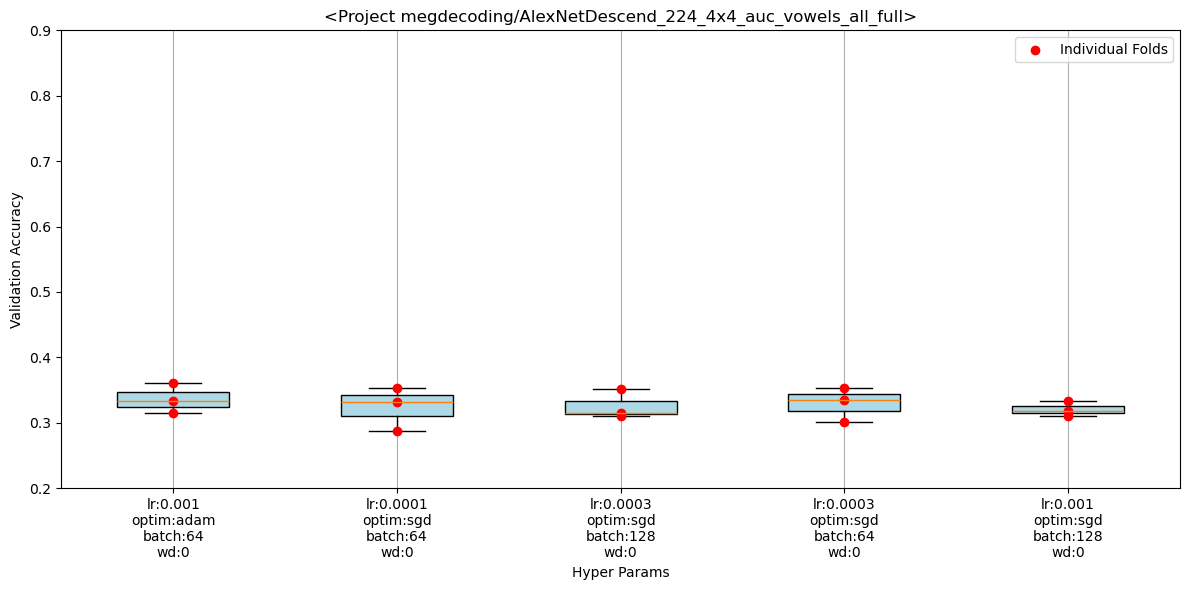

<Figure size 1200x600 with 0 Axes>

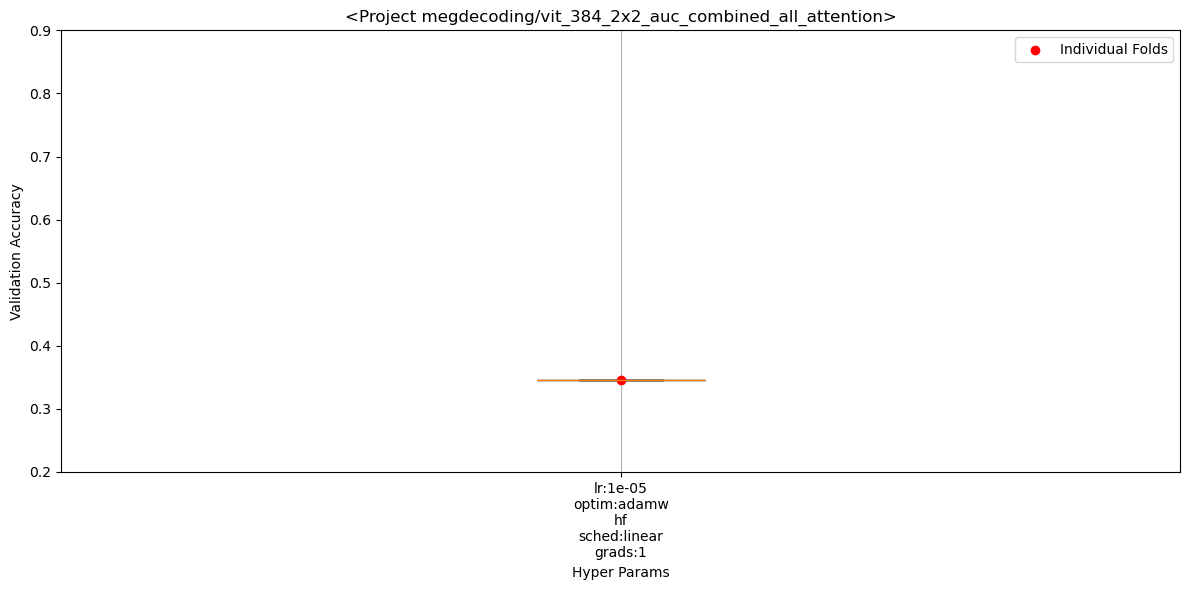

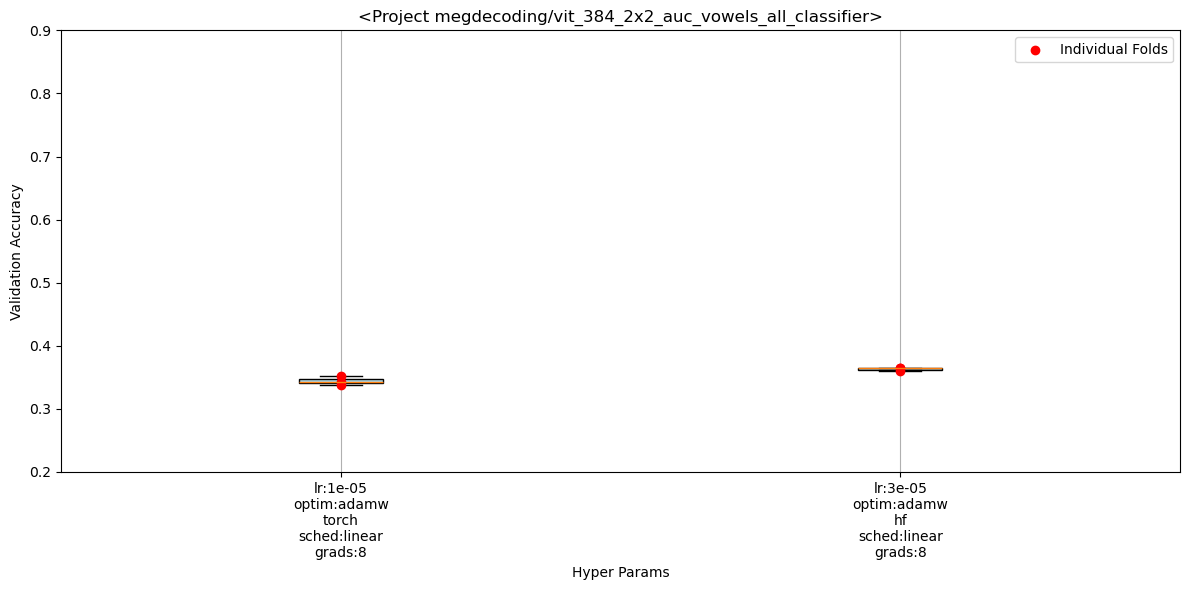

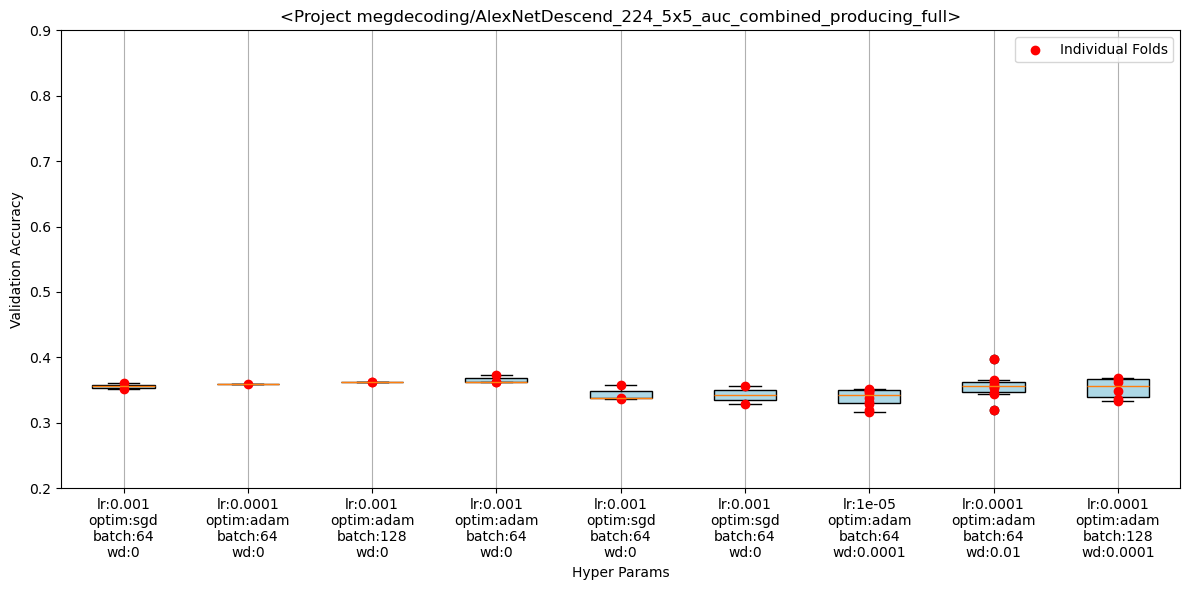

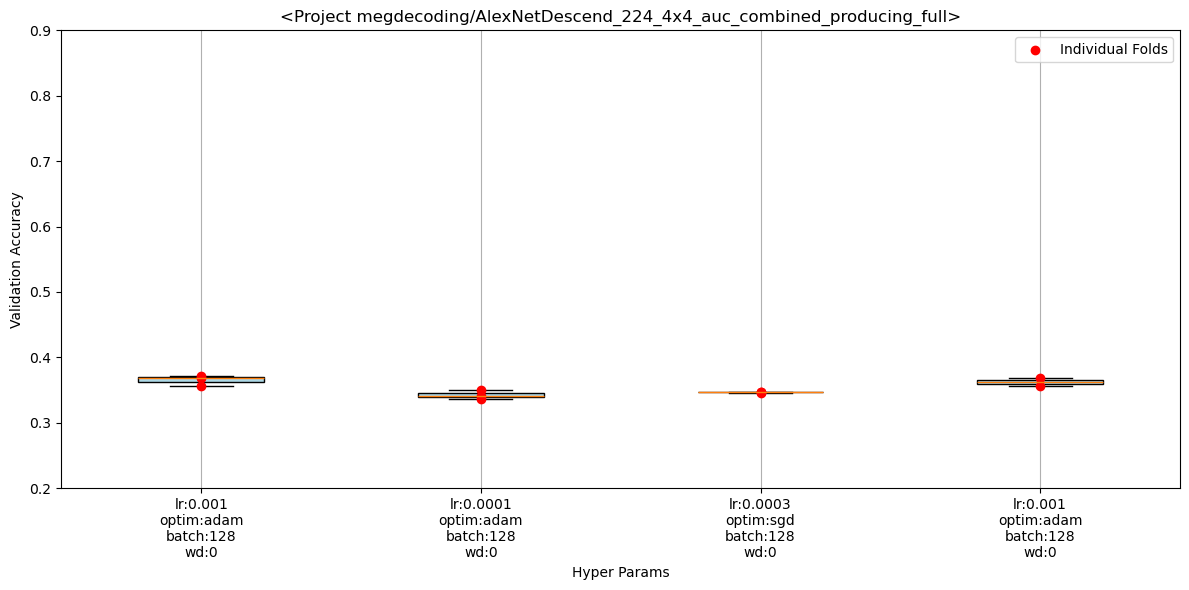

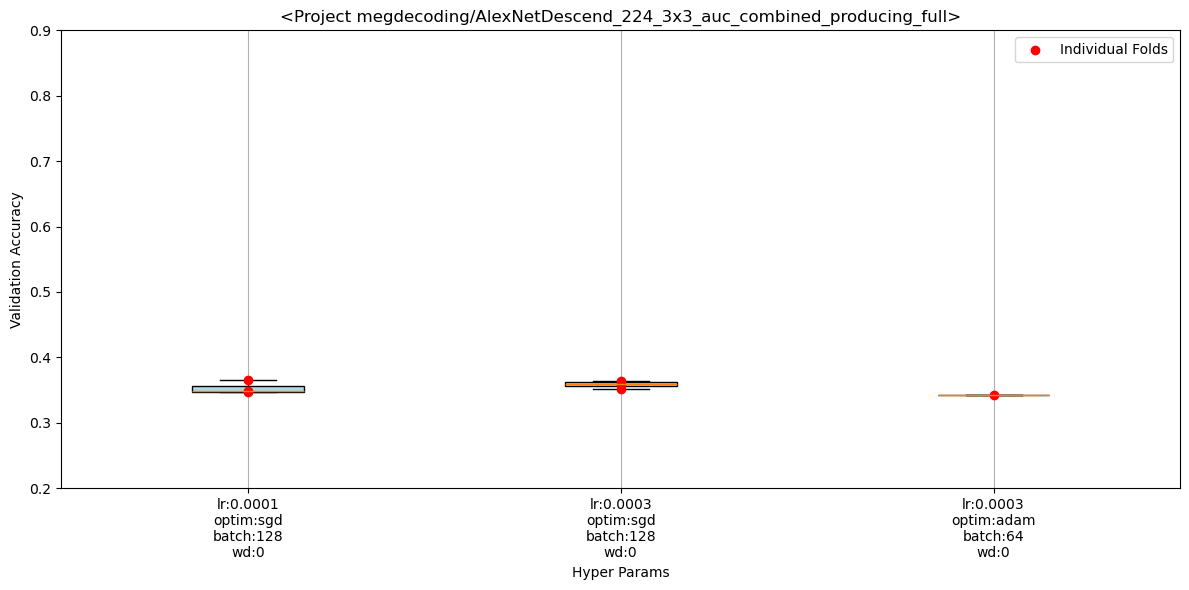

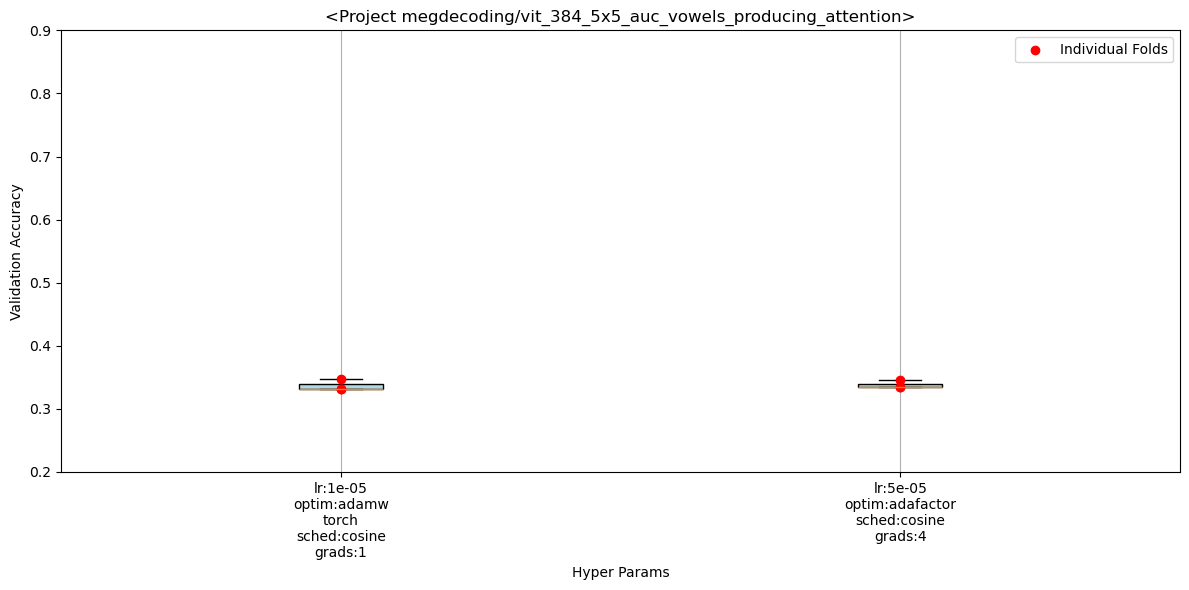

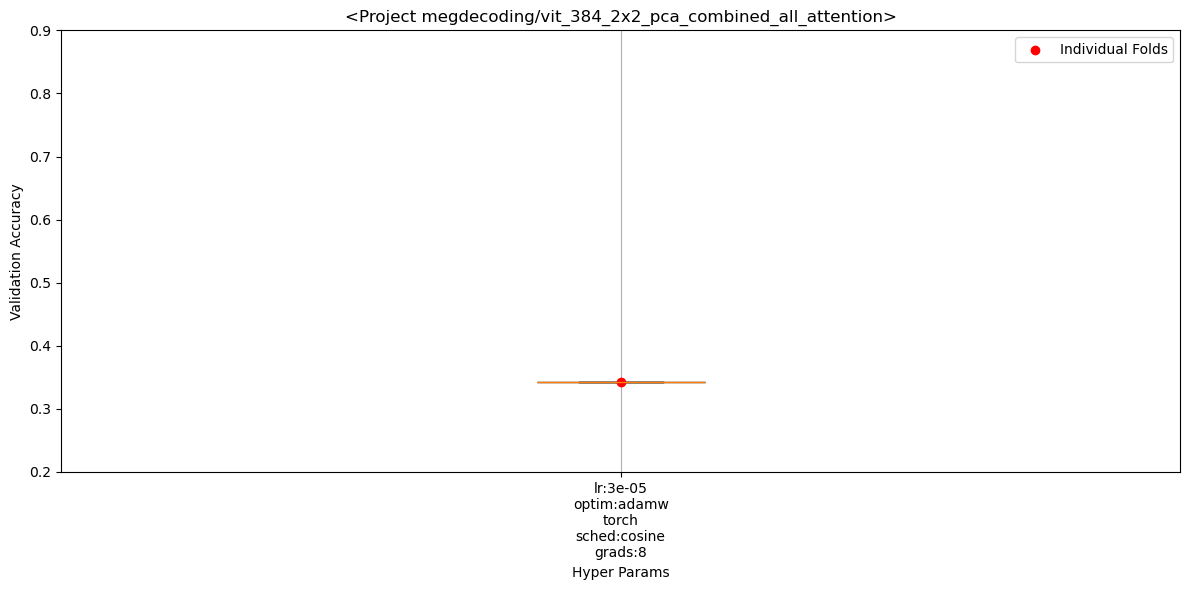

<Figure size 1200x600 with 0 Axes>

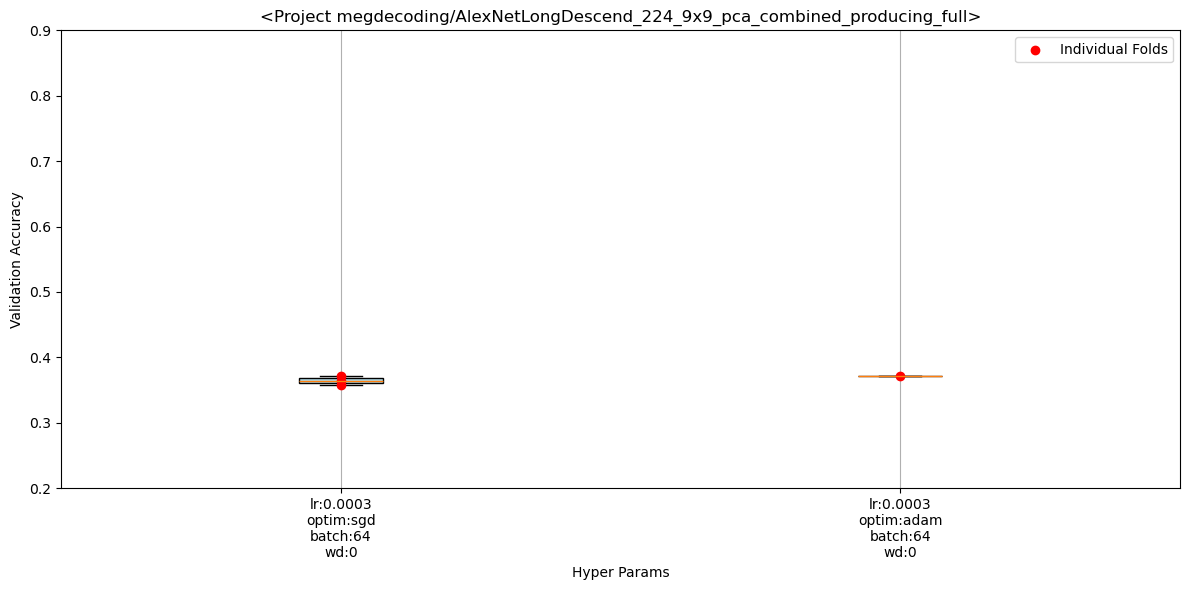

<Figure size 1200x600 with 0 Axes>

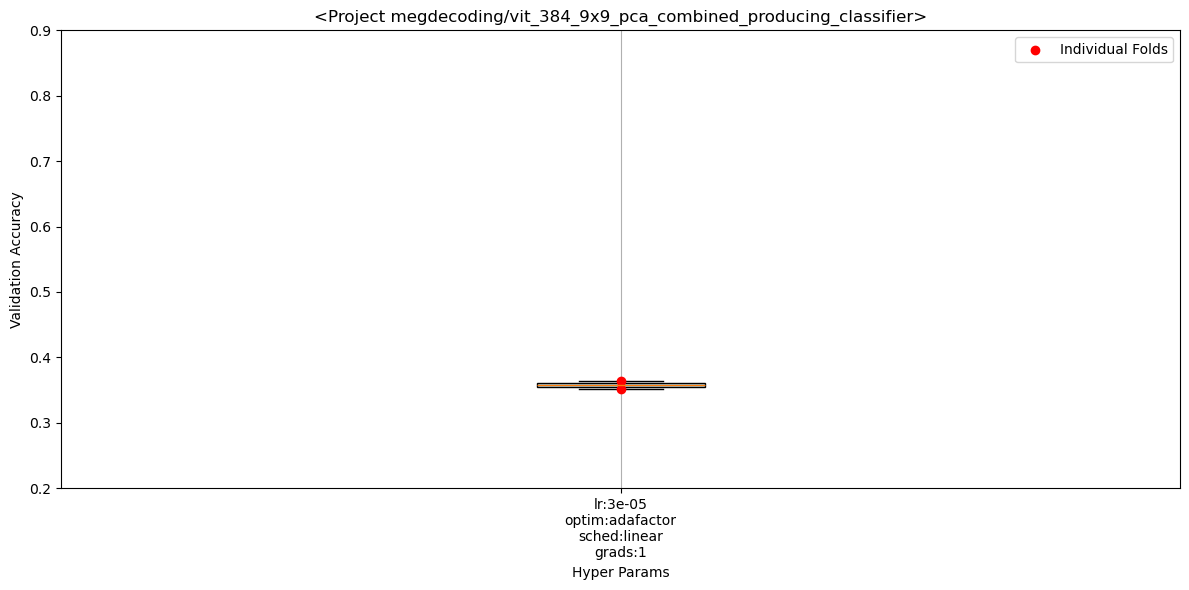

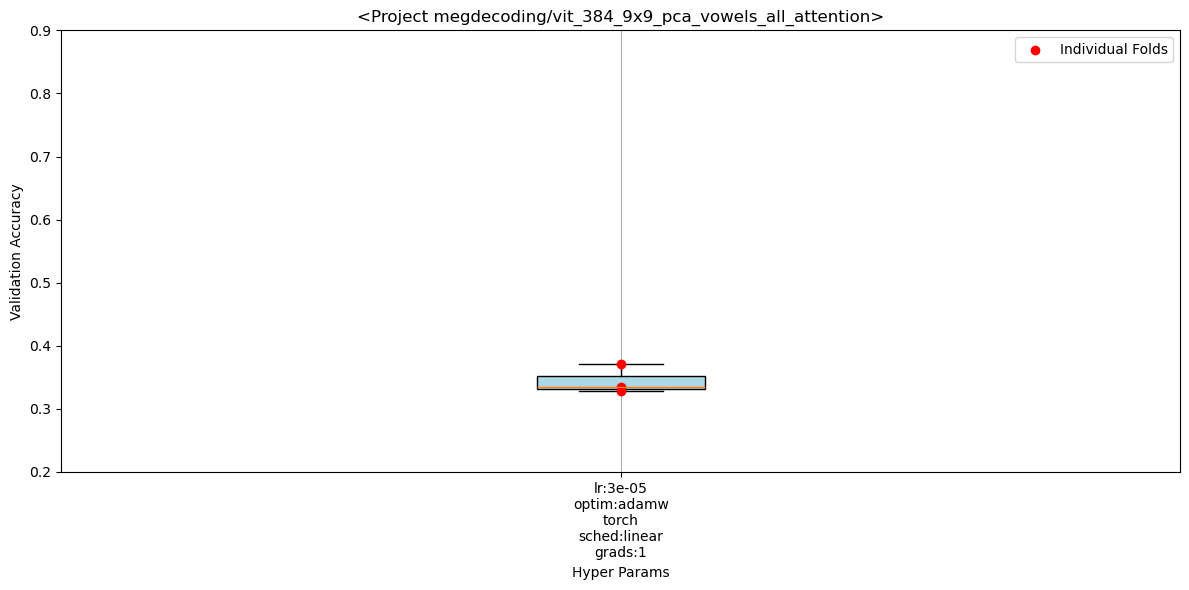

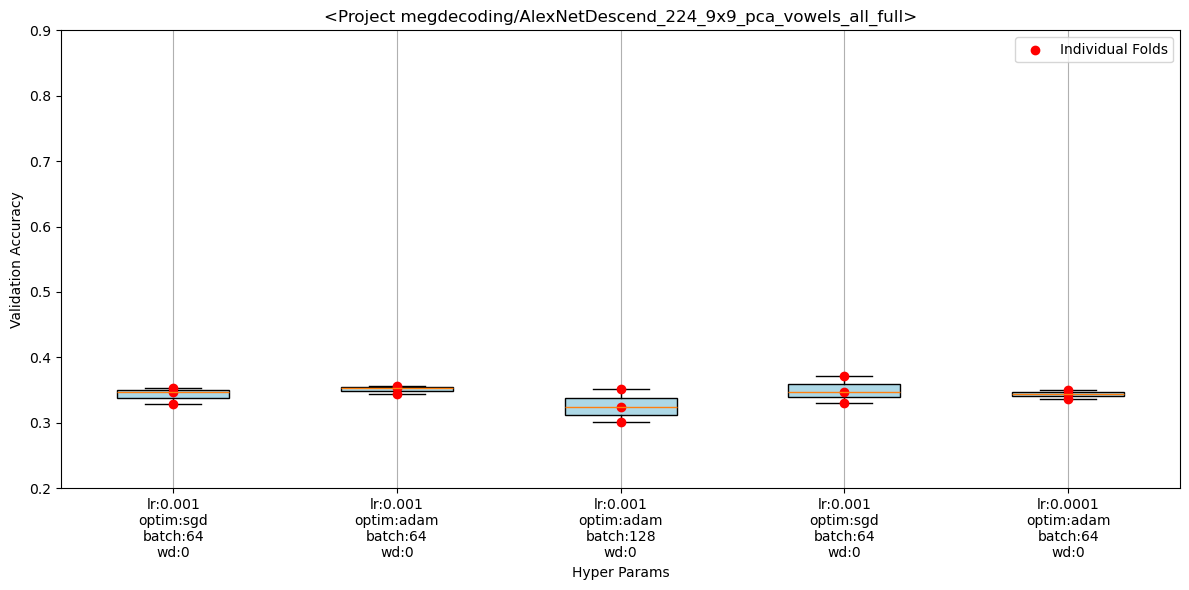

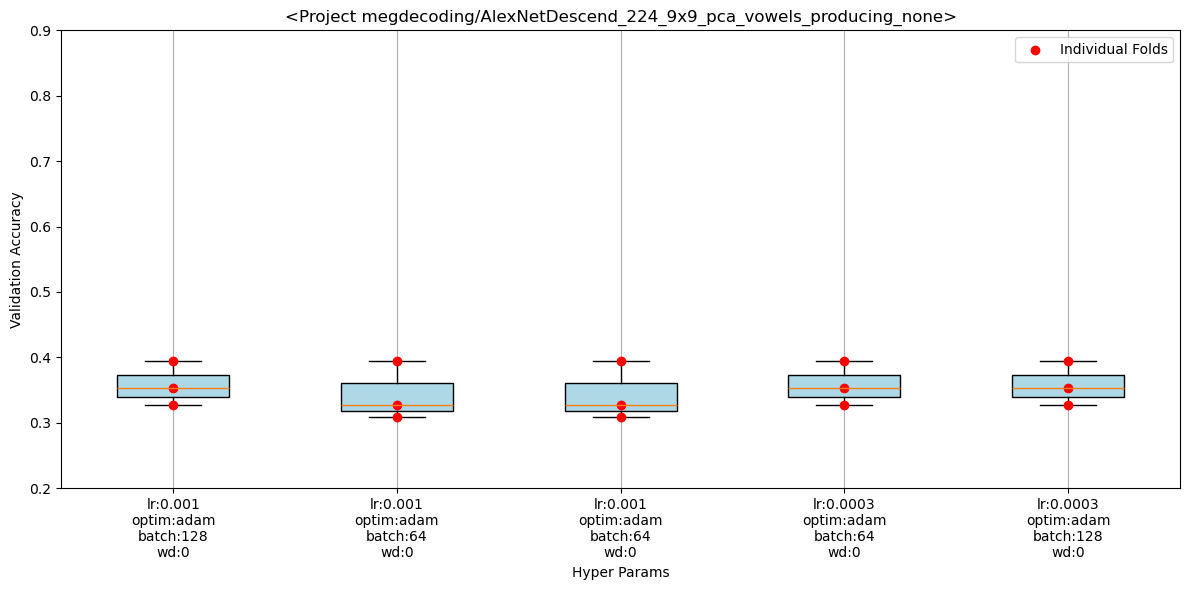

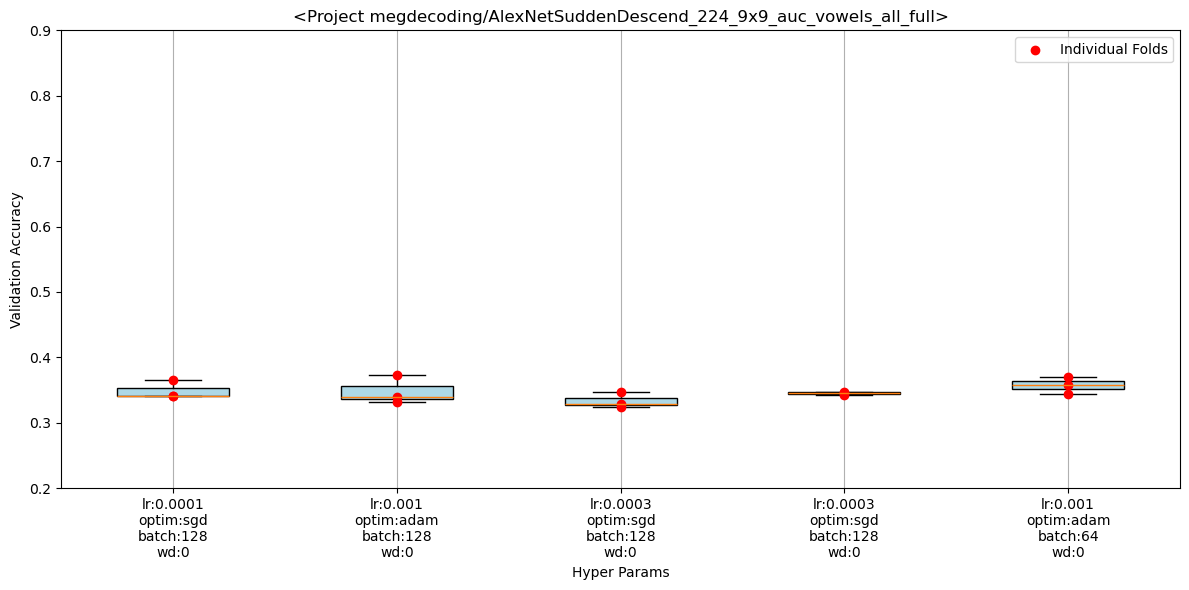

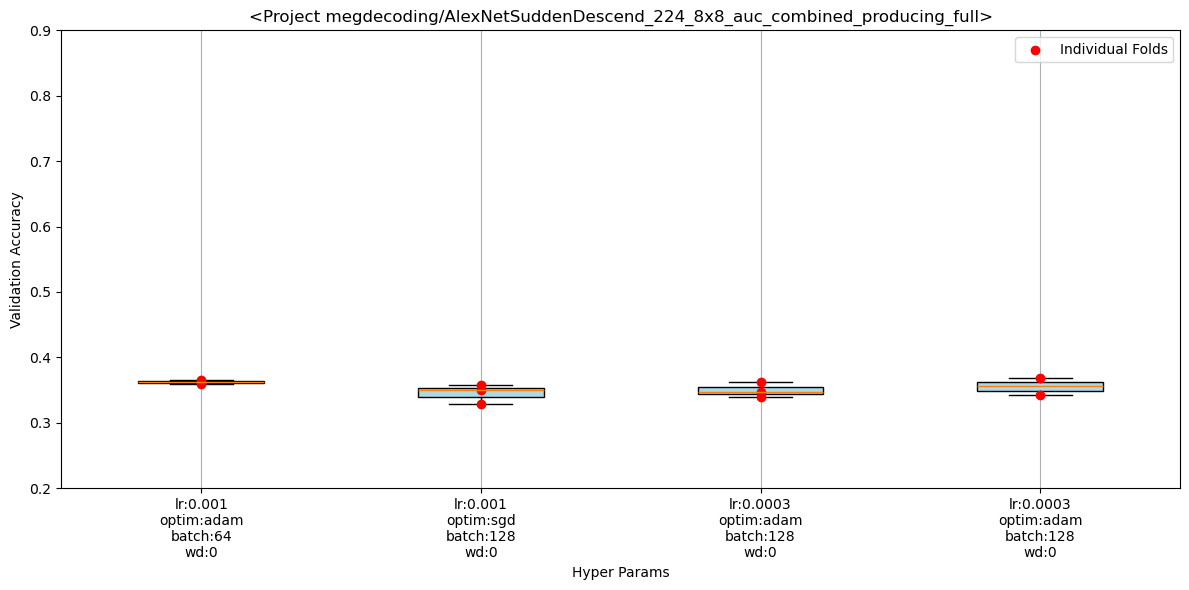

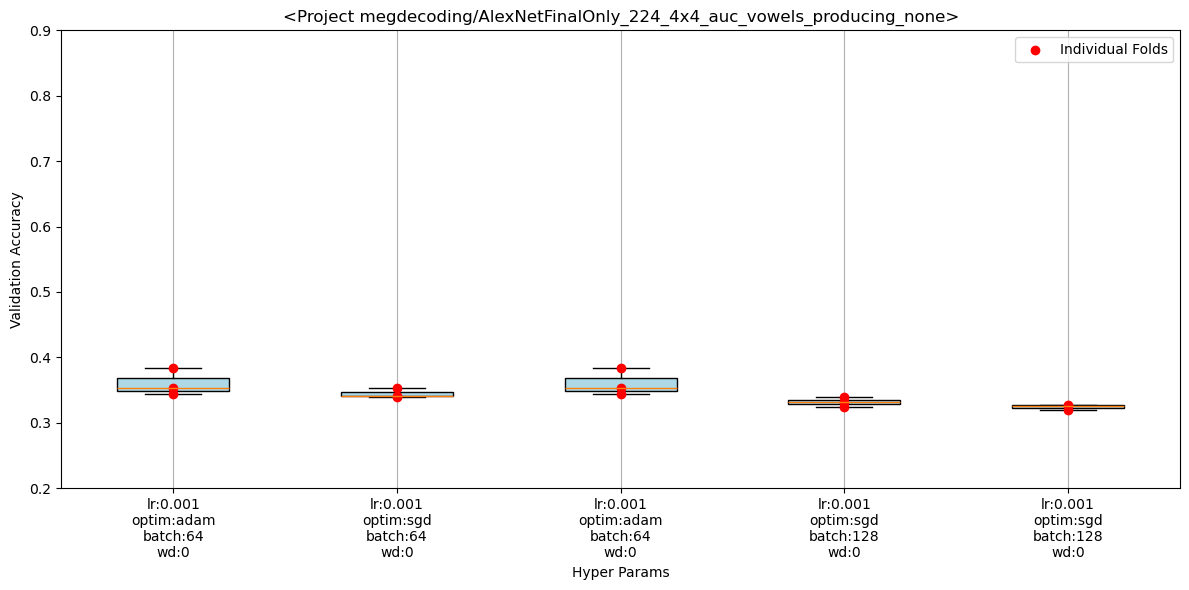

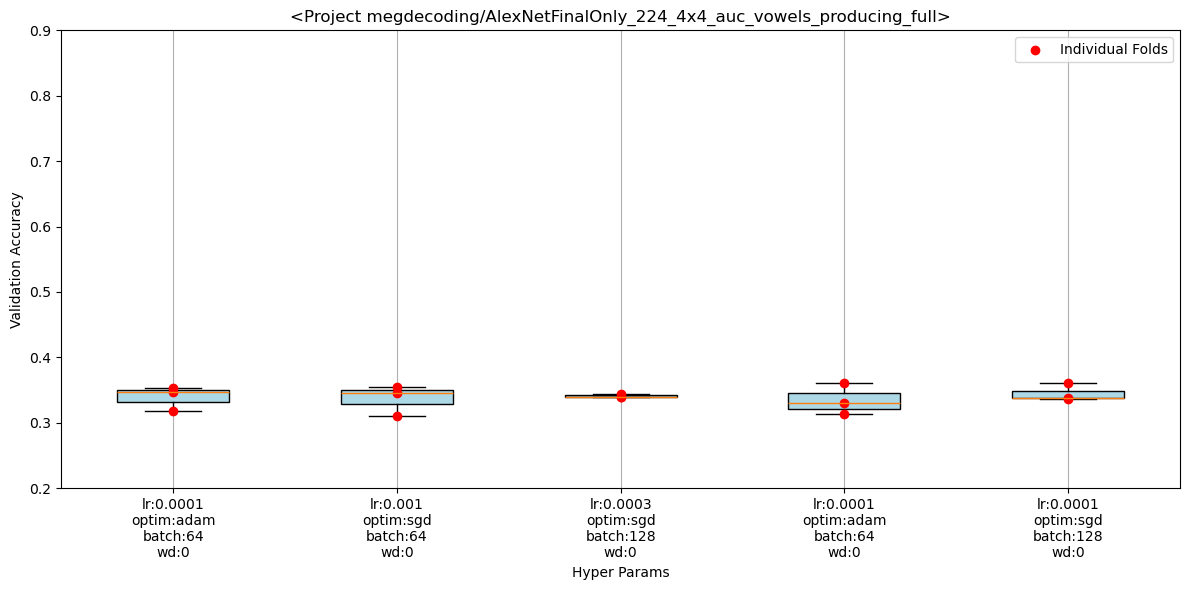

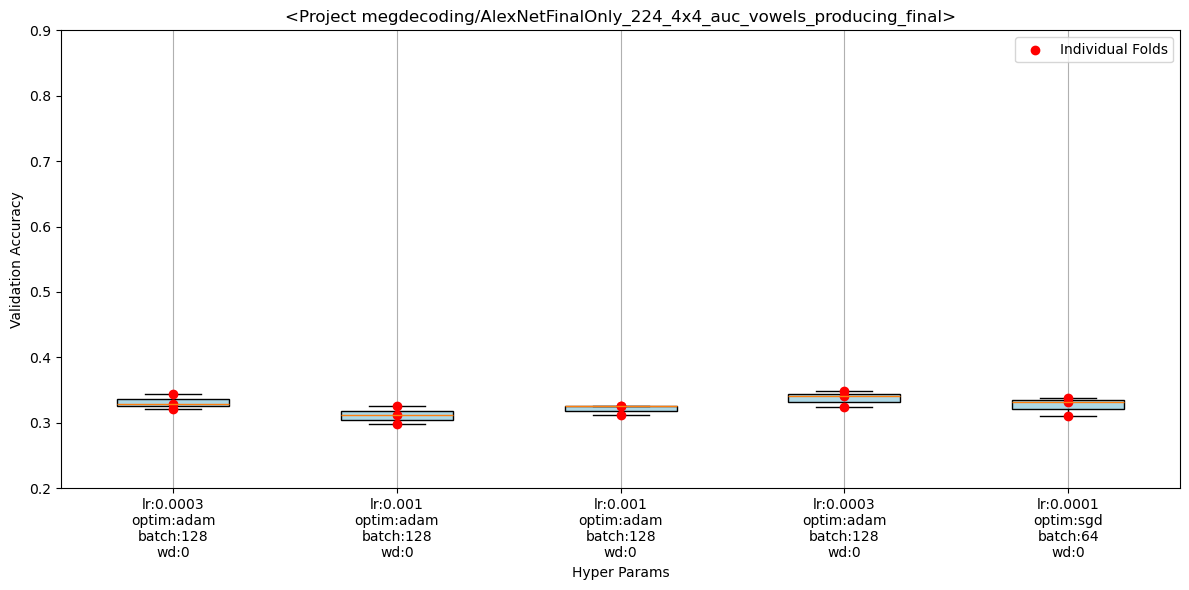

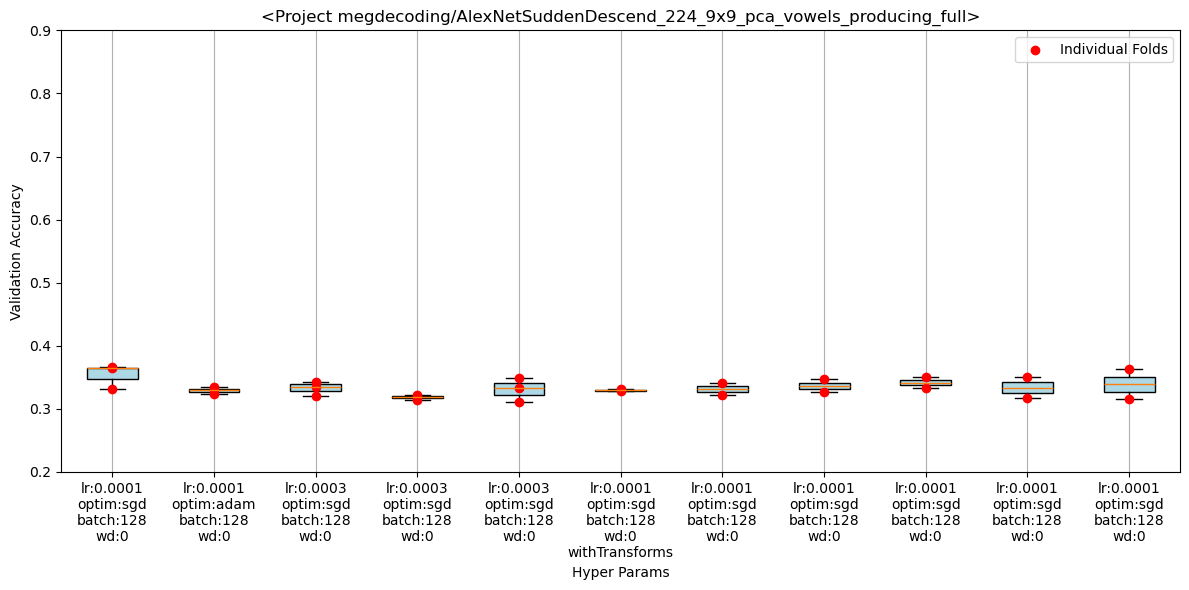

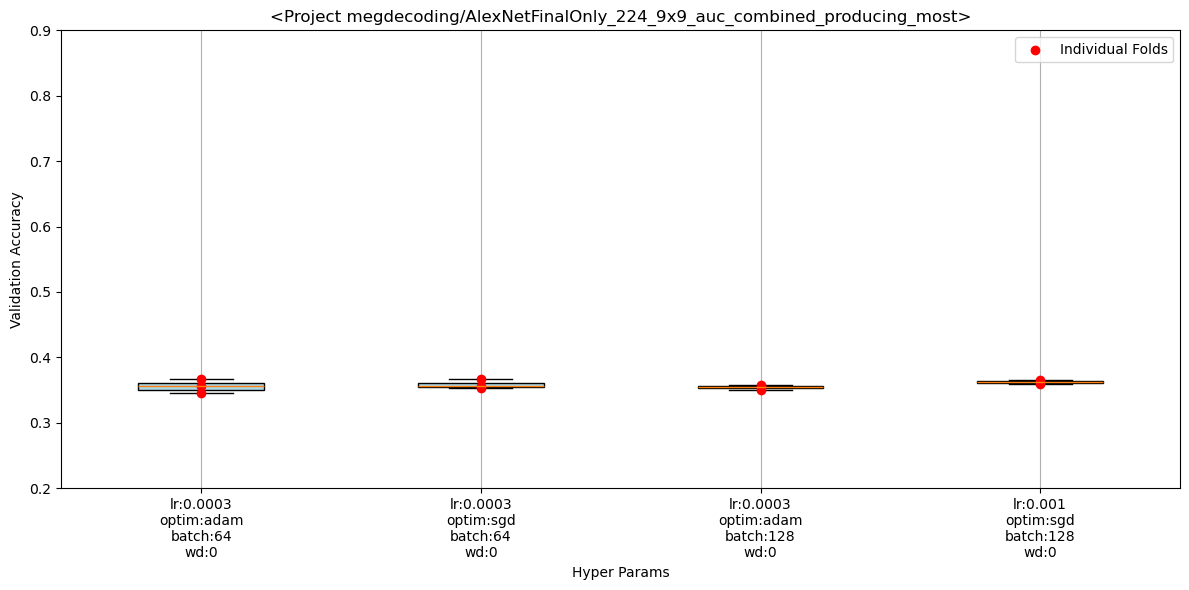

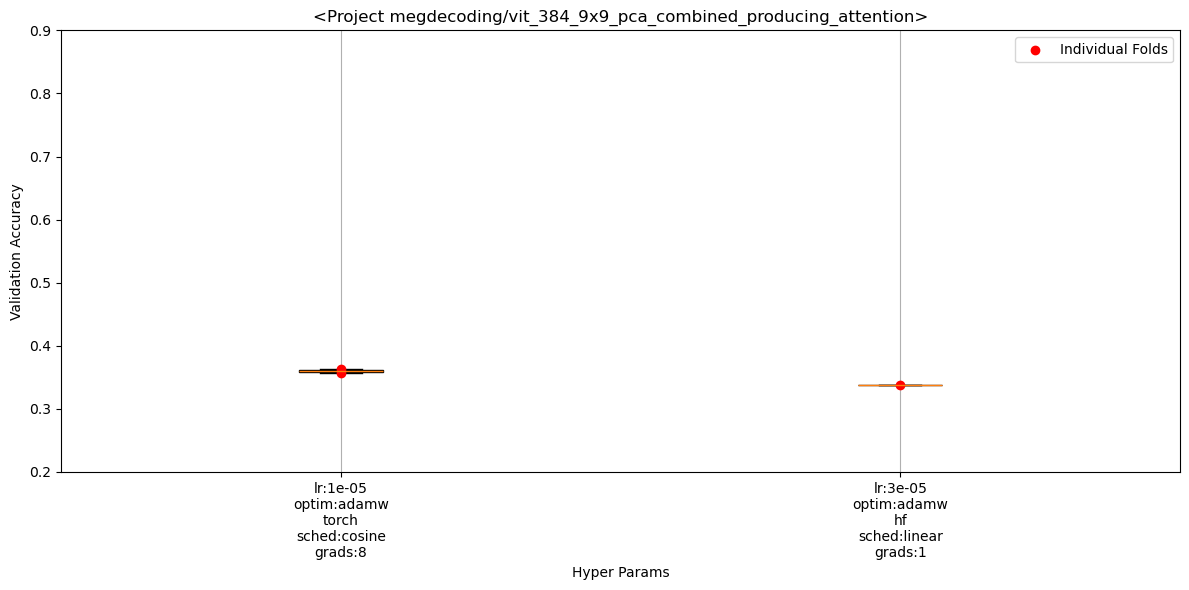

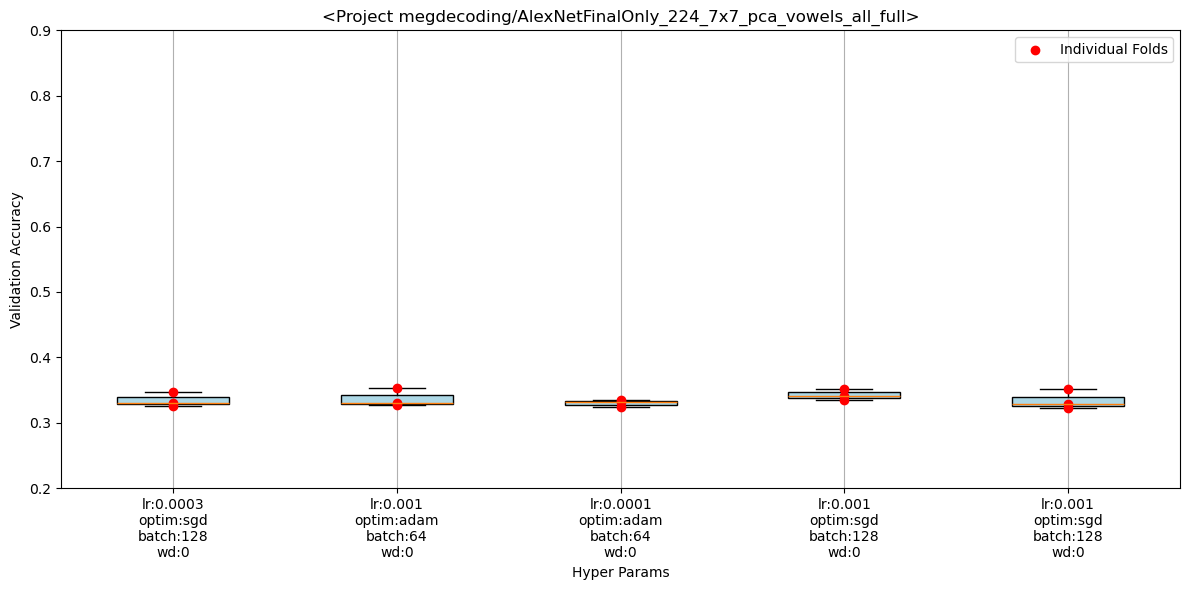

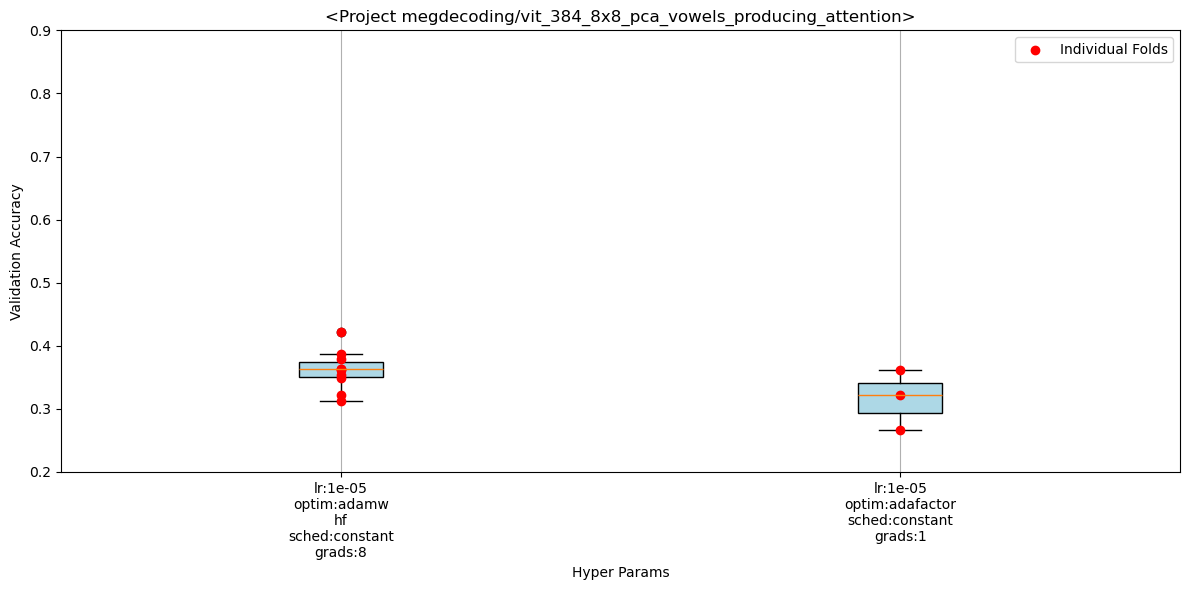

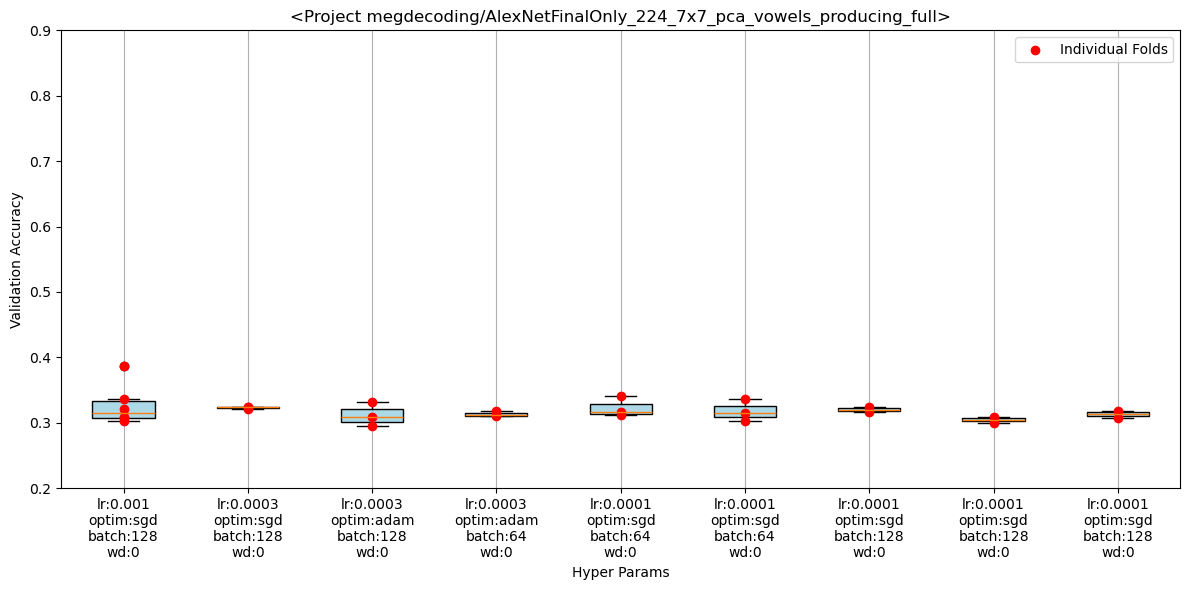

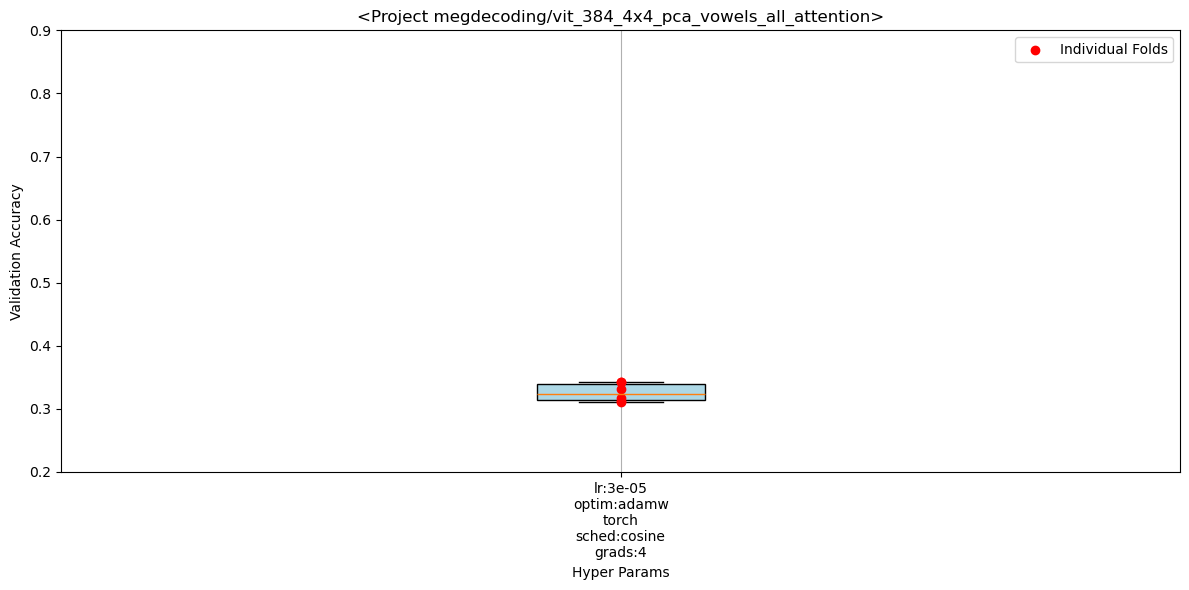

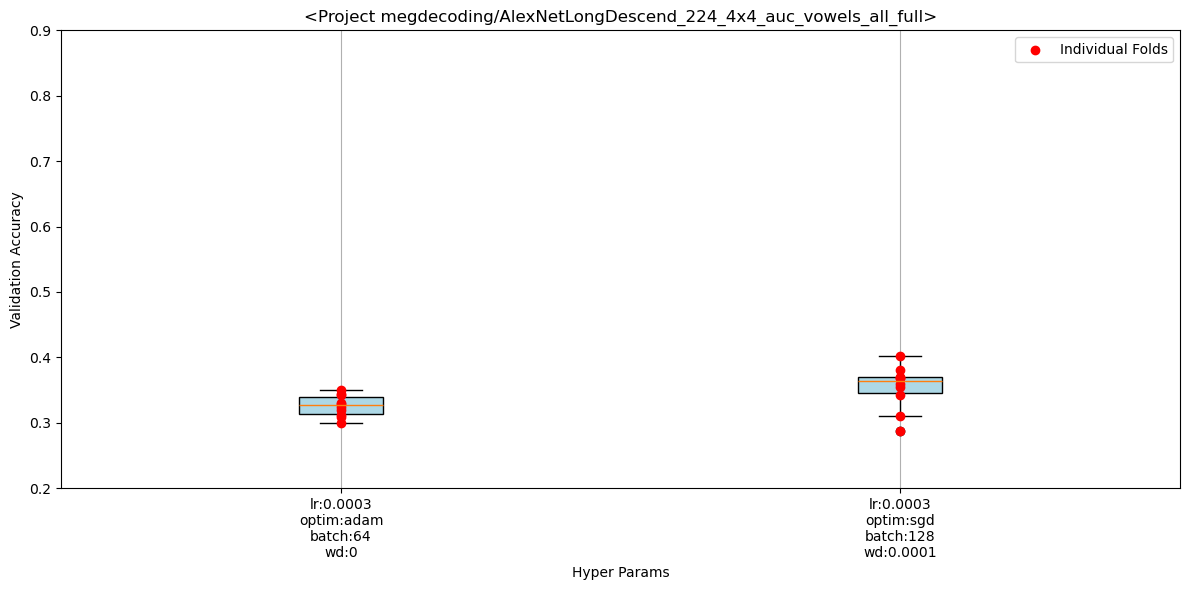

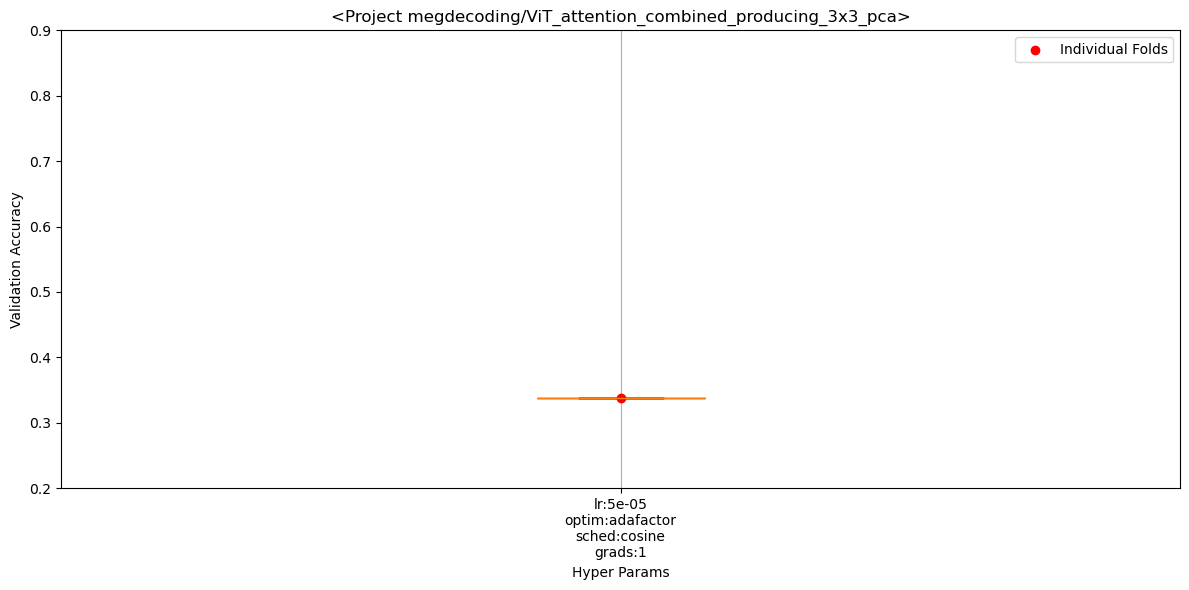

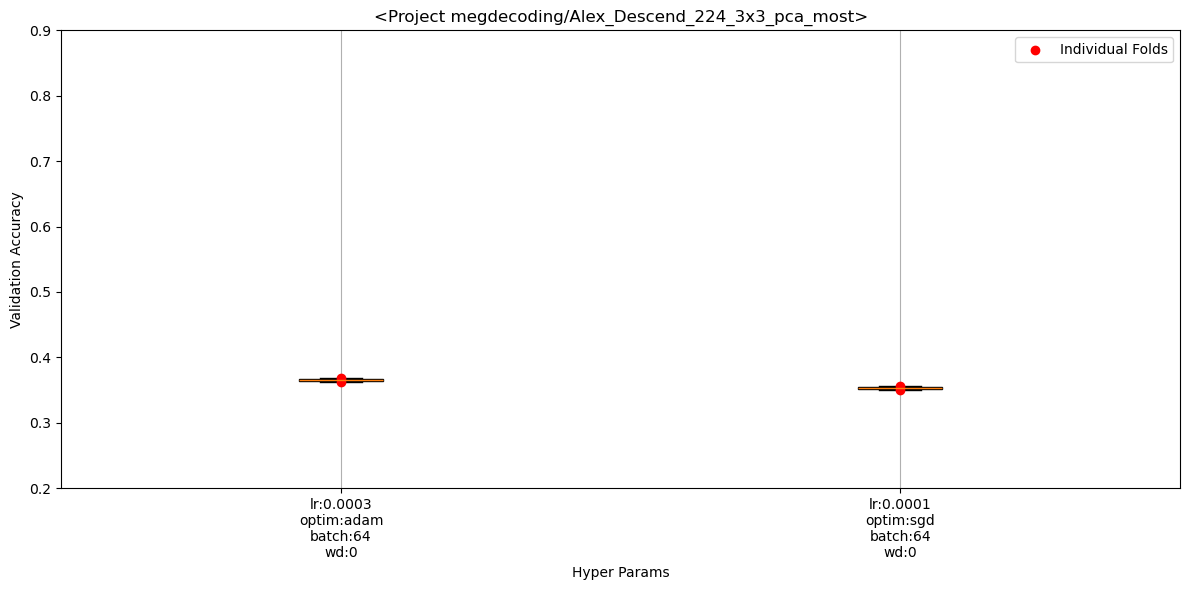

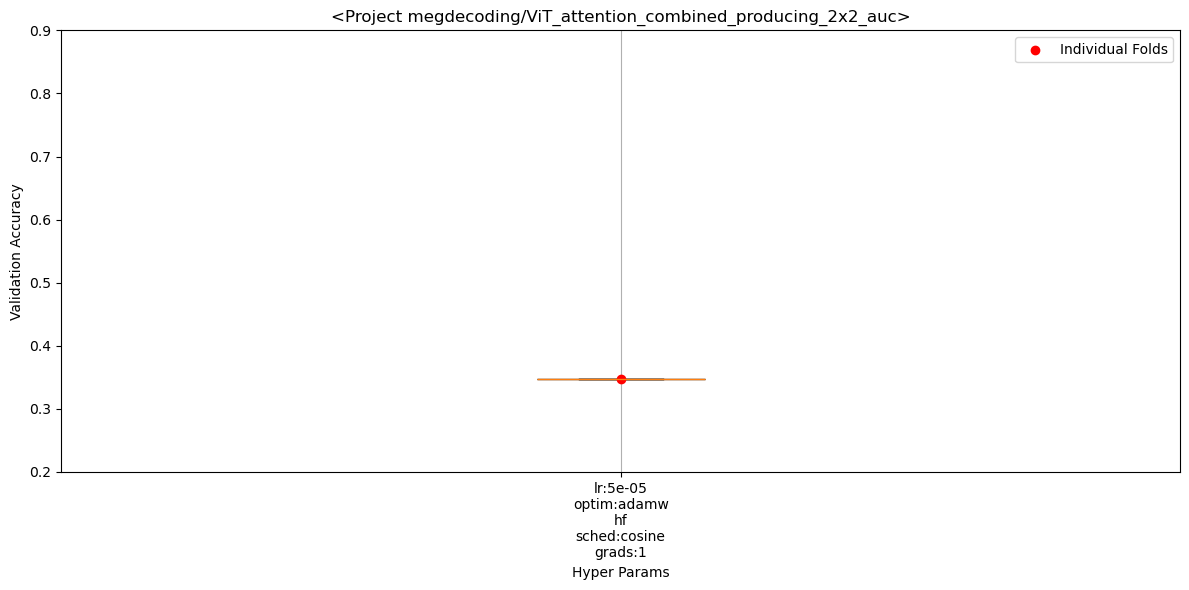

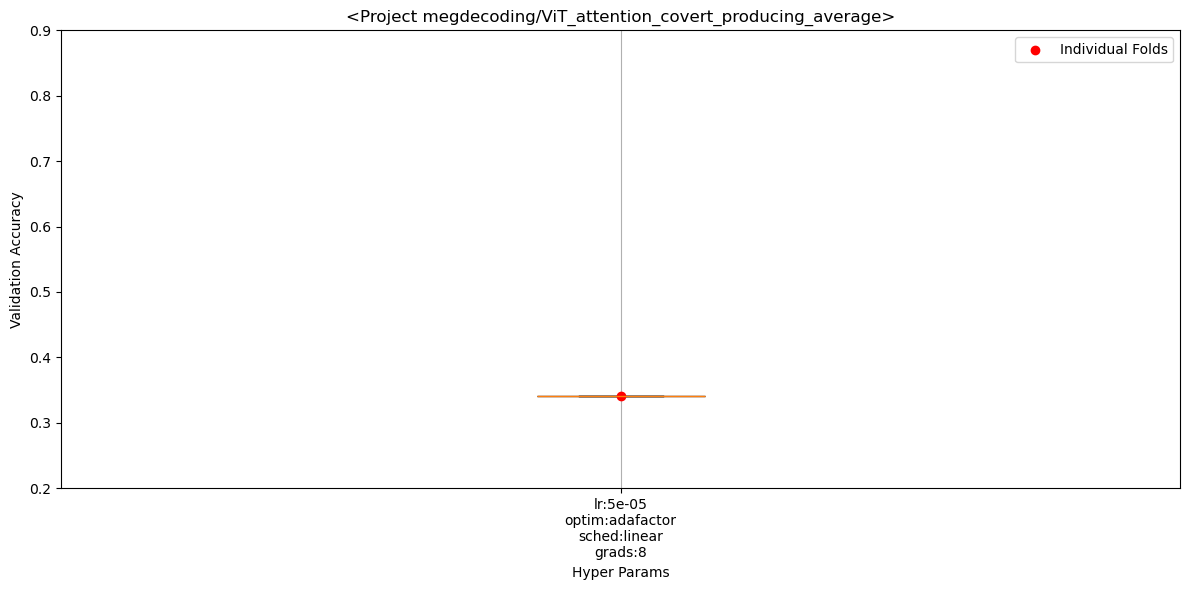

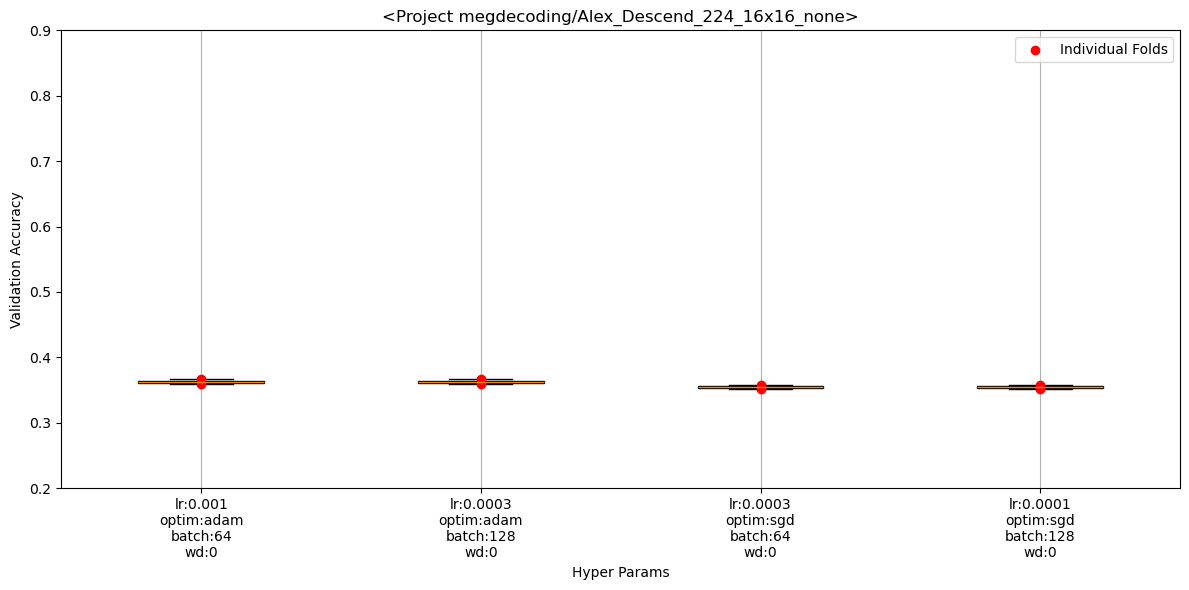

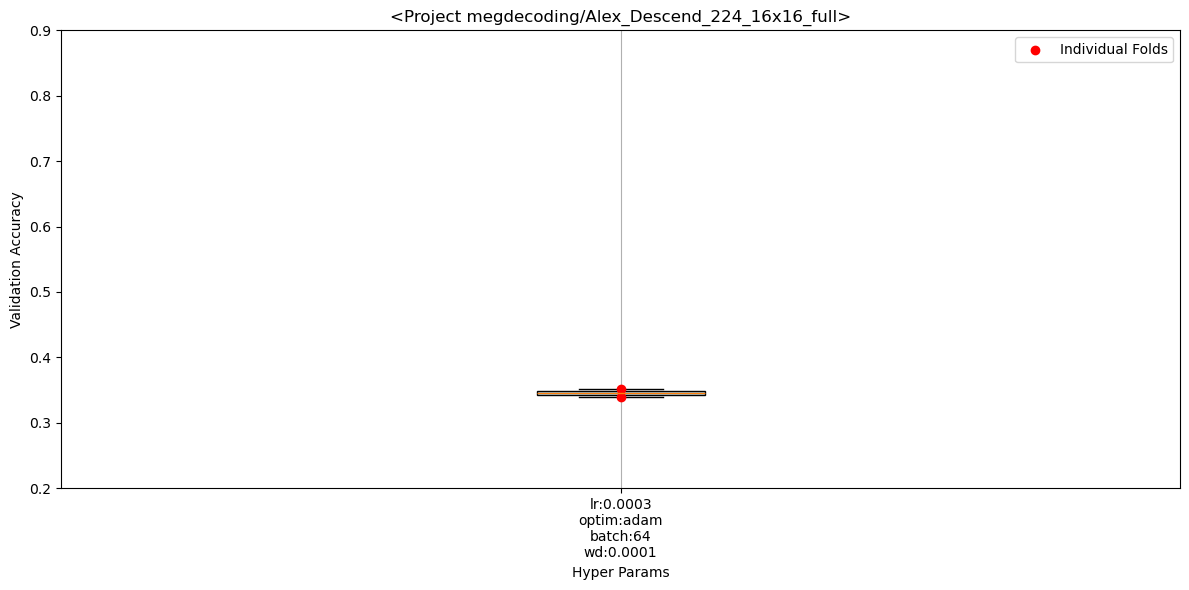

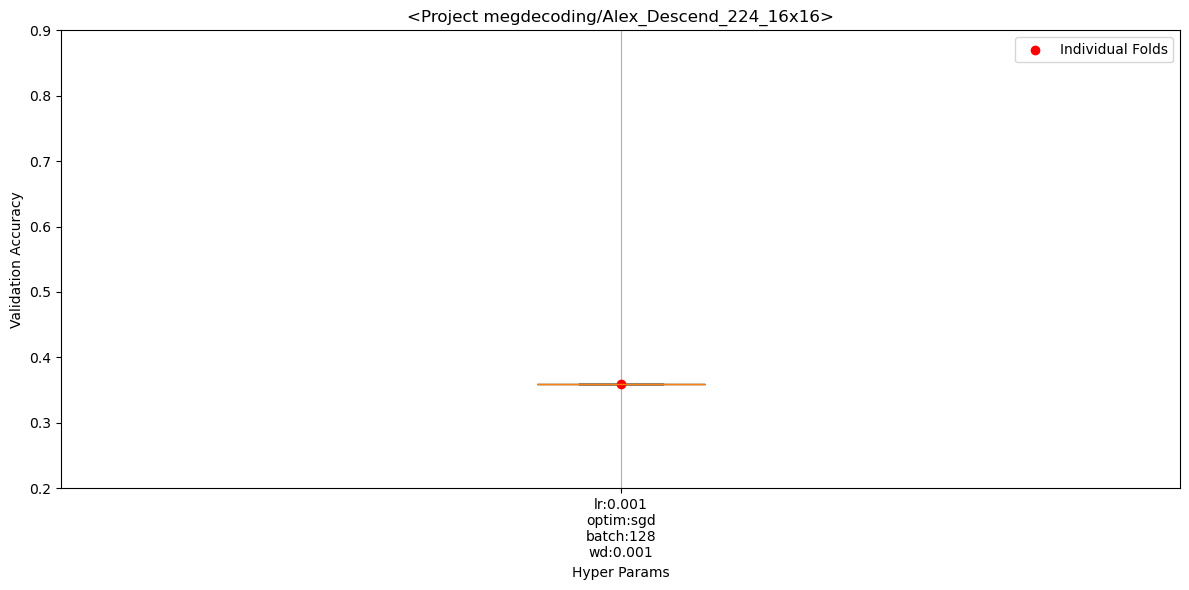

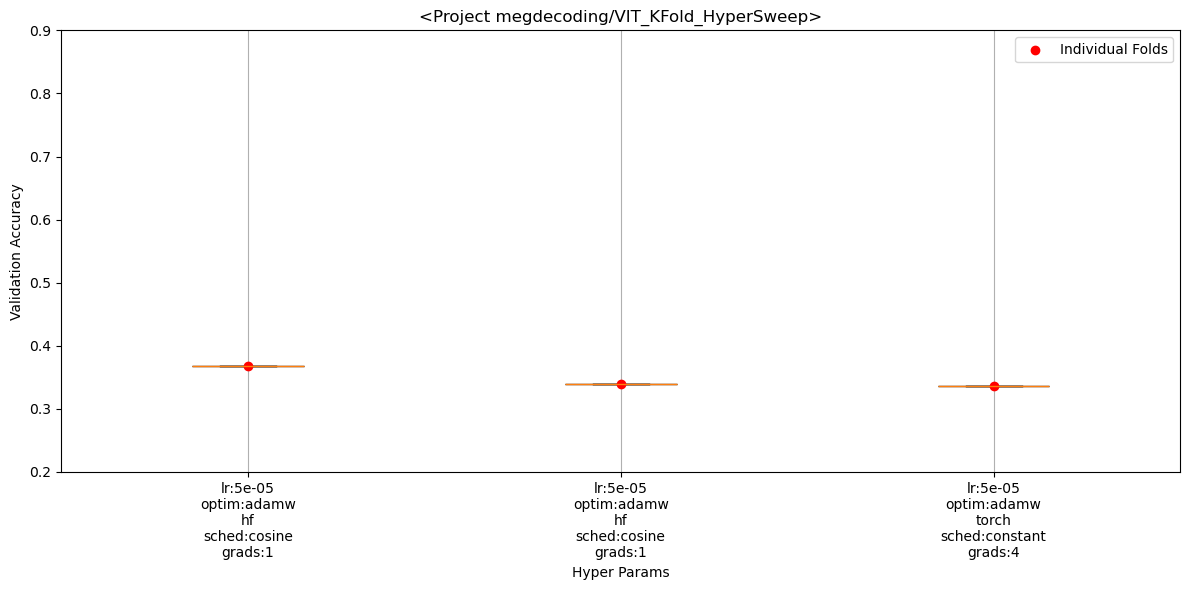

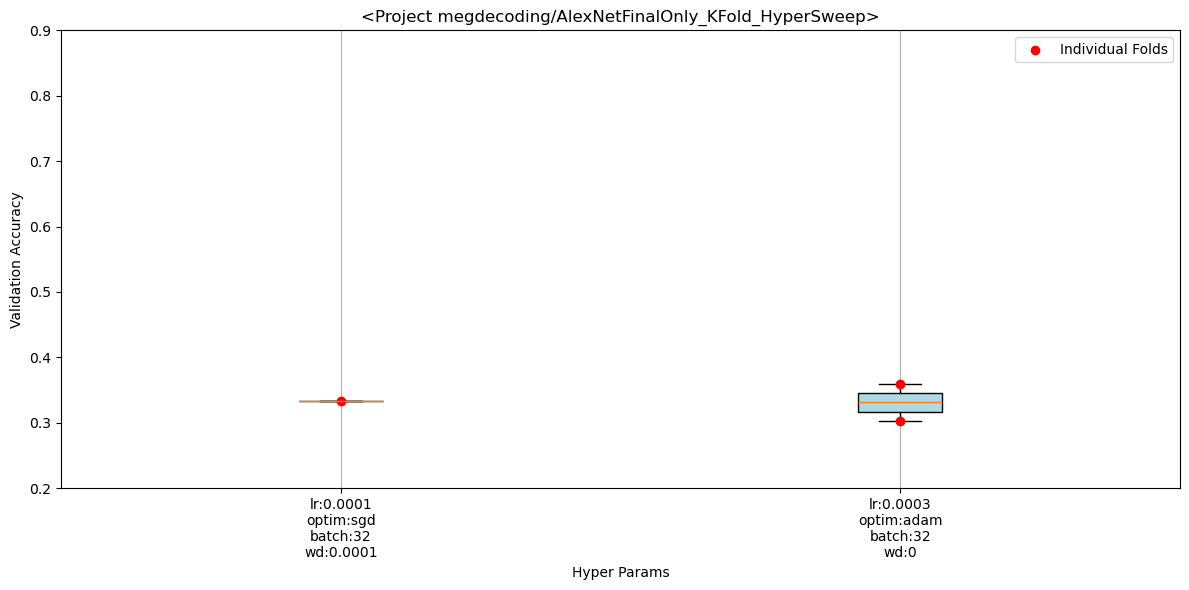

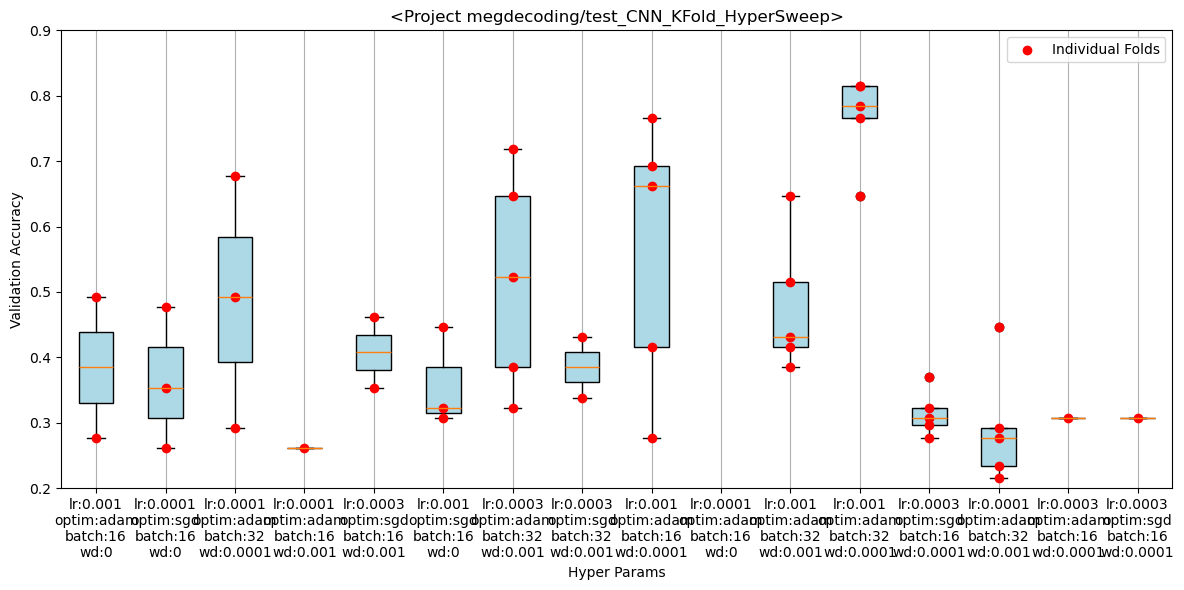

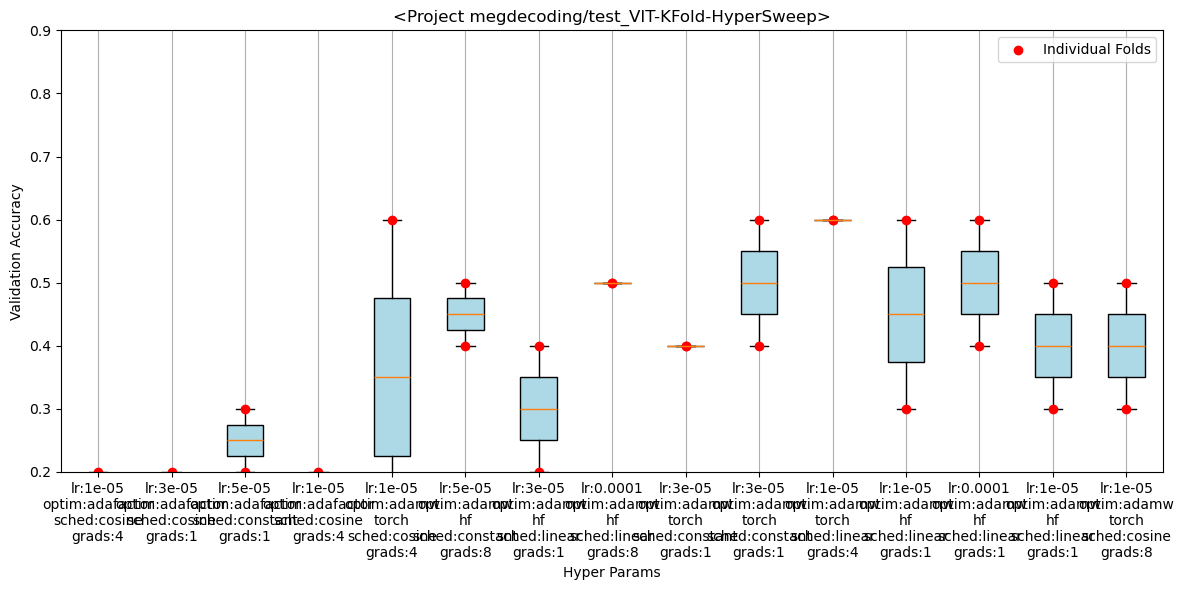

<Figure size 1200x600 with 0 Axes>

In [63]:
for project in projects:
    runs = api.runs(entity + "/" + project.name)
    summary_list, config_list, name_list = [], [], []

    for run in runs:

        summary_list.append(run.summary._json_dict)

        # parsing to get rid of special values
        config_list.append({k: v for k, v in run.config.items() if not k.startswith("_")})

        # human readable run name
        name_list.append(run.name)

    runs_df = pd.DataFrame(
        {"summary": summary_list, 
        "config": config_list,
        "name": name_list
        }
    )
    
    all_data = []
    all_labels = []

    plt.figure(figsize=(12, 6))

    for row, col in runs_df.iterrows():

        try: 
            parse = [i for i in list(col.iloc[0].keys()) if ("fold" in i and "val" in i and "acc" in i)]
            parse = [i for i in parse if "train" not in i]
            parse = [i for i in parse if i != "accuracy"]

            if not parse:
                print(f"Skippin {row} - no valid accuracy keys found")
                continue
            
            results = [col.iloc[0][label] for label in parse]

            if not results or any(r is None for r in results):
                print(f"skipping {row} - empty or None")
                continue
            all_data.append(results)

            # format the hyperparams so that they don't overlap
            labels = col.iloc[2]
            labels = labels.split("_") 
            formatted_label = "\n".join(labels[1:]) # drop CNN

            all_labels.append(formatted_label)

        except Exception as e:
            print(f"skipping {row} due to error {e}")

    if all_data:
        plt.boxplot(all_data, vert=True, patch_artist=True,
                    labels=all_labels,
                    boxprops=dict(facecolor='lightblue'))
        for i, y_vals in enumerate(all_data):
            plt.scatter([i + 1] * len(y_vals), y_vals, color='red', label='Individual Folds' if i == 0 else "", zorder=2) # individual points

        file_path = os.path.join(save_dir, project.name)
        plt.xlabel("Hyper Params")
        plt.ylabel("Validation Accuracy")
        plt.title(f'{project}')
        plt.legend()
        plt.grid(True, axis='x')
        plt.ylim(0.2, 0.9)
        plt.tight_layout()
        plt.savefig(file_path, bbox_inches='tight')
    else:
        print("No valid data to plot")


        

In [4]:
## megdecoding-clean
api = wandb.Api()
projects = api.projects(entity="meg-decoding-clean")
save_dir = os.path.join(os.getcwd(), '/Users/ciprianbangu/Cogmaster/M2 Internship/BCI code/hyperparam-results')
entity="meg-decoding-clean"

In [5]:
for project in projects:
    runs = api.runs(entity + "/" + project.name)
    print(project.name)

ResNet101SmallHead_covert_prod_spt
ResNet101SmallHead_covert_prod_broca
ResNet101SmallHead_covert_prod_combo
ResNet101SmallHead_covert_prod_sma
ResNet101SmallHead_covert_read-prod-prod_16x16
ResNet101SmallHead_covert_read-prod_16x16
ResNet101SmallHead_covert_read_16x16
ResNet101SmallHead_covert_prod-read-read_16x16
ResNet101SmallHead_covert_prod_16x16
AlexNetSmallHead_covert_read-prod-prod_stg
AlexNetSmallHead_covert_read-prod-prod_spt
AlexNetSmallHead_covert_read-prod-prod_sma
AlexNetSmallHead_covert_read-prod-prod_combo
AlexNetSmallHead_covert_read-prod-prod_broca
AlexNetSmallHead_covert_read-prod_stg
AlexNetSmallHead_covert_read-prod_spt
AlexNetSmallHead_covert_read-prod_sma
AlexNetSmallHead_covert_read-prod_combo
AlexNetSmallHead_covert_read-prod_broca
AlexNetSmallHead_covert_read_stg
AlexNetSmallHead_covert_read_spt
AlexNetSmallHead_covert_read_sma
AlexNetSmallHead_covert_read_combo
AlexNetSmallHead_covert_read_broca
AlexNetSmallHead_covert_prod-read-read_stg
AlexNetSmallHead_cove